In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Descriptive Statistics

In [7]:
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [8]:
data.describe(include='object').T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

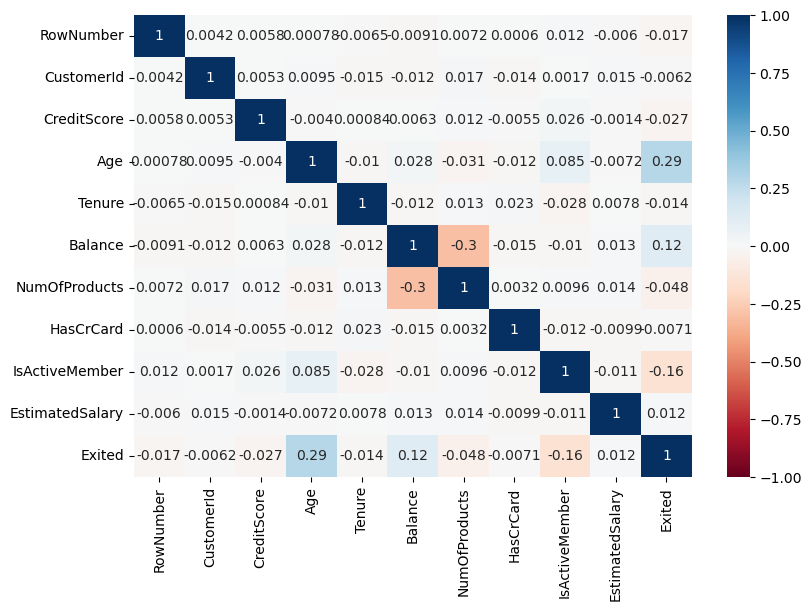

In [9]:
# Explore the correlation among numerical columns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(numeric_only = True),vmin=-1,annot=True,cmap='RdBu')
plt.show()

## Univariate Analysis

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
num_cols = ['CreditScore','Age', 'Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited','Tenure']

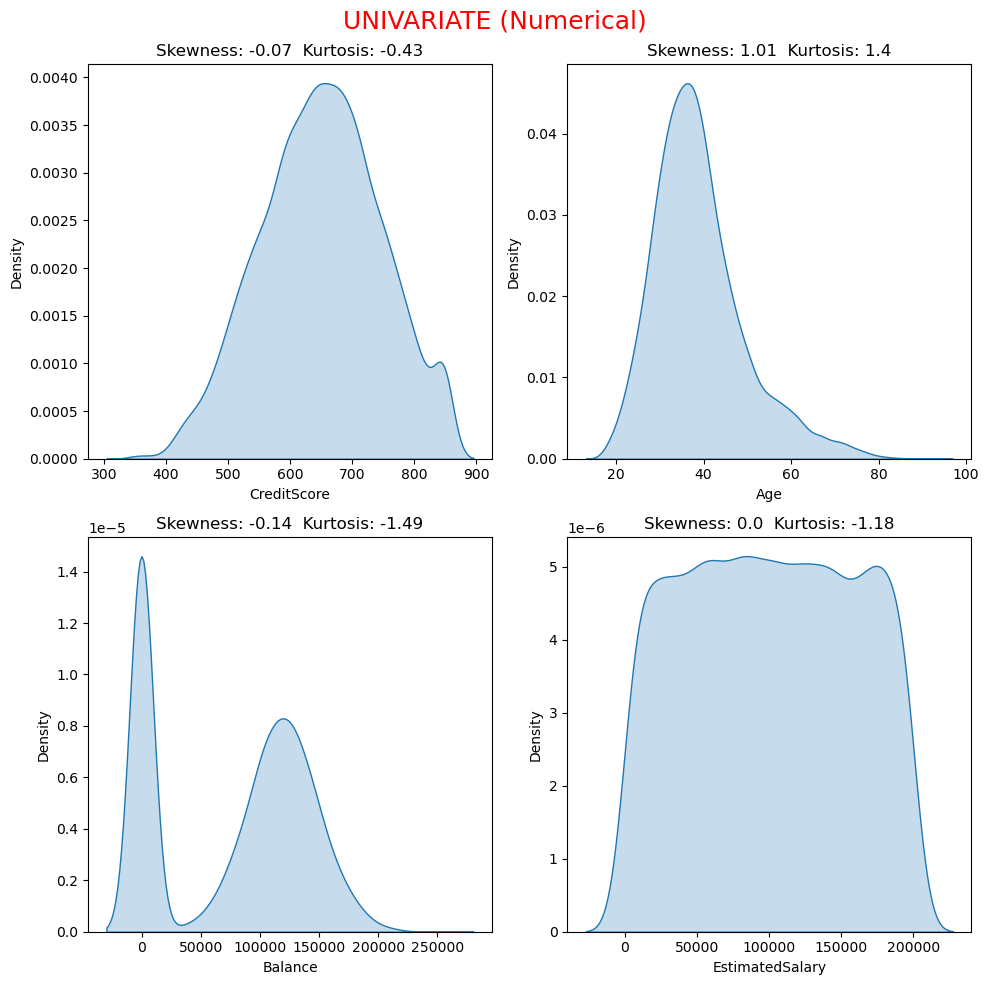

In [13]:
# Num Columns

# Explore the numrical columns

t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

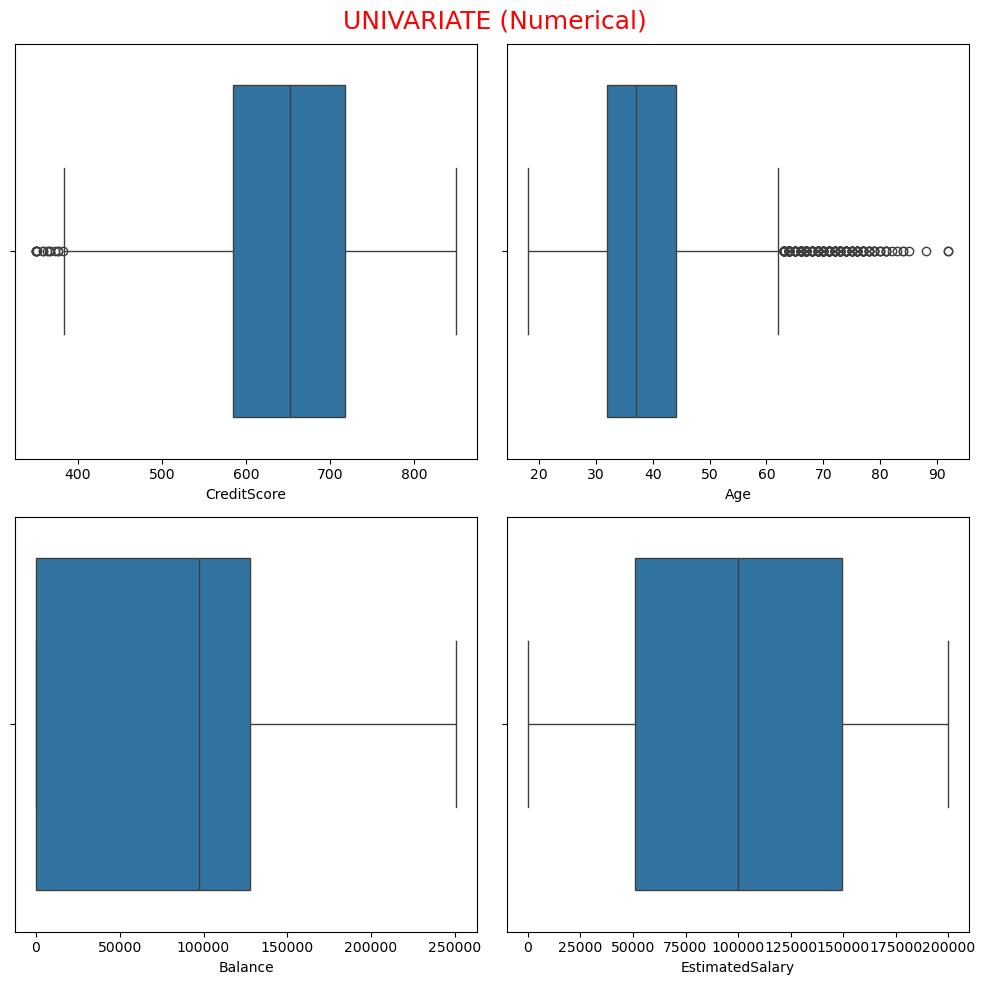

In [14]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

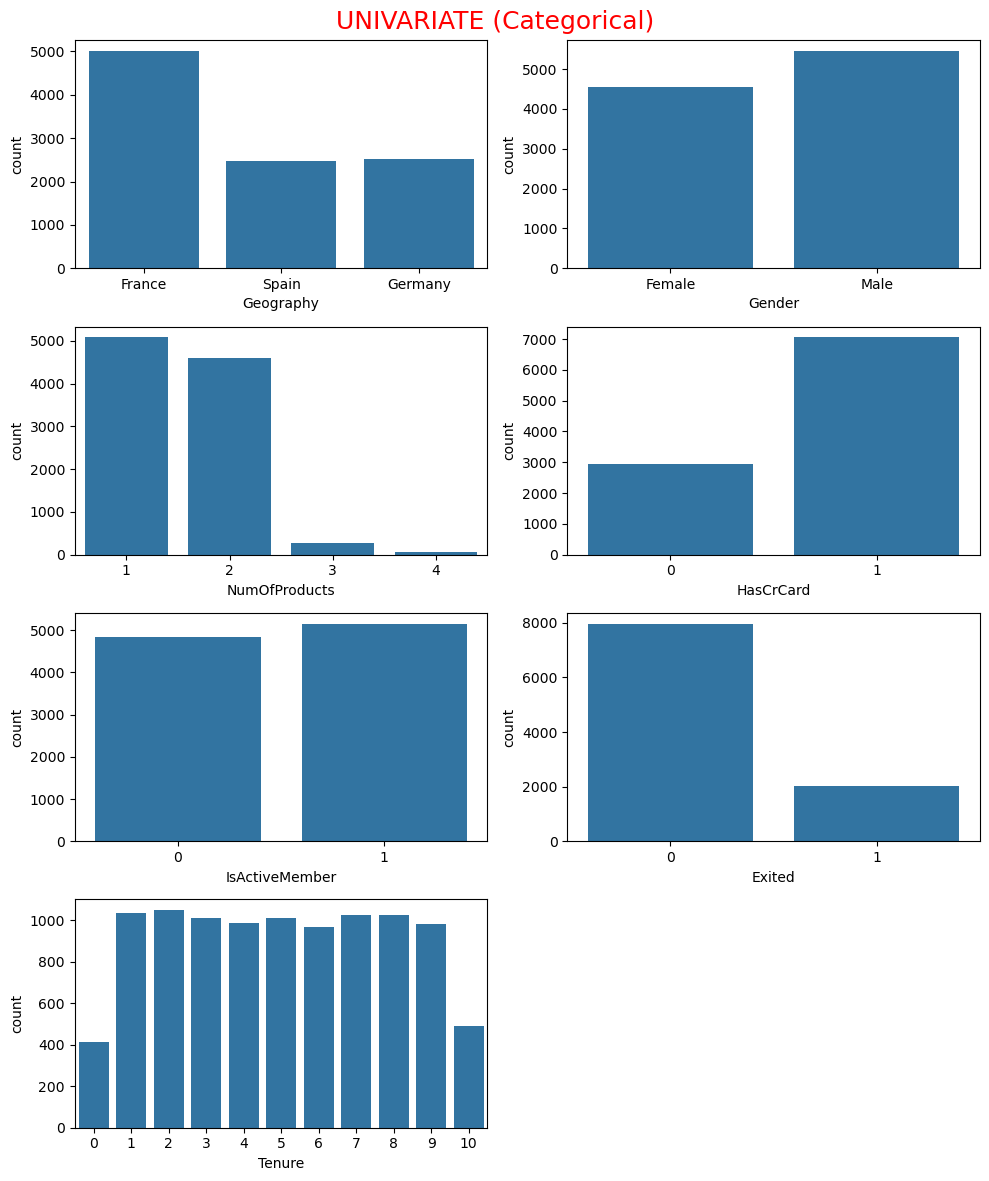

In [15]:
# Explore the Categorical columns

t=1
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Categorical)',color='red',size=18)
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

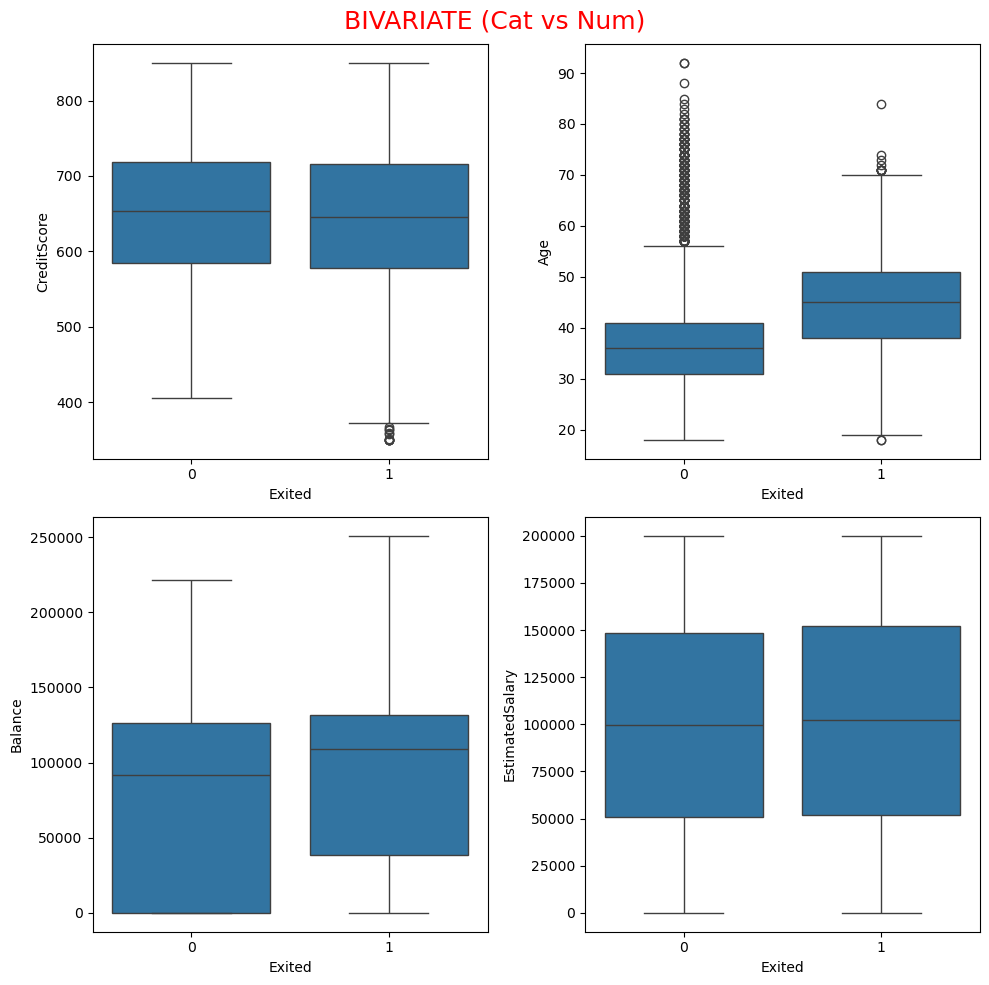

In [17]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,y=i,x='Exited')
    t+=1
plt.tight_layout()
plt.show()

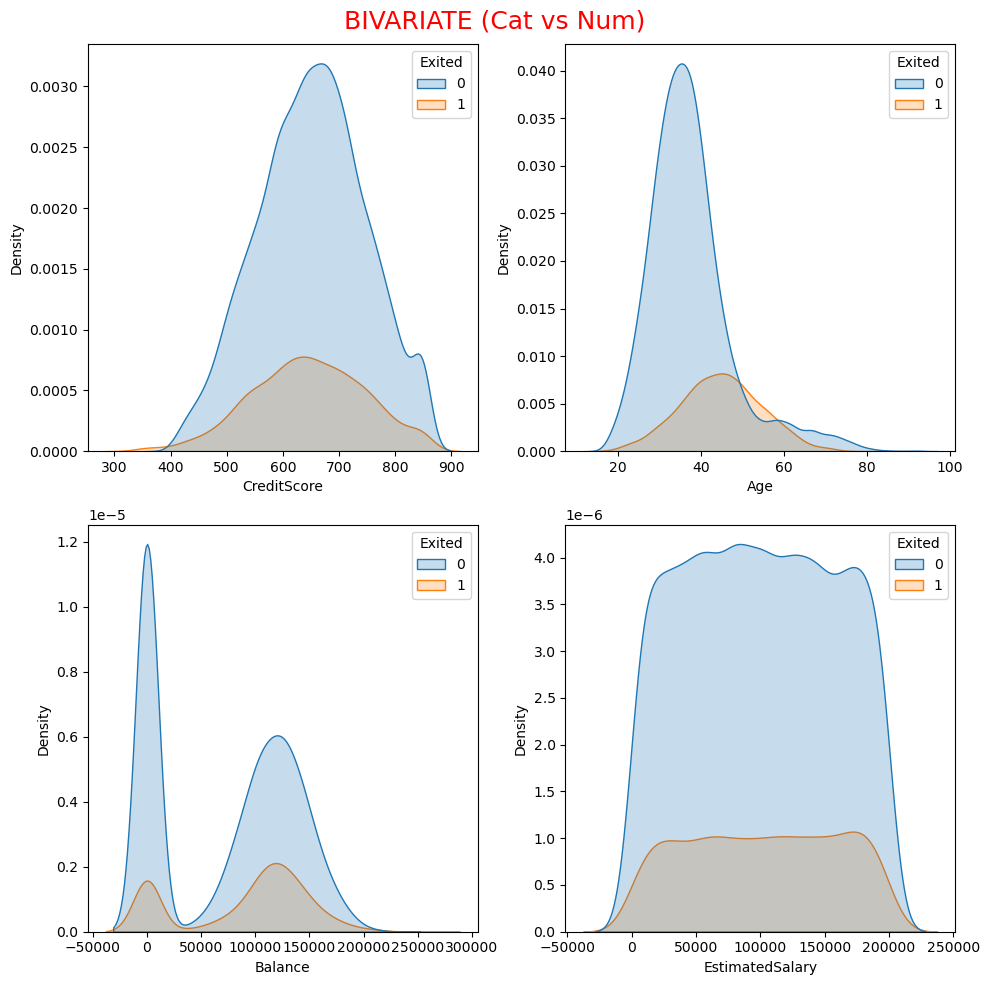

In [18]:
# Cat vs Num
t=1
plt.figure(figsize=(10,10))
plt.suptitle('BIVARIATE (Cat vs Num)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,hue='Exited',fill=True)
    t+=1
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

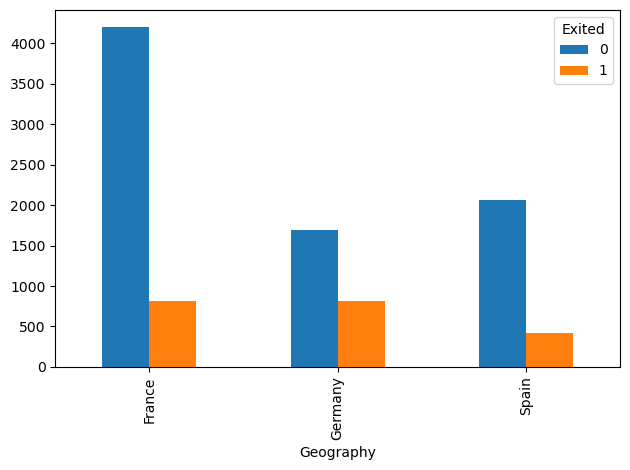

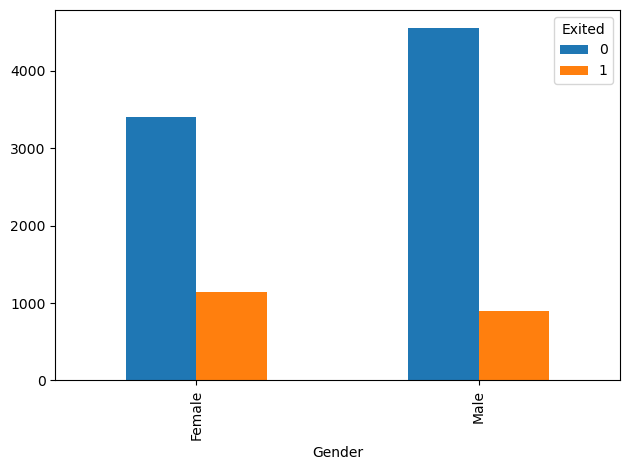

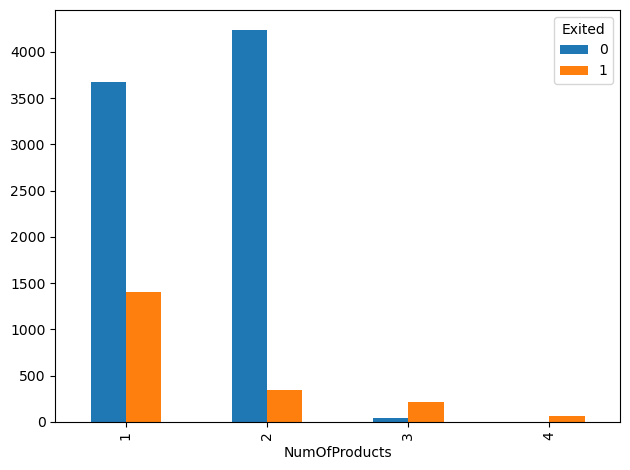

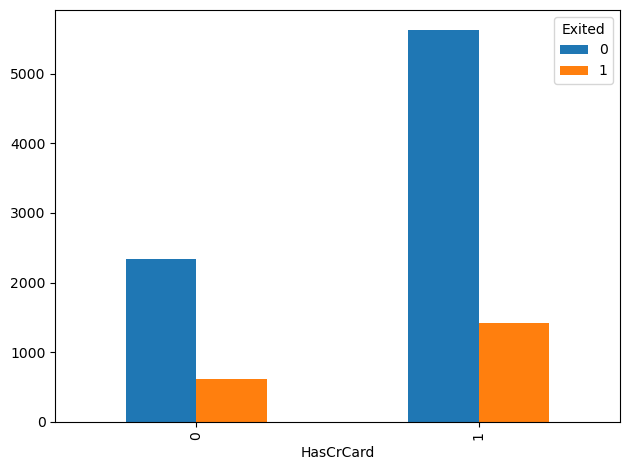

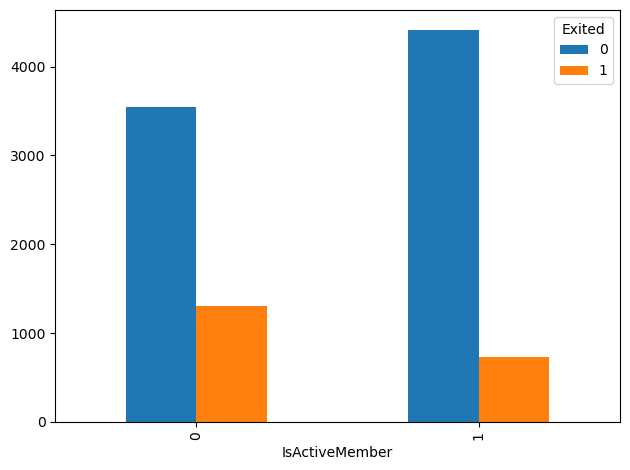

<Figure size 640x480 with 0 Axes>

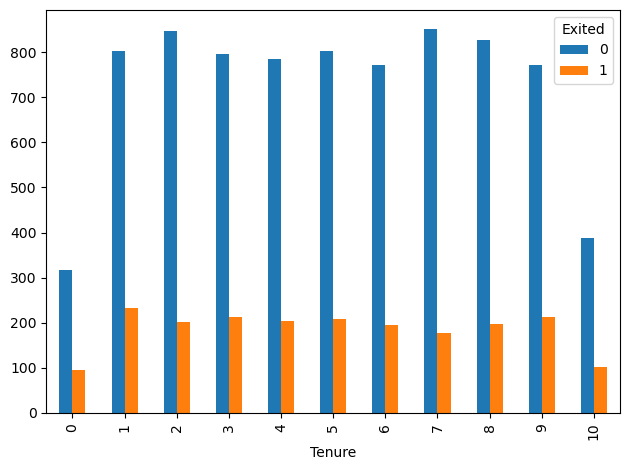

In [19]:
# cat vs cat

plt.figure(figsize=(10,10))
for i in cat_cols:
    if i != 'Exited':
        pd.crosstab(data[i],data['Exited']).plot(kind='bar')
    plt.tight_layout()
    plt.show()
        

## Multivaraite Analysis

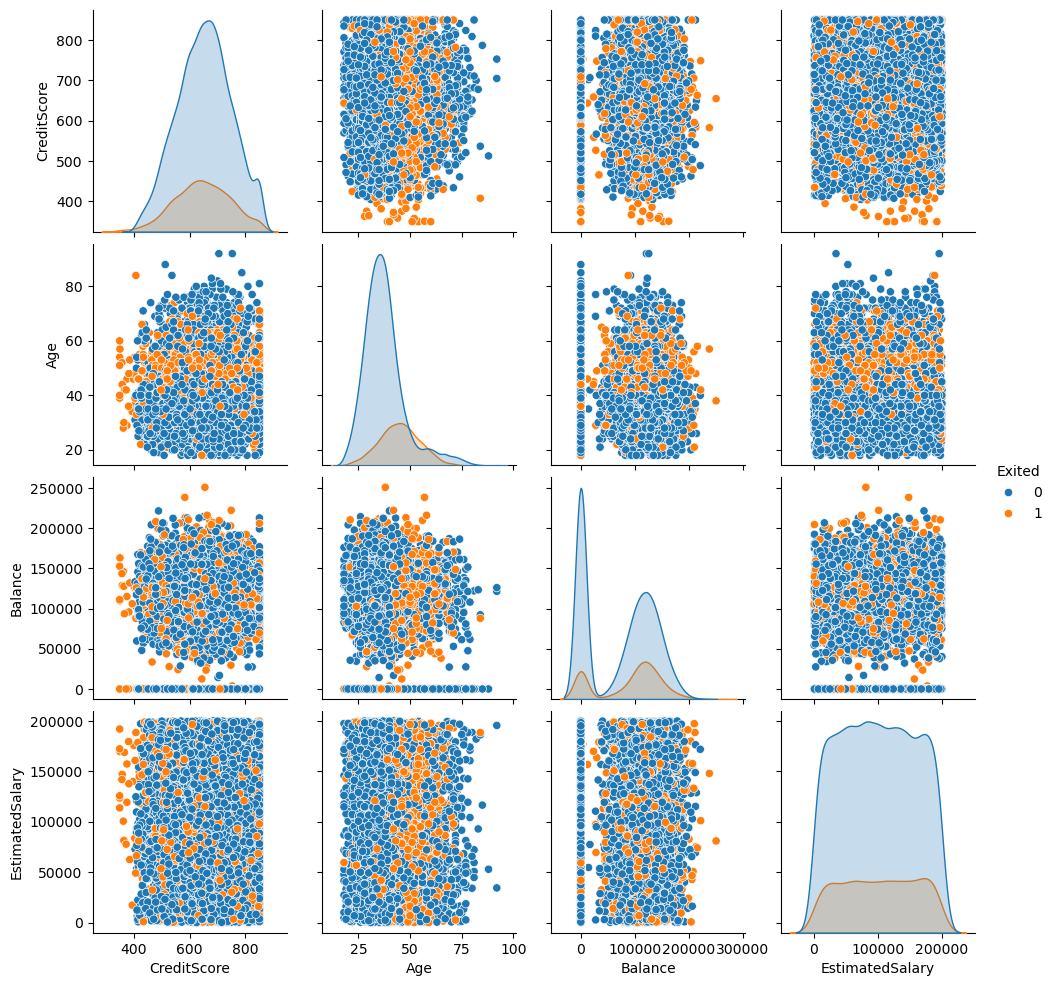

In [21]:
sns.pairplot(data=data,x_vars=num_cols,y_vars=num_cols,hue='Exited')
plt.show()

## Data Preprocessing

In [23]:
# Remove the redundant columns
data.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0

In [24]:
data.drop(columns=['RowNumber', 'Surname'],inplace=True)

In [25]:
data.set_index('CustomerId',inplace=True)

In [26]:
data.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  \
CustomerId                                                         
15634602            619    France  Female   42       2      0.00   
15647311            608     Spain  Female   41       1  83807.86   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602                1          1               1        101348.88       1  
15647311                1          0               1        112542.58       0

### Missing Value Treatment

In [28]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Outlier Treatment

In [30]:
# Cap the outliers using IQR method
for i in num_cols:
    q3,q1 = data[i].quantile([0.75,0.25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr,q1-1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

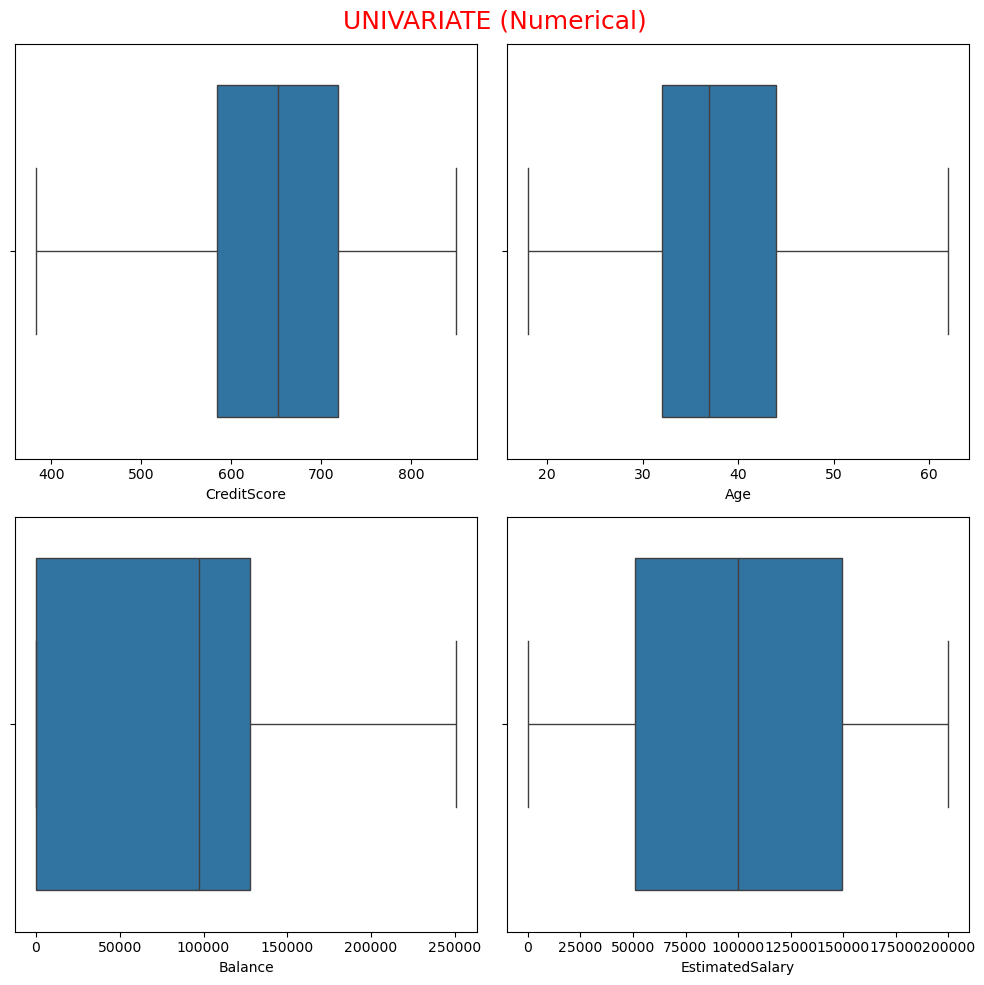

In [31]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Duplicates

In [33]:
data[data.duplicated()]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

## Feature Engineering

### Encoding

In [36]:
data[cat_cols]

Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId                                                               
15634602      France  Female              1          1               1   
15647311       Spain  Female              1          0               1   
15619304      France  Female              3          1               0   
15701354      France  Female              2          0               0   
15737888       Spain  Female              1          1               1   
...              ...     ...            ...        ...             ...   
15606229      France    Male              2          1               0   
15569892      France    Male              1          1               1   
15584532      France  Female              1          0               1   
15682355     Germany    Male              2          1               0   
15628319      France  Female              1          1               0   

            Exited  Tenure  
CustomerId                  
15634602         1       2  
15647311         0       1  
15619304         1       8  
15701354         0       1  
15737888         0       2  
...            ...     ...  
15606229         0       5  
15569892         0      10  
15584532         1       7  
15682355         1       3  
15628319         0       4  

[10000 rows x 7 columns]

In [37]:
map_dic = round(data.groupby(by='Geography')['Exited'].mean(),2).to_dict()

In [38]:

data['Geography'] = data['Geography'].map(map_dic)


In [39]:
data.head(3)

CreditScore  Geography  Gender   Age  Tenure    Balance  \
CustomerId                                                            
15634602          619.0       0.16  Female  42.0       2       0.00   
15647311          608.0       0.17  Female  41.0       1   83807.86   
15619304          502.0       0.16  Female  42.0       8  159660.80   

            NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CustomerId                                                                     
15634602                1          1               1        101348.88       1  
15647311                1          0               1        112542.58       0  
15619304                3          1               0        113931.57       1

In [40]:
data = pd.get_dummies(data,columns=['Gender'],drop_first=True,dtype=int)

In [41]:
data.head(3)

CreditScore  Geography   Age  Tenure    Balance  NumOfProducts  \
CustomerId                                                                   
15634602          619.0       0.16  42.0       2       0.00              1   
15647311          608.0       0.17  41.0       1   83807.86              1   
15619304          502.0       0.16  42.0       8  159660.80              3   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1        101348.88       1            0  
15647311            0               1        112542.58       0            0  
15619304            1               0        113931.57       1            0

### Feature Scalling

In [43]:
# Use Standard Scaler to scale the numeric columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [44]:
data.head(3)

CreditScore  Geography       Age  Tenure   Balance  NumOfProducts  \
CustomerId                                                                      
15634602      -0.326878       0.16  0.342615       2 -1.225848              1   
15647311      -0.440804       0.17  0.240011       1  0.117350              1   
15619304      -1.538636       0.16  0.342615       8  1.333053              3   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1         0.021886       1            0  
15647311            0               1         0.216534       0            0  
15619304            1               0         0.240687       1            0

### Feature Transformation

In [46]:
for i in num_cols:
    print(i,data[i].skew())

CreditScore -0.06425547313963934
Age 0.6303147000106647
Balance -0.1411087109415436
EstimatedSalary 0.0020853576615585175


In [47]:
pt= PowerTransformer(standardize=False)
data[num_cols] = pt.fit_transform(data[num_cols])

In [48]:
for i in num_cols:
    print(i,data[i].skew())

CreditScore -0.006191782558000948
Age -0.004456522457598359
Balance -0.005238155641912919
EstimatedSalary -0.00033028328191886196


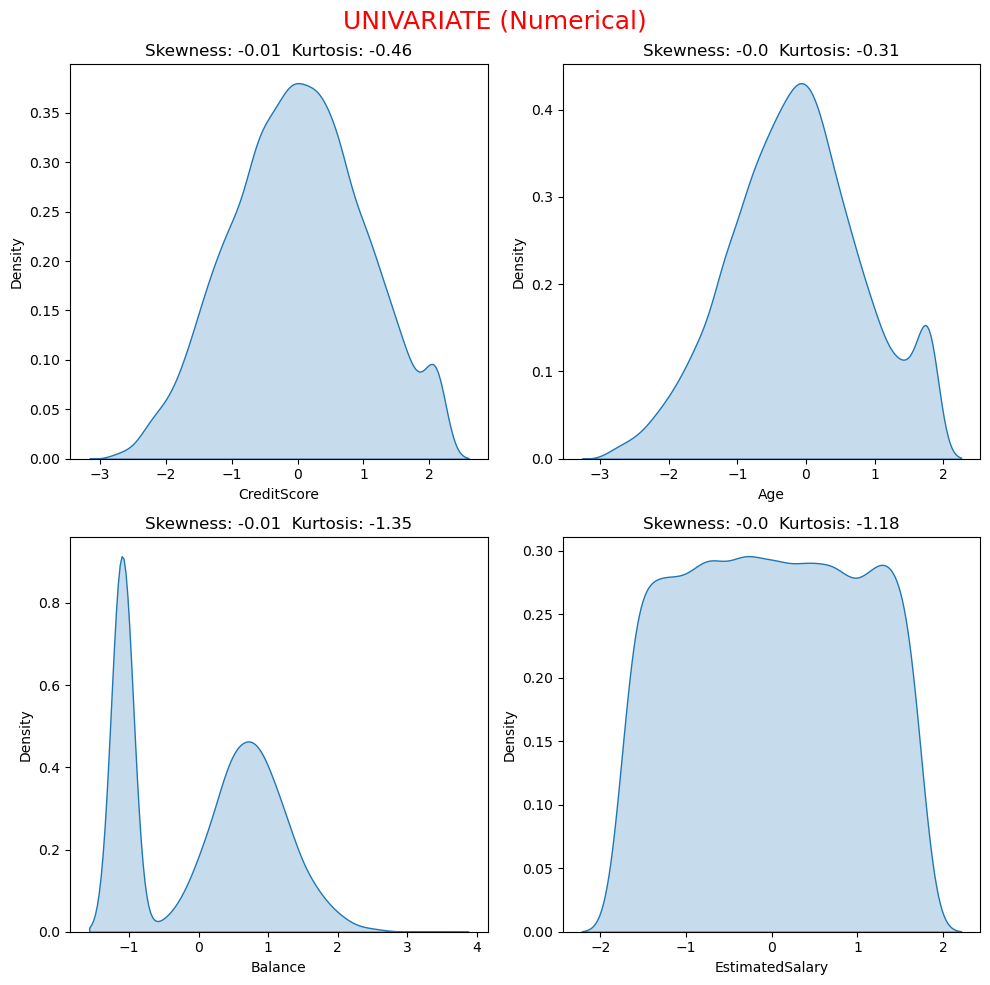

In [49]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('UNIVARIATE (Numerical)',color='red',size=18)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(2,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

In [50]:
data.head()

CreditScore  Geography       Age  Tenure   Balance  NumOfProducts  \
CustomerId                                                                      
15634602      -0.324998       0.16  0.322086       2 -1.101323              1   
15647311      -0.437491       0.17  0.229528       1  0.118955              1   
15619304      -1.506830       0.16  0.322086       8  1.499141              3   
15701354       0.505944       0.16  0.034563       1 -1.101323              2   
15737888       2.119781       0.17  0.411828       2  0.848624              1   

            HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
CustomerId                                                                   
15634602            1               1         0.021886       1            0  
15647311            0               1         0.216471       0            0  
15619304            1               0         0.240610       1            0  
15701354            0               0        -0.108934       0            0  
15737888            1               1        -0.365448       0            0

#### Predictive Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split

#### Train-Test Split

In [54]:
y = data['Exited']
x = data.drop(columns = ['Exited'])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 8000, stratify = y, random_state =2)

In [56]:
y.value_counts(normalize = True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [57]:
y_train.value_counts(normalize = True)

Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

In [58]:
print(x_train.shape,y_train.shape)

print(x_test.shape, y_test.shape)

(8000, 10) (8000,)
(2000, 10) (2000,)


#### Logictic Regression

In [147]:
model_lr = LogisticRegression(random_state =2)

In [149]:
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [151]:
model_lr.coef_

array([[-0.06768279, -0.26471781,  0.75421654, -0.0426366 ,  0.16113902,
        -0.06027777, -0.01023588, -0.53343208,  0.01574359,  0.33718999,
         0.03896027]])

In [153]:
model_lr.intercept_

array([-1.63565128])

In [155]:
y_predh_lr = model_lr.predict(x_test)

In [157]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]

In [159]:
print(classification_report(y_test,y_predh_lr))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



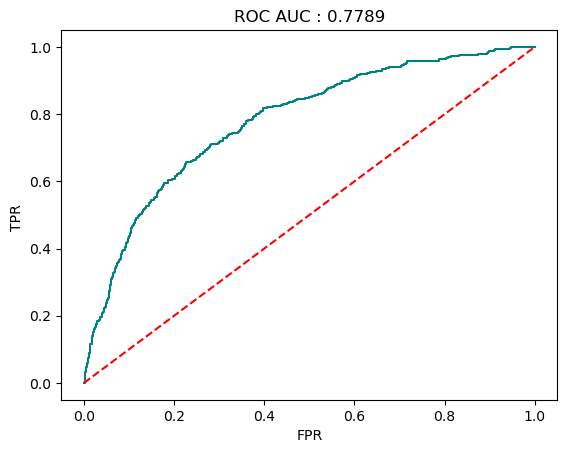

In [161]:
# ROC CURVE

fpr,tpr,thres = roc_curve(y_test, y_preds_lr)
plt.plot(fpr,tpr, color='teal')
plt.plot([0,1],[0,1],color = 'red', ls = '--')
plt.title(f'ROC AUC : {round(roc_auc_score(y_test,y_preds_lr),5)}')
plt.xlabel('FPR')
plt.ylabel('TPR ')
plt.show()

In [166]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
sampler = RandomOverSampler(sampling_strategy=0.6)

In [168]:
x_train_os, y_train_os = sampler.fit_resample(x_train,y_train)

In [170]:
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [172]:
y_train_os.value_counts()

Exited
0    6356
1    3813
Name: count, dtype: int64

In [174]:
3813/6356

0.5999056010069226

In [ ]:
# SMOTE : Synthetic Minority Oversampling Technique

In [176]:
model_lr = LogisticRegression(random_state =2)
model_lr.fit(x_train_os, y_train_os)

LogisticRegression(random_state=2)

In [178]:
y_predh_lr = model_lr.predict(x_test)
y_preds_lr = model_lr.predict_proba(x_test)[:,1]

In [180]:
print(classification_report(y_test, y_predh_lr))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.49      0.53      0.51       393

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.81      0.80      0.80      2000



### KNN (K-Nearest Neighbour)

In [ ]:
# It works for both classification and regression

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
model_knn = KNeighborsClassifier(n_neighbors=13, weights = 'distance')

In [188]:
model_knn.fit(x_train_os, y_train_os)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [192]:
y_predh_knn = model_knn.predict(x_test)
y_preds_knn = model_knn.predict_proba(x_test)[:,1]

In [198]:
y_preds_knn

array([0.        , 0.        , 0.19463818, ..., 0.86871063, 0.14236331,
       0.71753302])

In [194]:
print(classification_report(y_test,y_predh_knn))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1607
           1       0.49      0.58      0.53       393

    accuracy                           0.80      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.80      0.80      2000



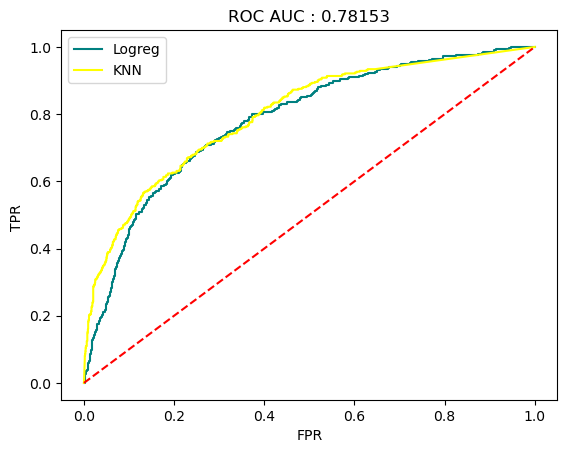

In [200]:
fpr_lr,tpr_lr,thres = roc_curve(y_test, y_preds_lr)
fpr_knn,tpr_knn,thres = roc_curve(y_test, y_preds_knn)
plt.plot(fpr_lr,tpr_lr, color='teal', label = 'Logreg')
plt.plot(fpr_knn,tpr_knn, color='yellow',label = 'KNN')
plt.plot([0,1],[0,1],color = 'red', ls = '--')
plt.title(f'ROC AUC : {round(roc_auc_score(y_test,y_preds_lr),5)}')
plt.xlabel('FPR')
plt.ylabel('TPR ')
plt.legend()
plt.show()

In [202]:
roc_auc_score(y_test,y_preds_lr)

0.7815251658219209

In [204]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [206]:
model_nb = GaussianNB()
model_nb.fit(x_train_os,y_train_os)

GaussianNB()

In [208]:
y_predh_nb = model_nb.predict(x_test)
y_preds_nb = model_nb.predict_proba(x_test)[:,1]

In [210]:
print(classification_report(y_test, y_predh_nb))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1607
           1       0.47      0.56      0.51       393

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



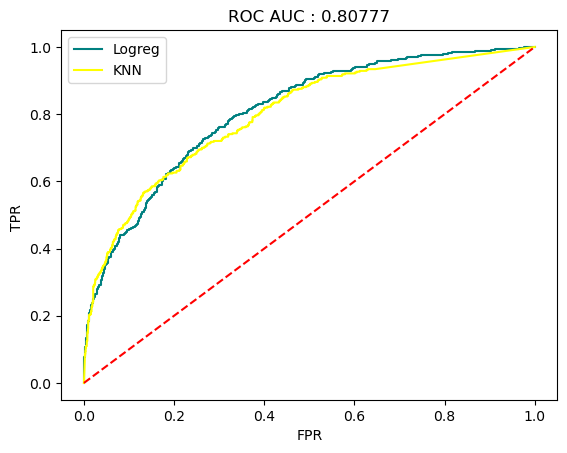

In [212]:
fpr_nb,tpr_nb,thres = roc_curve(y_test, y_preds_nb)
fpr_knn,tpr_knn,thres = roc_curve(y_test, y_preds_knn)
plt.plot(fpr_nb,tpr_nb, color='teal', label = 'Logreg')
plt.plot(fpr_knn,tpr_knn, color='yellow',label = 'KNN')
plt.plot([0,1],[0,1],color = 'red', ls = '--')
plt.title(f'ROC AUC : {round(roc_auc_score(y_test,y_preds_nb),5)}')
plt.xlabel('FPR')
plt.ylabel('TPR ')
plt.legend()
plt.show()

In [214]:
print(f'ROC AUC Logreg : {round(roc_auc_score(y_test,y_preds_lr),5)}')
print(f'ROC KNN : {round(roc_auc_score(y_test,y_preds_knn),5)}')
print(f'ROC AUC NB : {round(roc_auc_score(y_test,y_preds_nb),5)}')


ROC AUC Logreg : 0.78153
ROC KNN : 0.7982
ROC AUC NB : 0.80777


## Finding Best Hyperparameters

========== Processing Decision Tree ==========

--- Default Model ---
Accuracy: 0.7820
ROC-AUC Score: 0.6721

--- Hyperparameter Tuning ---
Using GridSearchCV for this model.
Fitting 3 folds for each of 216 candidates, totalling 648 fits

--- Top 3 Parameter Sets for Decision Tree (Ranked by F2-Score) ---
Rank: 1, F2-Score: 0.5212
Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Rank: 1, F2-Score: 0.5212
Params: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Rank: 3, F2-Score: 0.5168
Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


--- Enhanced Model (After Tuning) ---
Accuracy: 0.8100
ROC-AUC Score: 0.7560
Full Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.52      0.51     

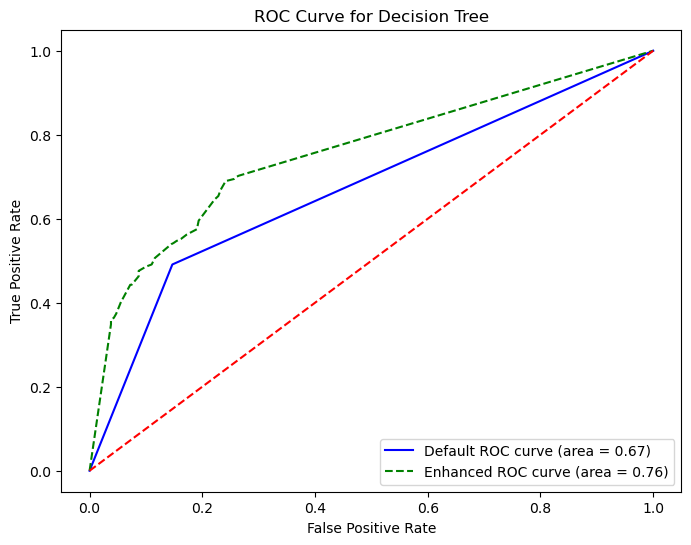

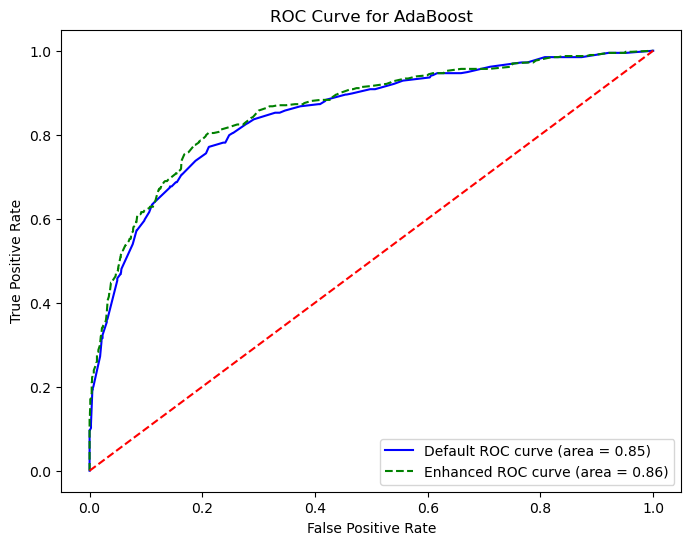

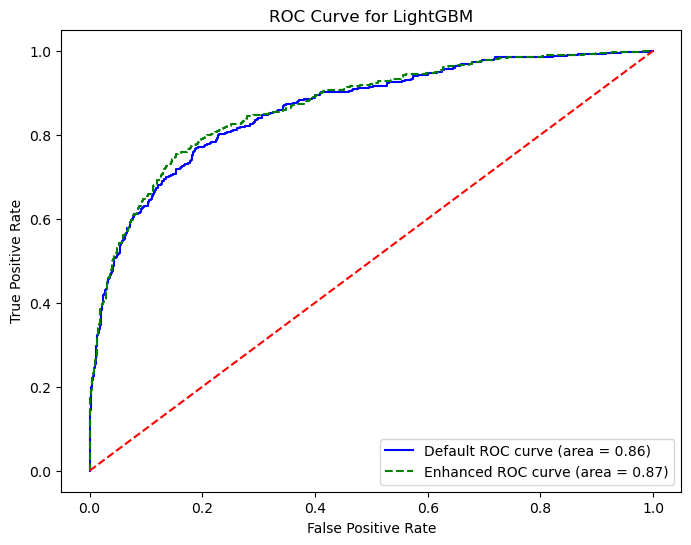

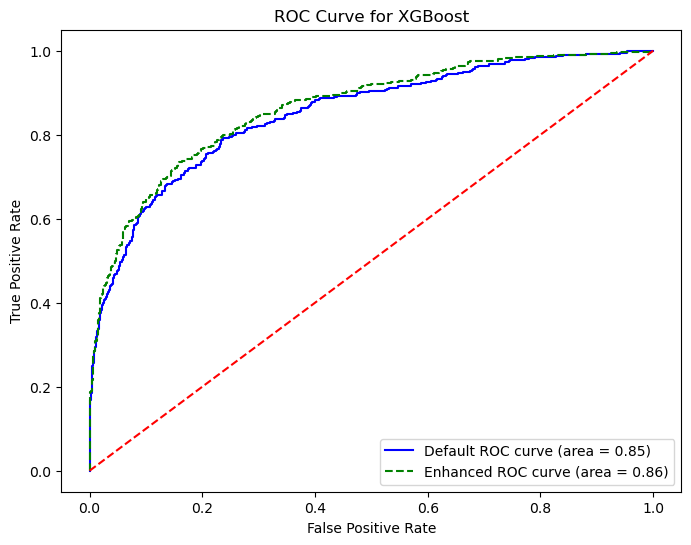

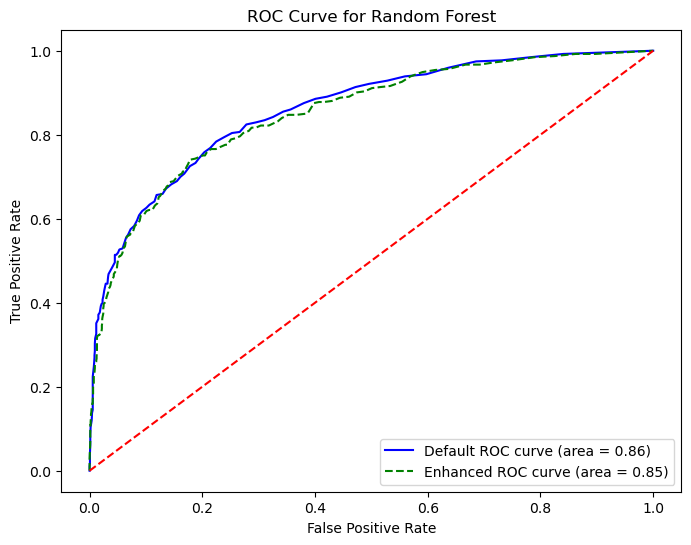

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import (classification_report, accuracy_score, roc_auc_score, 
                             roc_curve, make_scorer, fbeta_score)

import warnings

warnings.filterwarnings('ignore')

# --- Data Loading and Preprocessing (Assuming you have this part) ---
# This part is assumed to be the same as before, resulting in:
# x_train, x_test, y_train, y_test
data = pd.read_csv("Churn_Modelling.csv")
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
X = data.drop('Exited', axis=1)
y = data['Exited']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

f2_scorer = make_scorer(fbeta_score, beta=2)

# --- Define Models and Parameter Grids ---
# Using the large grids as requested
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
            'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
    }),
    "LightGBM": (lgb.LGBMClassifier(random_state=42), {
        'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 33, 45]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.005, 0.01], 'reg_lambda': [1, 1.5, 2]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
       'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]
    })
}

# --- Loop Through Models for Training, Tuning, and Evaluation ---

for name, (model, params) in models.items():
    print(f"========== Processing {name} ==========")
    
    # --- 1. Default Model ---
    print("\n--- Default Model ---")
    default_model = model
    default_model.fit(x_train_os,y_train_os)
    y_pred_default = default_model.predict(x_test)
    y_pred_proba_default = default_model.predict_proba(x_test)[:, 1]
    
    roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
    print(f"ROC-AUC Score: {roc_auc_default:.4f}")

    # --- 2. Hyperparameter Tuning (Optimized for F2-Score) ---
    print("\n--- Hyperparameter Tuning ---")
    
    if name in ["Random Forest", "XGBoost"]:
        print("Using RandomizedSearchCV for this model.")
        search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=50, 
                                    cv=3, scoring=f2_scorer, n_jobs=-1, random_state=42, verbose=1)
    else:
        print("Using GridSearchCV for this model.")
        search = GridSearchCV(estimator=model, param_grid=params, cv=3, 
                              scoring=f2_scorer, n_jobs=-1, verbose=1)
    
    search.fit(x_train, y_train)
    
    # --- 3. Display Top 3 Parameter Sets ---
    print(f"\n--- Top 3 Parameter Sets for {name} (Ranked by F2-Score) ---")
    cv_results = pd.DataFrame(search.cv_results_)
    cv_results = cv_results.sort_values("rank_test_score")
    
    top_3 = cv_results.head(3)
    for index, row in top_3.iterrows():
        # This now correctly reports the F2-Score from the tuning results
        print(f"Rank: {row['rank_test_score']}, F2-Score: {row['mean_test_score']:.4f}")
        print(f"Params: {row['params']}\n")

    # --- 4. Enhanced Model (using the best estimator from the search) ---
    print("\n--- Enhanced Model (After Tuning) ---")
    enhanced_model = search.best_estimator_
    y_pred_enhanced = enhanced_model.predict(x_test)
    y_pred_proba_enhanced = enhanced_model.predict_proba(x_test)[:, 1]
    
    # Evaluate the best model using ALL relevant metrics
    roc_auc_enhanced = roc_auc_score(y_test, y_pred_proba_enhanced)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_enhanced):.4f}")
    print(f"ROC-AUC Score: {roc_auc_enhanced:.4f}")
    print("Full Classification Report:")
    print(classification_report(y_test, y_pred_enhanced))
    
    # --- 5. ROC-AUC Curve ---
    fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
    fpr_enhanced, tpr_enhanced, _ = roc_curve(y_test, y_pred_proba_enhanced)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_default, tpr_default, color='blue', label=f'Default ROC curve (area = {roc_auc_default:.2f})')
    plt.plot(fpr_enhanced, tpr_enhanced, color='green', linestyle='--', label=f'Enhanced ROC curve (area = {roc_auc_enhanced:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    
    plot_filename = f"roc_curve_{name.replace(' ', '_')}.png"
    plt.savefig(plot_filename)
    print(f"\nROC Curve saved as {plot_filename}")
    
    print("\n" + "="*50 + "\n")

#### Lets see if we can improve recall of class 1 by changing cutoff classifier

In [226]:
best_params = {
    "XGBoost": {
        'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 
        'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 
        'gamma': 0.1, 'colsample_bytree': 0.9
    },
    "LightGBM": {
        'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 20
    },
    "AdaBoost": {
        'learning_rate': 1.0, 'n_estimators': 300
    }
}

models = {
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Define the thresholds to test
thresholds = [0.55,0.51, 0.525,0.54, 0.5,0.49, 0.48, 0.475,0.46,  0.45, 0.437, 0.425,0.41, 0.4,0.375, 0.35, 0.325,  0.3]

# --- Loop Through Models and Thresholds ---
for name in best_params:
    print(f"========== Processing {name} ==========")
    
    #  Initialize and train the model with its best parameters
    model = models[name]
    model.set_params(**best_params[name])
    model.fit(x_train_os, y_train_os)
    
    #  Get predicted probabilities for the positive class (churn)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nOverall ROC-AUC Score: {roc_auc:.4f}")

    #  Test each threshold
    for t in thresholds:
        print(f"\n--- Results for Threshold: {t} ---")
        
        # Apply the custom threshold to probabilities
        y_pred_custom = [1 if prob >= t else 0 for prob in y_pred_proba]
        
        # Print accuracy and the classification report
        print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred_custom))

    print("\n" + "="*50 + "\n")

========== Processing XGBoost ==========

Overall ROC-AUC Score: 0.8689

--- Results for Threshold: 0.55 ---
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.66      0.62      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.62      0.65      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-scor

## Applying Smote and other samplers

Original Class Distribution: Counter({0: 6370, 1: 1630})

==================== Using Sampler: RandomOversampling ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7905
Default ROC-AUC: 0.6764
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7905
Enhanced ROC-AUC: 0.6892
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



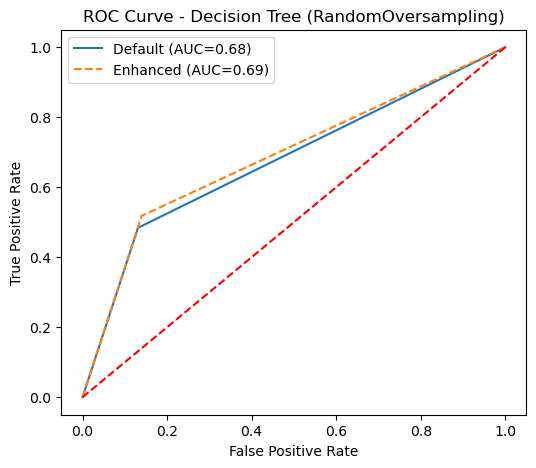


========== Processing Random Forest ==========
Default Accuracy: 0.8500
Default ROC-AUC: 0.8515
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8570
Enhanced ROC-AUC: 0.8512
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.54      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



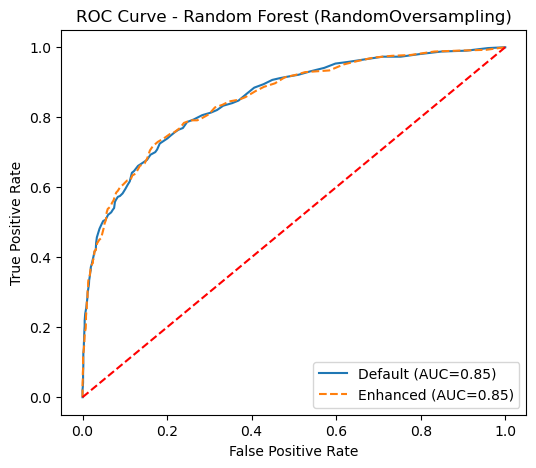


========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8479
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7795
Enhanced ROC-AUC: 0.8514
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



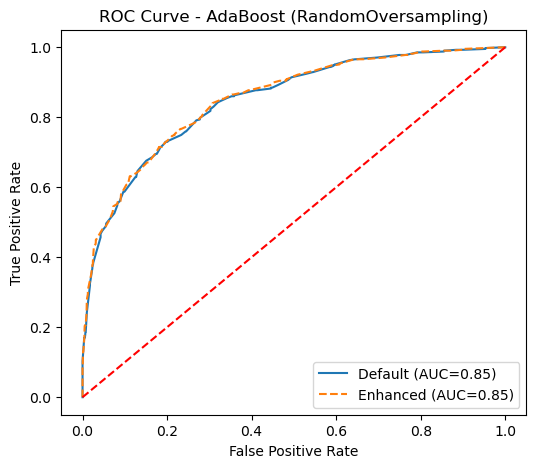


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8240
Default ROC-AUC: 0.8522
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5000

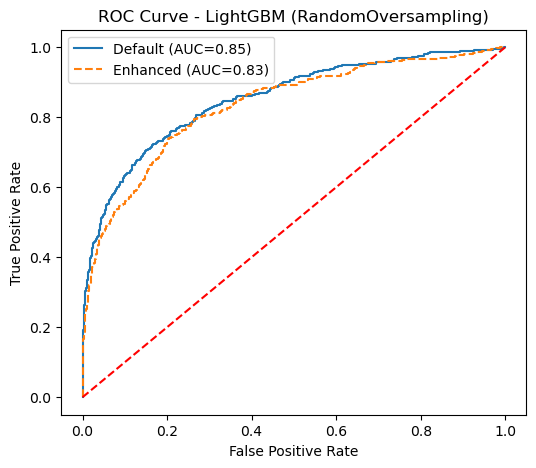


========== Processing XGBoost ==========
Default Accuracy: 0.7800
Default ROC-AUC: 0.8365
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7745
Enhanced ROC-AUC: 0.8403
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



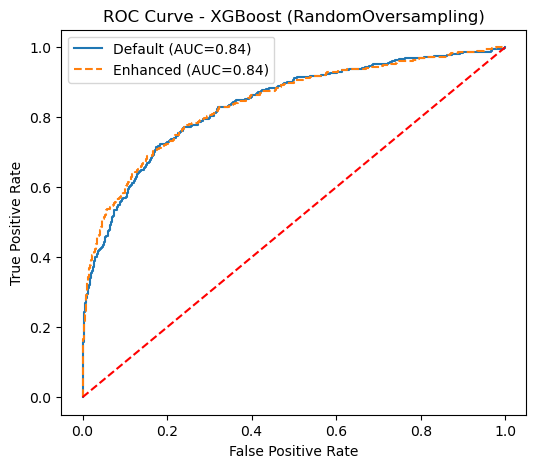


========== Processing Logistic Regression ==========
Default Accuracy: 0.7160
Default ROC-AUC: 0.7781
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7125
Enhanced ROC-AUC: 0.7777
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



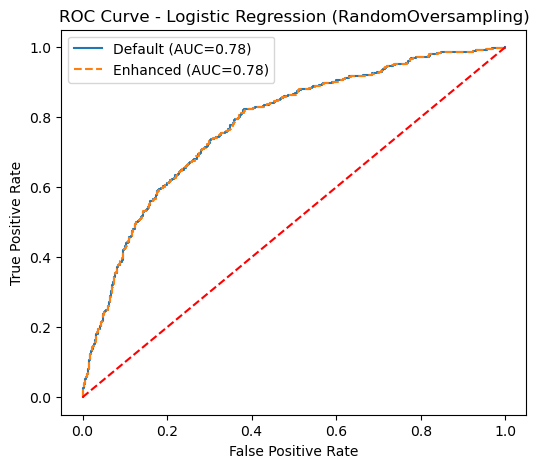


========== Processing KNN ==========
Default Accuracy: 0.7195
Default ROC-AUC: 0.7379
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7230
Enhanced ROC-AUC: 0.7704
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.39      0.67      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.75      2000



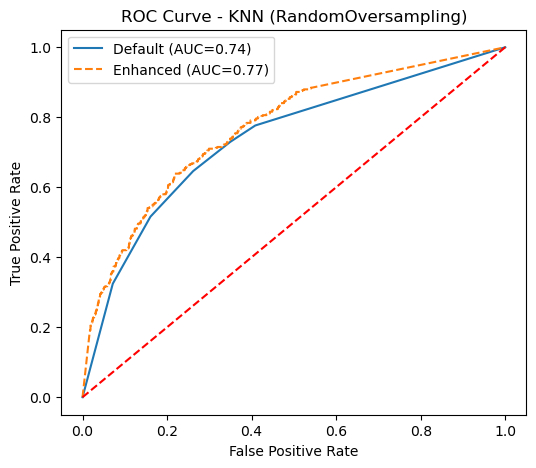


==================== Using Sampler: SMOTE ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7650
Default ROC-AUC: 0.6714
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7715
Enhanced ROC-AUC: 0.6901
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1593
           1       0.45      0.55      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



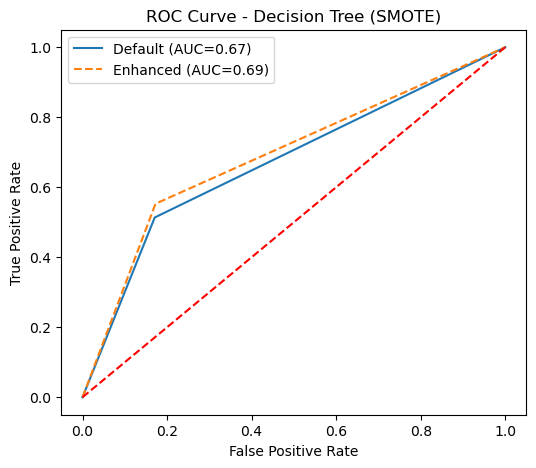


========== Processing Random Forest ==========
Default Accuracy: 0.8420
Default ROC-AUC: 0.8473
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8440
Enhanced ROC-AUC: 0.8520
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.84      0.84      2000



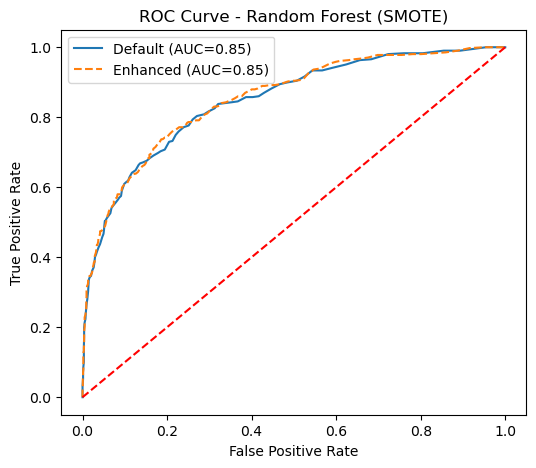


========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8512
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.8035
Enhanced ROC-AUC: 0.8535
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



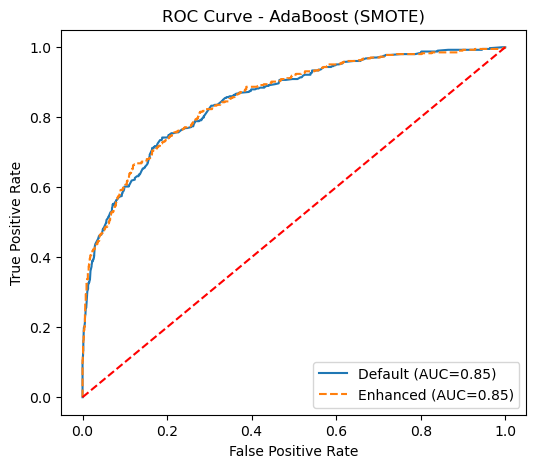


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8570
Default ROC-AUC: 0.8574
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50

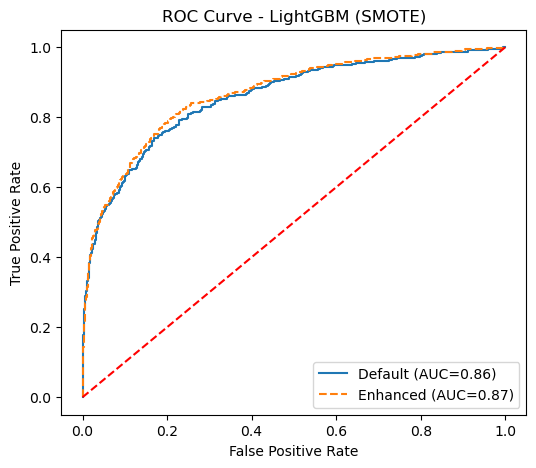


========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8313
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6975
Enhanced ROC-AUC: 0.8570
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78      1593
           1       0.39      0.83      0.53       407

    accuracy                           0.70      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.70      0.73      2000



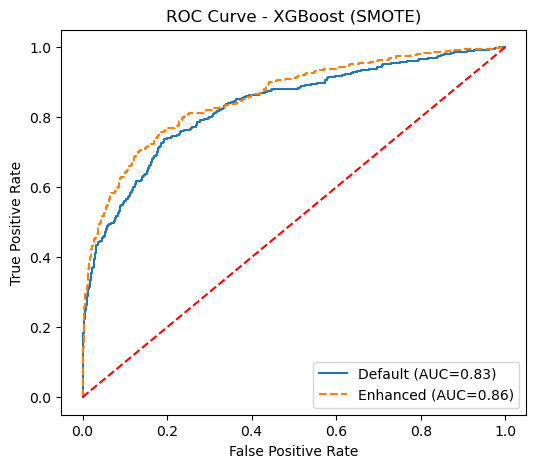


========== Processing Logistic Regression ==========
Default Accuracy: 0.7155
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7140
Enhanced ROC-AUC: 0.7765
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



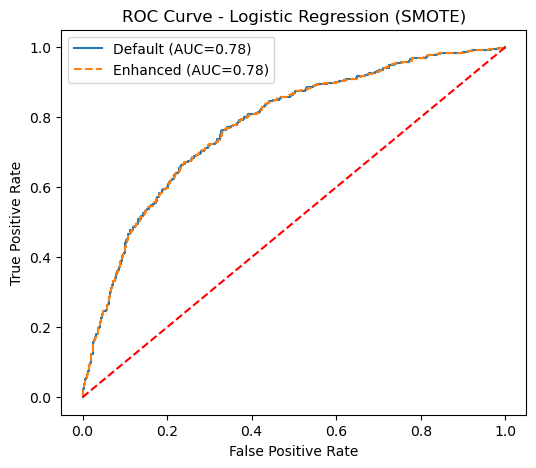


========== Processing KNN ==========
Default Accuracy: 0.7245
Default ROC-AUC: 0.7554
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7450
Enhanced ROC-AUC: 0.7388
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



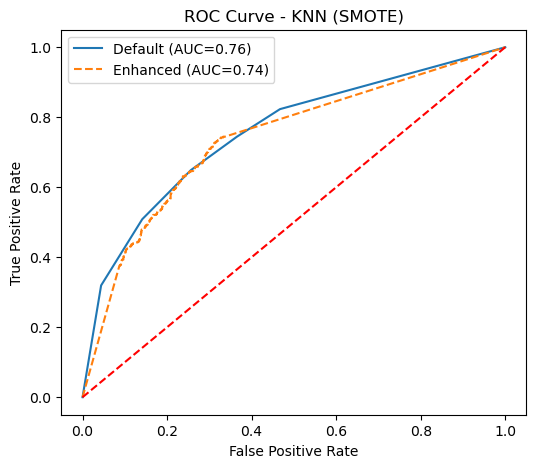


==================== Using Sampler: SMOTEENN ====================
Resampled Class Distribution: Counter({1: 5410, 0: 4203})

========== Processing Decision Tree ==========
Default Accuracy: 0.7685
Default ROC-AUC: 0.7550
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7360
Enhanced ROC-AUC: 0.6989
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1593
           1       0.41      0.64      0.50       407

    accuracy                           0.74      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.74      0.75      2000



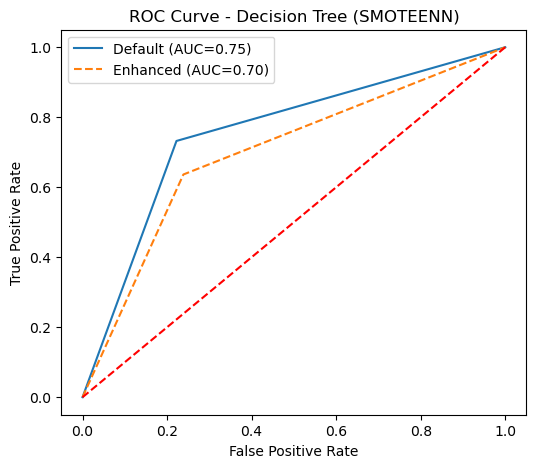


========== Processing Random Forest ==========
Default Accuracy: 0.7990
Default ROC-AUC: 0.8500
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7940
Enhanced ROC-AUC: 0.8510
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.79      0.81      2000



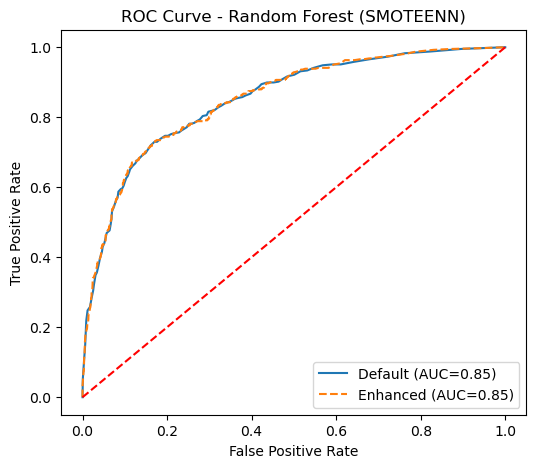


========== Processing AdaBoost ==========
Default Accuracy: 0.7430
Default ROC-AUC: 0.8476
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7585
Enhanced ROC-AUC: 0.8511
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



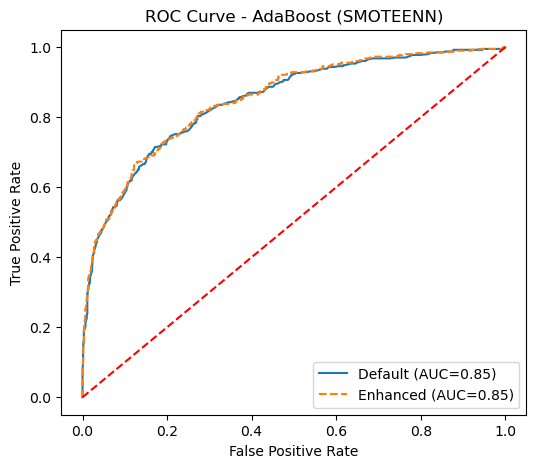


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Default Accuracy: 0.8250
Default ROC-AUC: 0.8587
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11

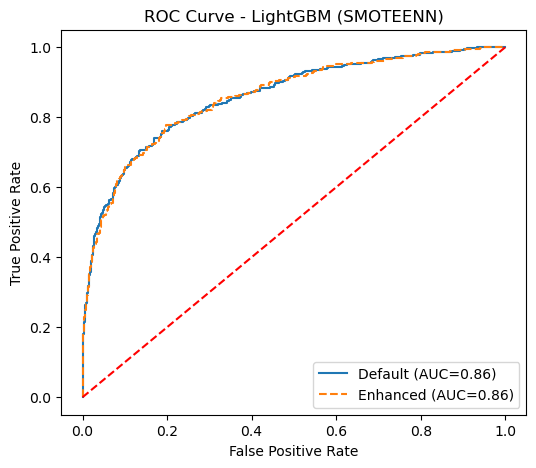


========== Processing XGBoost ==========
Default Accuracy: 0.7865
Default ROC-AUC: 0.8488
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7510
Enhanced ROC-AUC: 0.8575
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.81      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



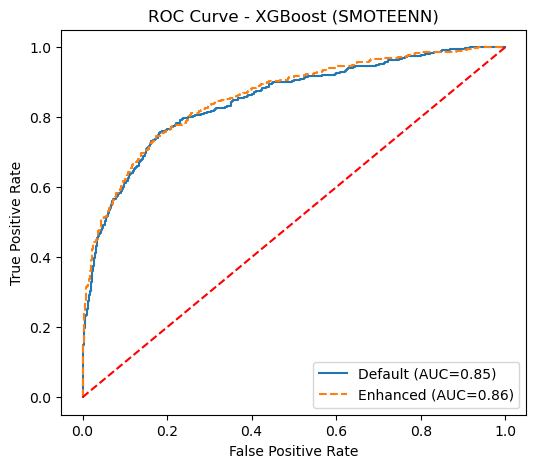


========== Processing Logistic Regression ==========
Default Accuracy: 0.6905
Default ROC-AUC: 0.7704
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.6865
Enhanced ROC-AUC: 0.7694
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.77      1593
           1       0.36      0.73      0.49       407

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.63      2000
weighted avg       0.80      0.69      0.72      2000



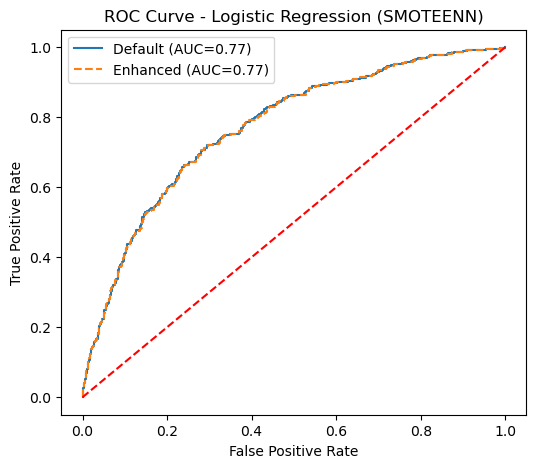


========== Processing KNN ==========
Default Accuracy: 0.6915
Default ROC-AUC: 0.7586
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7025
Enhanced ROC-AUC: 0.7382
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



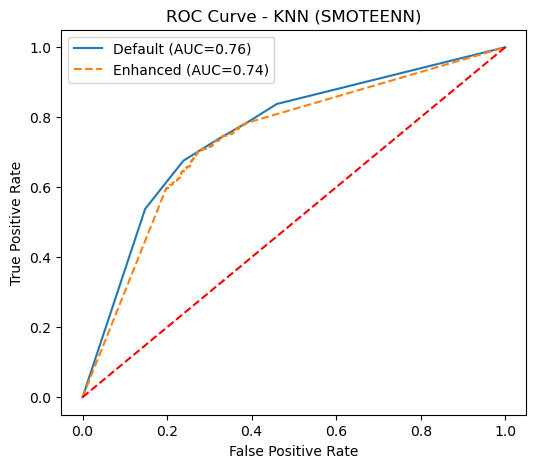


==================== Using Sampler: SMOTETomek ====================
Resampled Class Distribution: Counter({1: 6273, 0: 6273})

========== Processing Decision Tree ==========
Default Accuracy: 0.7710
Default ROC-AUC: 0.6870
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7555
Enhanced ROC-AUC: 0.6847
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1593
           1       0.42      0.55      0.48       407

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.78      0.76      0.77      2000



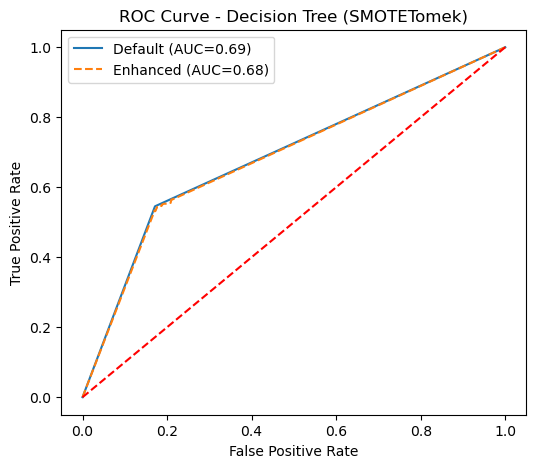


========== Processing Random Forest ==========
Default Accuracy: 0.8390
Default ROC-AUC: 0.8482
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8400
Enhanced ROC-AUC: 0.8512
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



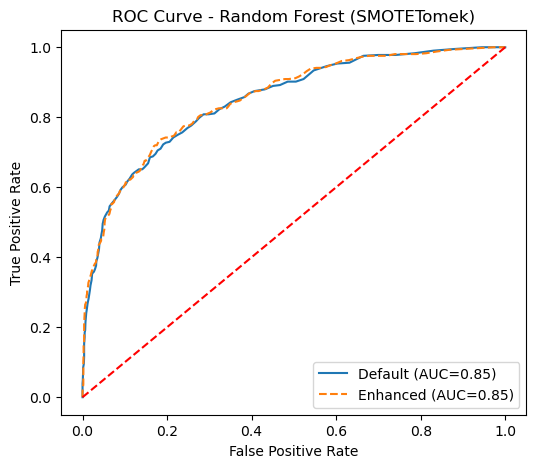


========== Processing AdaBoost ==========
Default Accuracy: 0.7930
Default ROC-AUC: 0.8494
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7830
Enhanced ROC-AUC: 0.8493
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



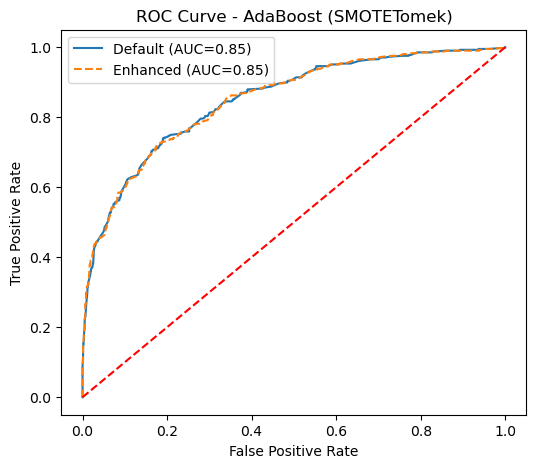


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8560
Default ROC-AUC: 0.8631
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50

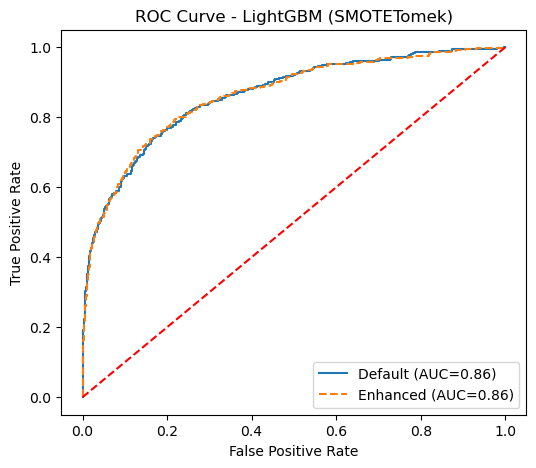


========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8405
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6505
Enhanced ROC-AUC: 0.8613
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73      1593
           1       0.36      0.90      0.51       407

    accuracy                           0.65      2000
   macro avg       0.66      0.74      0.62      2000
weighted avg       0.83      0.65      0.68      2000



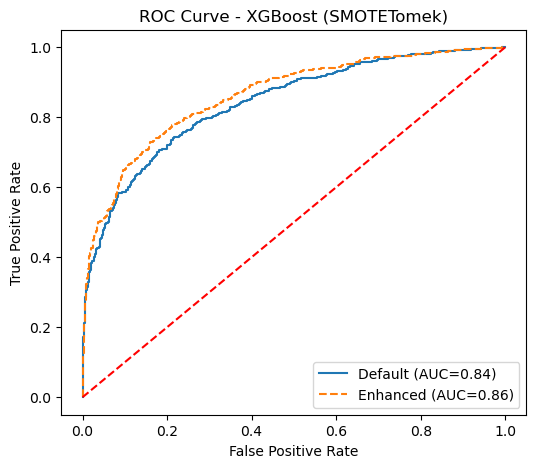


========== Processing Logistic Regression ==========
Default Accuracy: 0.7175
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7150
Enhanced ROC-AUC: 0.7766
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



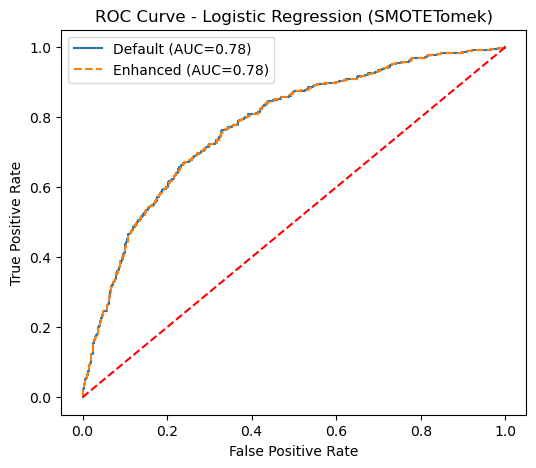


========== Processing KNN ==========
Default Accuracy: 0.7250
Default ROC-AUC: 0.7574
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7445
Enhanced ROC-AUC: 0.7376
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.48       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



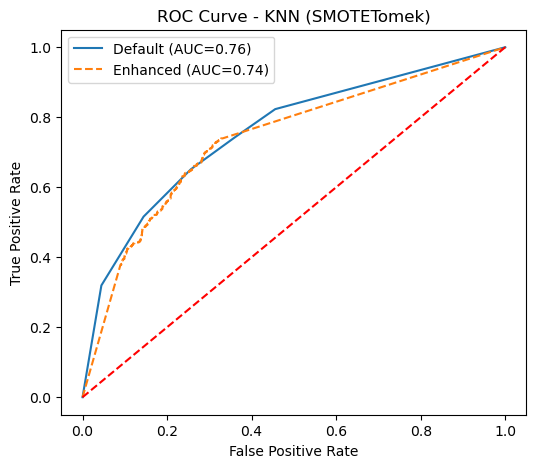

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, accuracy_score, roc_auc_score, 
                             roc_curve, make_scorer, fbeta_score)

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

X = data.drop('Exited', axis=1)
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Original Class Distribution:", Counter(y_train))

# --- Try Different Sampling Strategies ---
samplers = {
    "RandomOversampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

f2_scorer = make_scorer(fbeta_score, beta=2)

# --- Define Models and Parameter Grids ---
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, None], 'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.5, 1.0]
    }),
    "LightGBM": (lgb.LGBMClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 33, 45]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))), {
        'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7], 'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 0.9], 'gamma': [0, 0.1],
        'reg_alpha': [0, 0.01], 'reg_lambda': [1, 2]
    }),
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'), {
        'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan vs Euclidean
    })
}

# --- Training with Each Sampler and Model ---
for sampler_name, sampler in samplers.items():
    print(f"\n{'='*20} Using Sampler: {sampler_name} {'='*20}")
    x_train_res, y_train_res = sampler.fit_resample(x_train, y_train)
    print("Resampled Class Distribution:", Counter(y_train_res))
    
    for name, (model, params) in models.items():
        print(f"\n========== Processing {name} ==========")
        
        # --- 1. Default Model ---
        default_model = model
        default_model.fit(x_train_res, y_train_res)
        y_pred_default = default_model.predict(x_test)
        y_pred_proba_default = default_model.predict_proba(x_test)[:, 1]
        
        roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
        print(f"Default Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
        print(f"Default ROC-AUC: {roc_auc_default:.4f}")
        
        # --- 2. Hyperparameter Tuning ---
        if name in ["Random Forest", "XGBoost"]:
            search = RandomizedSearchCV(model, params, n_iter=20, cv=3, scoring=f2_scorer,
                                        n_jobs=-1, random_state=42, verbose=1)
        else:
            search = GridSearchCV(model, params, cv=3, scoring=f2_scorer,
                                  n_jobs=-1, verbose=1)
        
        search.fit(x_train_res, y_train_res)
        
        # --- 3. Enhanced Model ---
        enhanced_model = search.best_estimator_
        y_pred_enhanced = enhanced_model.predict(x_test)
        y_pred_proba_enhanced = enhanced_model.predict_proba(x_test)[:, 1]
        
        roc_auc_enhanced = roc_auc_score(y_test, y_pred_proba_enhanced)
        print(f"Enhanced Accuracy: {accuracy_score(y_test, y_pred_enhanced):.4f}")
        print(f"Enhanced ROC-AUC: {roc_auc_enhanced:.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred_enhanced))
        
        # --- 4. ROC Curve ---
        fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
        fpr_enhanced, tpr_enhanced, _ = roc_curve(y_test, y_pred_proba_enhanced)
        
        plt.figure(figsize=(6, 5))
        plt.plot(fpr_default, tpr_default, label=f'Default (AUC={roc_auc_default:.2f})')
        plt.plot(fpr_enhanced, tpr_enhanced, label=f'Enhanced (AUC={roc_auc_enhanced:.2f})', linestyle='--')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name} ({sampler_name})')
        plt.legend()
        plt.show()

## Applying Different thresholds

Original Class Distribution: Counter({0: 6370, 1: 1630})

==================== Using Sampler: RandomOversampling ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7905
Default ROC-AUC: 0.6764
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7905
Enhanced ROC-AUC: 0.6892
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



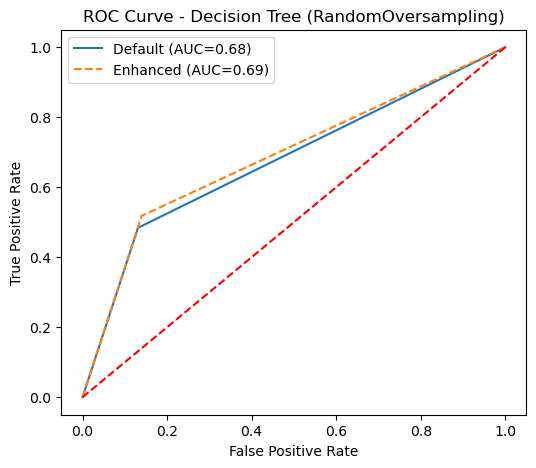


========== Processing Random Forest ==========
Default Accuracy: 0.8500
Default ROC-AUC: 0.8515
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8570
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.54      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



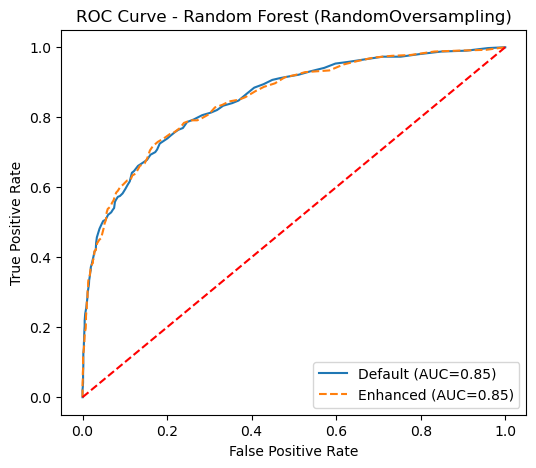


========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8479
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7795
Enhanced ROC-AUC: 0.8514
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



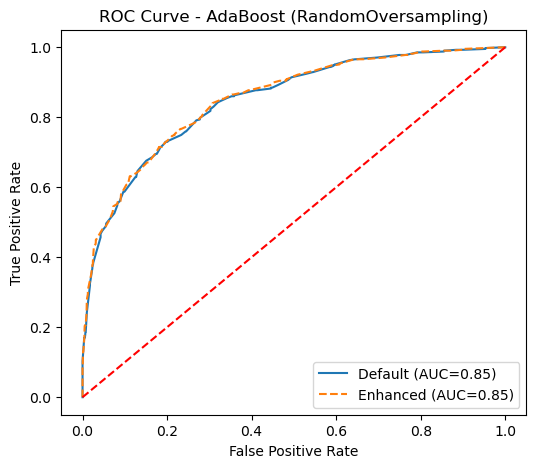


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8240
Default ROC-AUC: 0.8522
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used fea

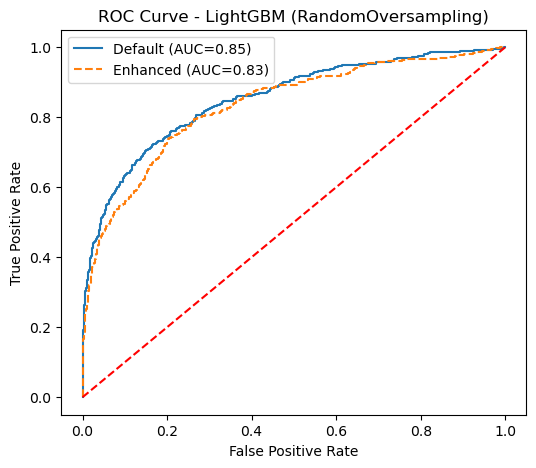


========== Processing XGBoost ==========
Default Accuracy: 0.7800
Default ROC-AUC: 0.8365
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7745
Enhanced ROC-AUC: 0.8403
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



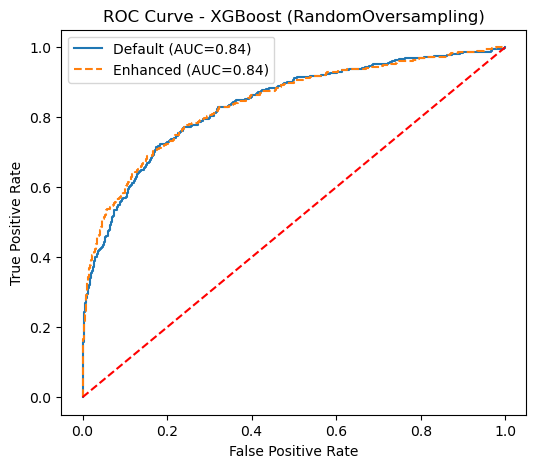


========== Processing Logistic Regression ==========
Default Accuracy: 0.7160
Default ROC-AUC: 0.7781
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7125
Enhanced ROC-AUC: 0.7777
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



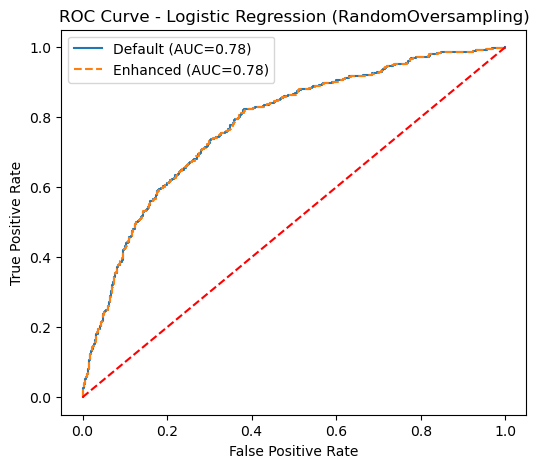


========== Processing KNN ==========
Default Accuracy: 0.7195
Default ROC-AUC: 0.7379
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7230
Enhanced ROC-AUC: 0.7704
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.39      0.67      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.75      2000



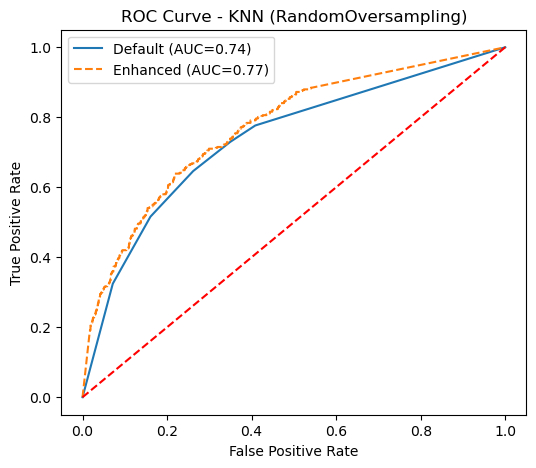


==================== Using Sampler: SMOTE ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7650
Default ROC-AUC: 0.6714
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7715
Enhanced ROC-AUC: 0.6901
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1593
           1       0.45      0.55      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



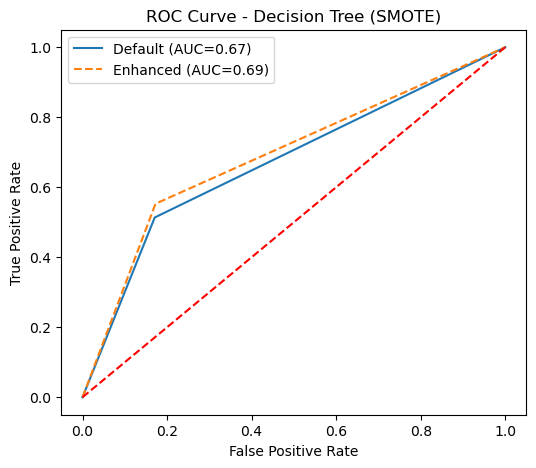


========== Processing Random Forest ==========
Default Accuracy: 0.8420
Default ROC-AUC: 0.8473
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8440
Enhanced ROC-AUC: 0.8520
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.84      0.84      2000



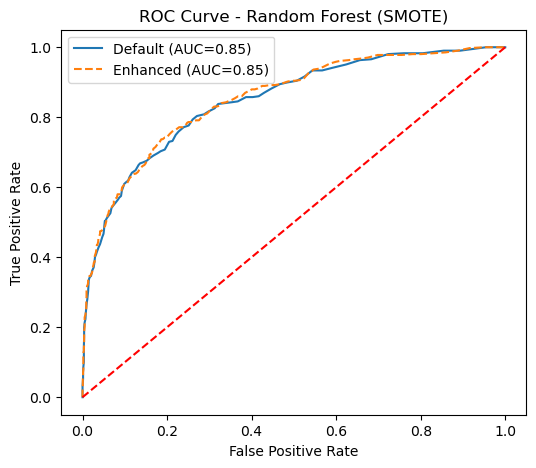


========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8512
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.8035
Enhanced ROC-AUC: 0.8535
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



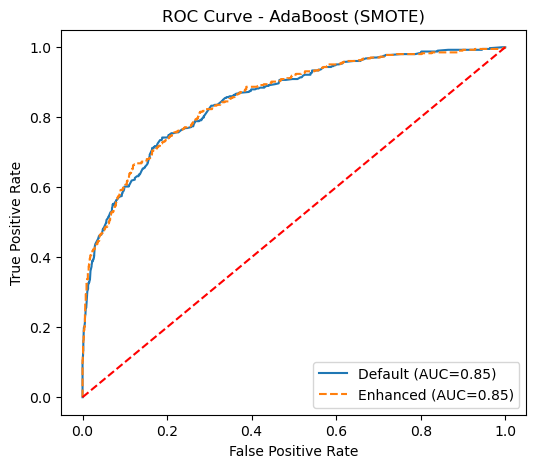


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8570
Default ROC-AUC: 0.8574
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50

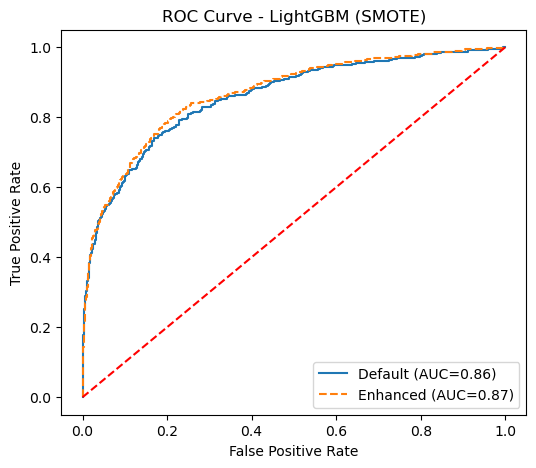


========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8313
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6975
Enhanced ROC-AUC: 0.8570
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1593
           1       0.39      0.83      0.53       407

    accuracy                           0.70      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.70      0.73      2000



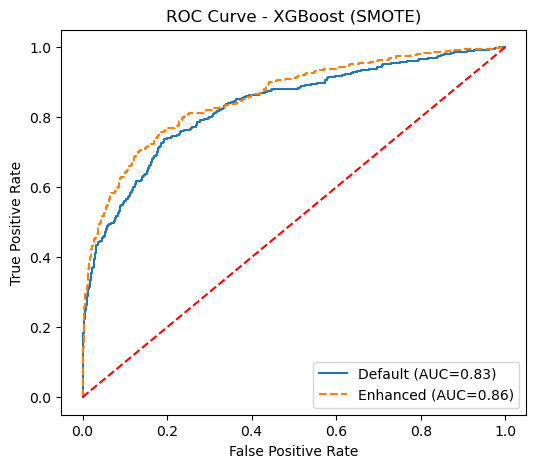


========== Processing Logistic Regression ==========
Default Accuracy: 0.7155
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7140
Enhanced ROC-AUC: 0.7765
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



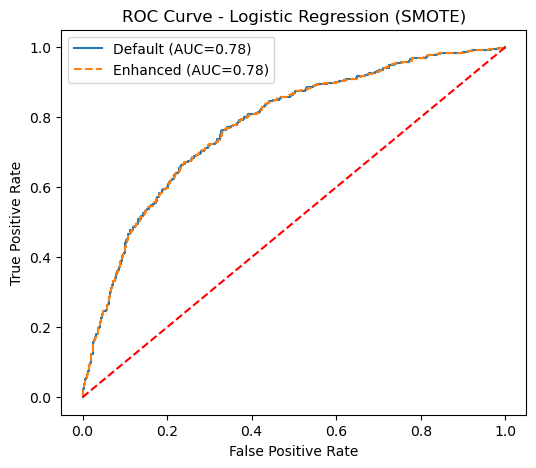


========== Processing KNN ==========
Default Accuracy: 0.7245
Default ROC-AUC: 0.7554
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7450
Enhanced ROC-AUC: 0.7388
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



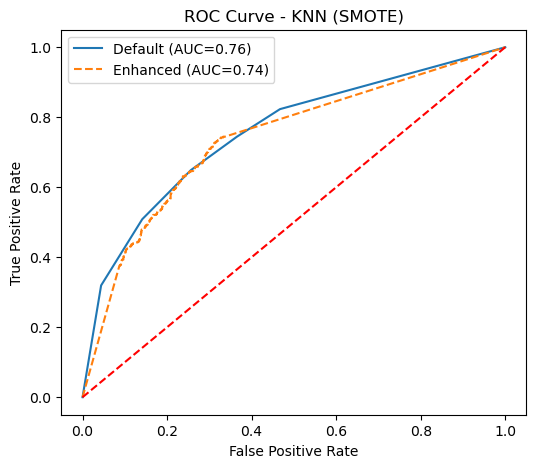


==================== Using Sampler: SMOTEENN ====================
Resampled Class Distribution: Counter({1: 5410, 0: 4203})

========== Processing Decision Tree ==========
Default Accuracy: 0.7685
Default ROC-AUC: 0.7550
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7360
Enhanced ROC-AUC: 0.6989
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1593
           1       0.41      0.64      0.50       407

    accuracy                           0.74      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.74      0.75      2000



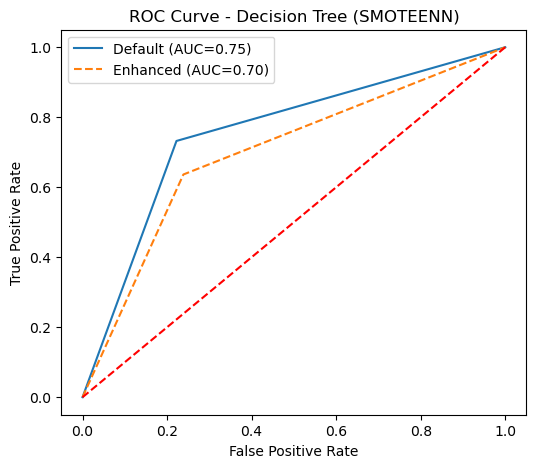


========== Processing Random Forest ==========
Default Accuracy: 0.7990
Default ROC-AUC: 0.8500
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7940
Enhanced ROC-AUC: 0.8510
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.79      0.81      2000



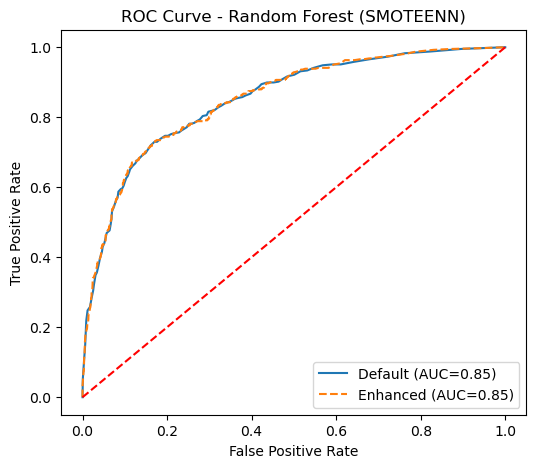


========== Processing AdaBoost ==========
Default Accuracy: 0.7430
Default ROC-AUC: 0.8476
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7585
Enhanced ROC-AUC: 0.8511
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



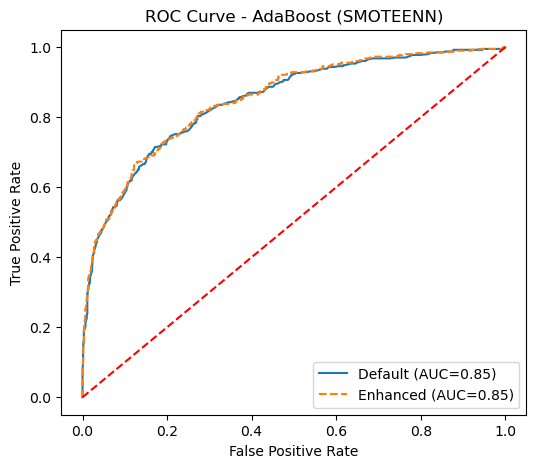


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Default Accuracy: 0.8250
Default ROC-AUC: 0.8587
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11

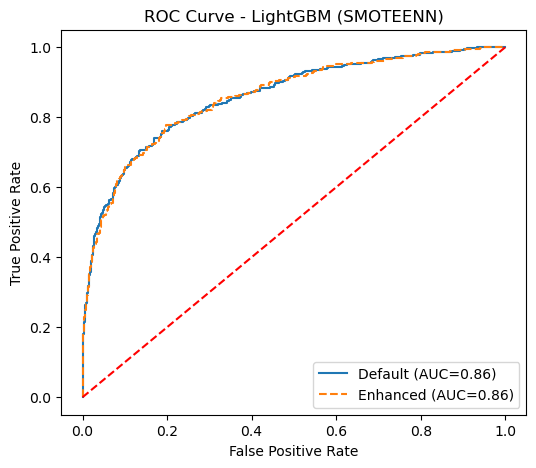


========== Processing XGBoost ==========
Default Accuracy: 0.7865
Default ROC-AUC: 0.8488
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7510
Enhanced ROC-AUC: 0.8575
              precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.81      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



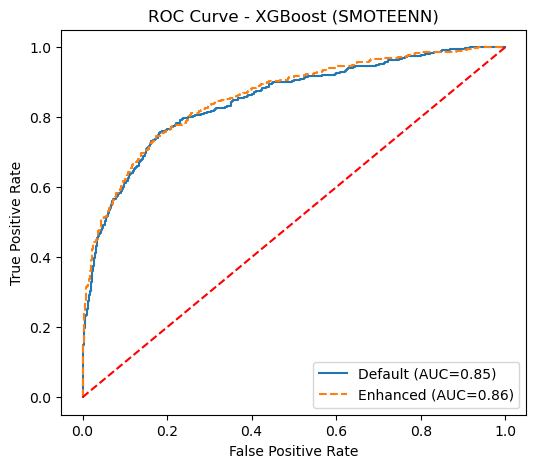


========== Processing Logistic Regression ==========
Default Accuracy: 0.6905
Default ROC-AUC: 0.7704
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.6865
Enhanced ROC-AUC: 0.7694
              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1593
           1       0.36      0.73      0.49       407

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.63      2000
weighted avg       0.80      0.69      0.72      2000



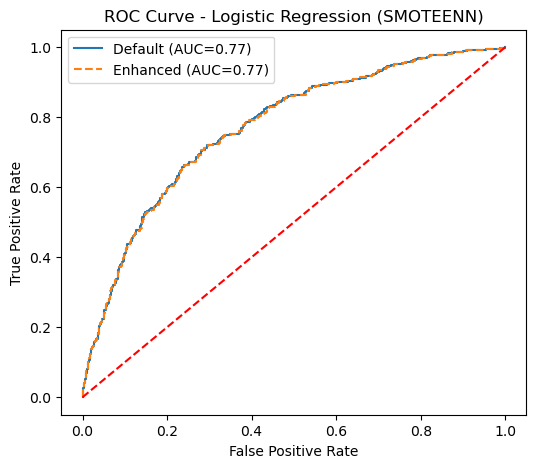


========== Processing KNN ==========
Default Accuracy: 0.6915
Default ROC-AUC: 0.7586
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7025
Enhanced ROC-AUC: 0.7382
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



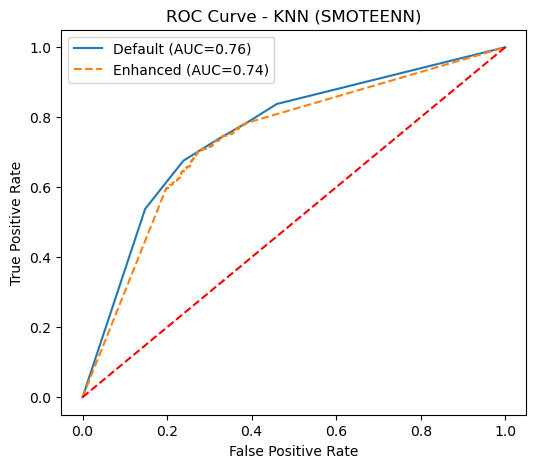


==================== Using Sampler: SMOTETomek ====================
Resampled Class Distribution: Counter({1: 6273, 0: 6273})

========== Processing Decision Tree ==========
Default Accuracy: 0.7710
Default ROC-AUC: 0.6870
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7555
Enhanced ROC-AUC: 0.6847
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1593
           1       0.42      0.55      0.48       407

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.78      0.76      0.77      2000



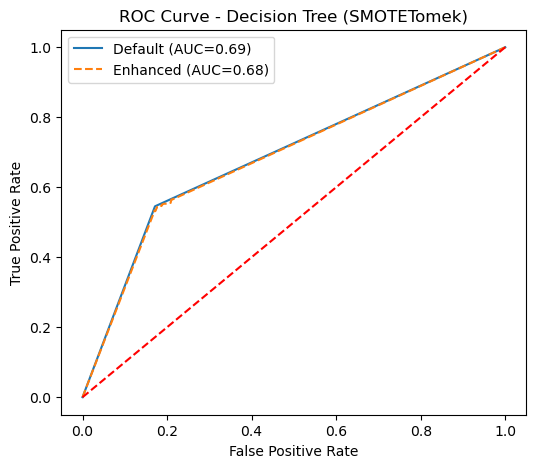


========== Processing Random Forest ==========
Default Accuracy: 0.8390
Default ROC-AUC: 0.8482
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8400
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



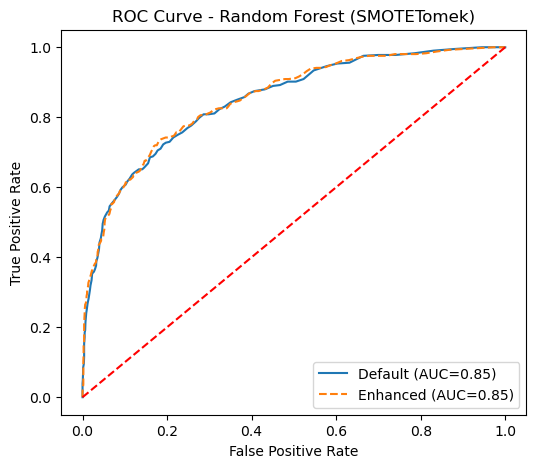


========== Processing AdaBoost ==========
Default Accuracy: 0.7930
Default ROC-AUC: 0.8494
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7830
Enhanced ROC-AUC: 0.8493
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



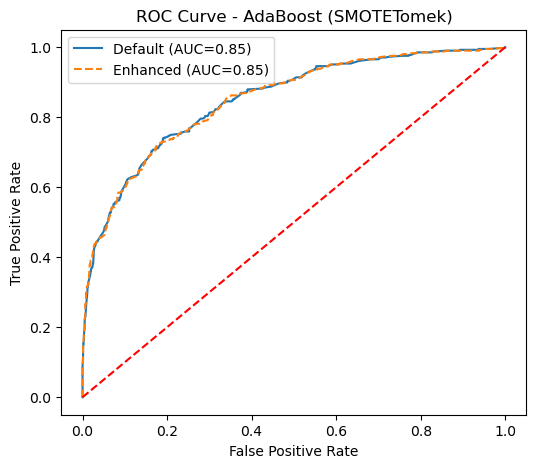


========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8560
Default ROC-AUC: 0.8631
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50

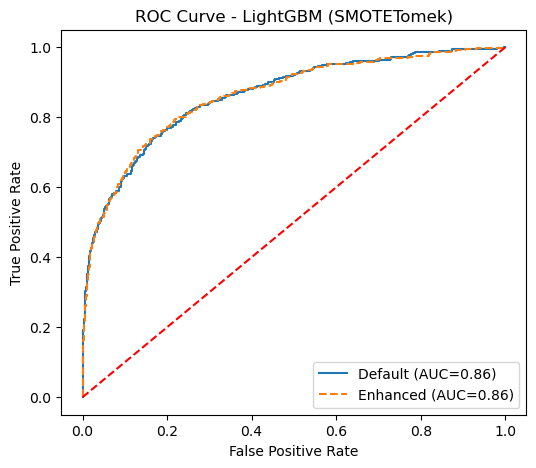


========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8405
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6505
Enhanced ROC-AUC: 0.8613
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1593
           1       0.36      0.90      0.51       407

    accuracy                           0.65      2000
   macro avg       0.66      0.74      0.62      2000
weighted avg       0.83      0.65      0.68      2000



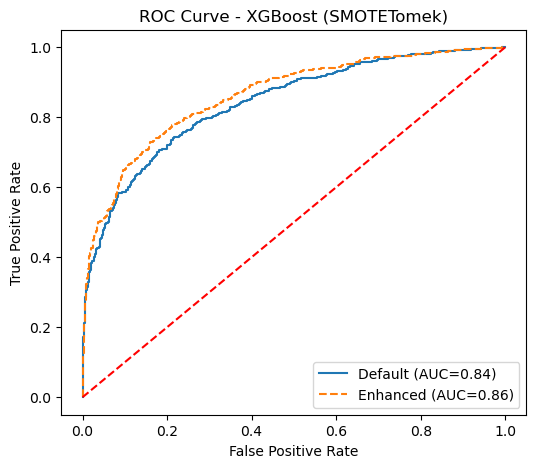


========== Processing Logistic Regression ==========
Default Accuracy: 0.7175
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7150
Enhanced ROC-AUC: 0.7766
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



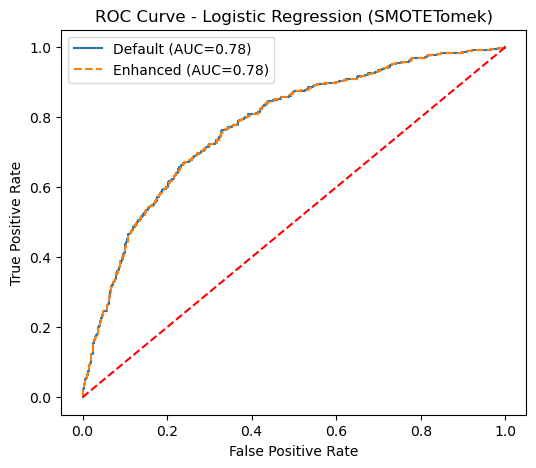


========== Processing KNN ==========
Default Accuracy: 0.7250
Default ROC-AUC: 0.7574
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7445
Enhanced ROC-AUC: 0.7376
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.48       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



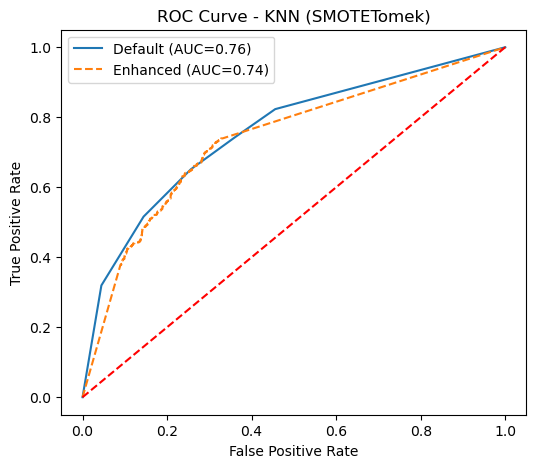


=== Threshold Analysis for Decision Tree_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.486     0.518     0.512     
0.510     0.486     0.518     0.512     
0.525     0.486     0.518     0.512     
0.540     0.486     0.518     0.512     
0.500     0.486     0.518     0.512     
0.490     0.486     0.518     0.512     
0.480     0.486     0.518     0.512     
0.475     0.486     0.518     0.512     
0.460     0.486     0.518     0.512     
0.450     0.486     0.518     0.512     
0.437     0.486     0.518     0.512     
0.425     0.486     0.518     0.512     
0.410     0.486     0.518     0.512     
0.400     0.486     0.518     0.512     
0.375     0.486     0.518     0.512     
0.350     0.486     0.518     0.512     
0.325     0.486     0.518     0.512     
0.300     0.486     0.518     0.512     

=== Threshold Analysis for Random Forest_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.701     0.506     0.536     
0.510    

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, accuracy_score, roc_auc_score,
                             roc_curve, make_scorer, fbeta_score, precision_score, recall_score)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# -------------------- Data Loading --------------------
data = pd.read_csv("Churn_Modelling.csv")
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

X = data.drop('Exited', axis=1)
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Original Class Distribution:", Counter(y_train))

# -------------------- Samplers --------------------
samplers = {
    "RandomOversampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# -------------------- Scorer --------------------
f2_scorer = make_scorer(fbeta_score, beta=2)

# -------------------- Models & Hyperparameters --------------------
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, None], 'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.5, 1.0]
    }),
    "LightGBM": (lgb.LGBMClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200, 400], 'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 33, 45]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))), {
        'n_estimators': [100, 200], 'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7], 'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 0.9], 'gamma': [0, 0.1],
        'reg_alpha': [0, 0.01], 'reg_lambda': [1, 2]
    }),
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'), {
        'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]
    })
}

# -------------------- Train & Tune Models --------------------
tuned_models_all = {}  # to store all best models

for sampler_name, sampler in samplers.items():
    print(f"\n{'='*20} Using Sampler: {sampler_name} {'='*20}")
    x_train_res, y_train_res = sampler.fit_resample(x_train, y_train)
    print("Resampled Class Distribution:", Counter(y_train_res))
    
    for name, (model, params) in models.items():
        print(f"\n========== Processing {name} ==========")
        
        # --- Default Model ---
        default_model = model
        default_model.fit(x_train_res, y_train_res)
        y_pred_default = default_model.predict(x_test)
        y_pred_proba_default = default_model.predict_proba(x_test)[:, 1]
        print(f"Default Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
        print(f"Default ROC-AUC: {roc_auc_score(y_test, y_pred_proba_default):.4f}")
        
        # --- Hyperparameter Tuning ---
        if name in ["Random Forest", "XGBoost"]:
            search = RandomizedSearchCV(model, params, n_iter=20, cv=3, scoring=f2_scorer,
                                        n_jobs=-1, random_state=42, verbose=1)
        else:
            search = GridSearchCV(model, params, cv=3, scoring=f2_scorer,
                                  n_jobs=-1, verbose=1)
        search.fit(x_train_res, y_train_res)
        
        enhanced_model = search.best_estimator_
        tuned_models_all[f"{name}_{sampler_name}"] = enhanced_model  # save model
        
        y_pred_enhanced = enhanced_model.predict(x_test)
        y_pred_proba_enhanced = enhanced_model.predict_proba(x_test)[:, 1]
        print(f"Enhanced Accuracy: {accuracy_score(y_test, y_pred_enhanced):.4f}")
        print(f"Enhanced ROC-AUC: {roc_auc_score(y_test, y_pred_proba_enhanced):.4f}")
        print(classification_report(y_test, y_pred_enhanced))
        
        # --- ROC Curve ---
        fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
        fpr_enhanced, tpr_enhanced, _ = roc_curve(y_test, y_pred_proba_enhanced)
        plt.figure(figsize=(6,5))
        plt.plot(fpr_default, tpr_default, label=f'Default (AUC={roc_auc_score(y_test, y_pred_proba_default):.2f})')
        plt.plot(fpr_enhanced, tpr_enhanced, label=f'Enhanced (AUC={roc_auc_score(y_test, y_pred_proba_enhanced):.2f})', linestyle='--')
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name} ({sampler_name})')
        plt.legend()
        plt.show()

# -------------------- Threshold Analysis --------------------
from sklearn.metrics import precision_score, recall_score

thresholds = [0.55,0.51,0.525,0.54,0.5,0.49,0.48,0.475,0.46,0.45, 
              0.437,0.425,0.41,0.4,0.375,0.35,0.325,0.3]

for model_name, model in tuned_models_all.items():
    print(f"\n=== Threshold Analysis for {model_name} ===")
    y_probs = model.predict_proba(x_test)[:, 1]
    print(f"{'Threshold':<10}{'Precision':<10}{'Recall':<10}{'F2-Score':<10}")
    for thresh in thresholds:
        y_pred_thresh = (y_probs >= thresh).astype(int)
        precision = precision_score(y_test, y_pred_thresh)
        recall = recall_score(y_test, y_pred_thresh)
        f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
        print(f"{thresh:<10.3f}{precision:<10.3f}{recall:<10.3f}{f2:<10.3f}")


In [262]:
output_text='''

[========== Processing XGBoost ==========

Overall ROC-AUC Score: 0.8689

--- Results for Threshold: 0.55 ---
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.66      0.62      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.62      0.65      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.63      0.64      0.63       393

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.65      0.63      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.62      0.66      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8525
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.61      0.67      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.8520
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.69      0.65       393

    accuracy                           0.85      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.8510
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.60      0.70      0.65       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.78      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.8470
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1607
           1       0.59      0.72      0.65       393

    accuracy                           0.85      2000
   macro avg       0.76      0.80      0.78      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.8425
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1607
           1       0.58      0.73      0.64       393

    accuracy                           0.84      2000
   macro avg       0.75      0.80      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.8405
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1607
           1       0.57      0.74      0.65       393

    accuracy                           0.84      2000
   macro avg       0.75      0.80      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.8330
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1607
           1       0.56      0.75      0.64       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.8245
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      1607
           1       0.54      0.76      0.63       393

    accuracy                           0.82      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.82      0.83      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.8195
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1607
           1       0.53      0.77      0.63       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.86      0.82      0.83      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.79      0.62       393

    accuracy                           0.81      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.81      0.82      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.7905
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.80      0.60       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.7735
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1607
           1       0.46      0.81      0.59       393

    accuracy                           0.77      2000
   macro avg       0.70      0.79      0.71      2000
weighted avg       0.85      0.77      0.79      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.7495
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1607
           1       0.43      0.83      0.57       393

    accuracy                           0.75      2000
   macro avg       0.69      0.78      0.69      2000
weighted avg       0.84      0.75      0.77      2000


==================================================

========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 3813, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374963 -> initscore=-0.510983
[LightGBM] [Info] Start training from score -0.510983

Overall ROC-AUC Score: 0.8708

--- Results for Threshold: 0.55 ---
Accuracy: 0.8560
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.60      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8540
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.62      0.64      0.63       393

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8560
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.64      0.63      0.63       393

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.64      0.61      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8545
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.62      0.66      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.78      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.68      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.8475
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.68      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.8465
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.69      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.8415
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.69      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.85      0.84      0.85      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.8410
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1607
           1       0.58      0.71      0.64       393

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.8355
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.72      0.63       393

    accuracy                           0.84      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.84      0.84      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.8340
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.8290
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1607
           1       0.55      0.74      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.8230
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.54      0.74      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.8120
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88      1607
           1       0.51      0.76      0.61       393

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.75      2000
weighted avg       0.85      0.81      0.82      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.8010
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.78      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.82      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.7825
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.81      0.59       393

    accuracy                           0.78      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.78      0.80      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.7645
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1607
           1       0.45      0.82      0.58       393

    accuracy                           0.76      2000
   macro avg       0.70      0.79      0.71      2000
weighted avg       0.85      0.76      0.79      2000


==================================================

========== Processing AdaBoost ==========

Overall ROC-AUC Score: 0.8564

--- Results for Threshold: 0.55 ---
Accuracy: 0.8595
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8405
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.63      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.85      0.84      0.84      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8605
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.56      0.66      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.84      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8140
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.71      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.7980
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1607
           1       0.49      0.79      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.80      0.81      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.7850
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.80      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.79      0.80      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.7195
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1607
           1       0.40      0.85      0.55       393

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.67      2000
weighted avg       0.84      0.72      0.75      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.6730
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      1607
           1       0.36      0.88      0.51       393

    accuracy                           0.67      2000
   macro avg       0.66      0.75      0.63      2000
weighted avg       0.84      0.67      0.71      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.6265
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      1607
           1       0.33      0.89      0.48       393

    accuracy                           0.63      2000
   macro avg       0.64      0.73      0.60      2000
weighted avg       0.83      0.63      0.66      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.5655
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1607
           1       0.30      0.92      0.46       393

    accuracy                           0.57      2000
   macro avg       0.63      0.70      0.55      2000
weighted avg       0.83      0.57      0.60      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.4940
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55      1607
           1       0.27      0.94      0.42       393

    accuracy                           0.49      2000
   macro avg       0.62      0.66      0.49      2000
weighted avg       0.83      0.49      0.52      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.4335
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.30      0.46      1607
           1       0.25      0.96      0.40       393

    accuracy                           0.43      2000
   macro avg       0.61      0.63      0.43      2000
weighted avg       0.83      0.43      0.45      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.2970
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.13      0.23      1607
           1       0.22      0.98      0.36       393

    accuracy                           0.30      2000
   macro avg       0.59      0.56      0.29      2000
weighted avg       0.82      0.30      0.25      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.2350
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.05      0.09      1607
           1       0.20      0.99      0.34       393

    accuracy                           0.23      2000
   macro avg       0.59      0.52      0.22      2000
weighted avg       0.82      0.23      0.14      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.1965
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.1965
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000


==================================================]


[Original Class Distribution: Counter({0: 6370, 1: 1630})

==================== Using Sampler: RandomOversampling ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7905
Default ROC-AUC: 0.6764
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7905
Enhanced ROC-AUC: 0.6892
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8500
Default ROC-AUC: 0.8515
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8570
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.54      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8479
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7795
Enhanced ROC-AUC: 0.8514
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8240
Default ROC-AUC: 0.8522
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8355
Enhanced ROC-AUC: 0.8336
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.61      0.55      0.57       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7800
Default ROC-AUC: 0.8365
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7745
Enhanced ROC-AUC: 0.8403
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7160
Default ROC-AUC: 0.7781
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7125
Enhanced ROC-AUC: 0.7777
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7195
Default ROC-AUC: 0.7379
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7230
Enhanced ROC-AUC: 0.7704
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.39      0.67      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.75      2000



==================== Using Sampler: SMOTE ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7650
Default ROC-AUC: 0.6714
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7715
Enhanced ROC-AUC: 0.6901
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1593
           1       0.45      0.55      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8420
Default ROC-AUC: 0.8473
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8440
Enhanced ROC-AUC: 0.8520
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.84      0.84      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8512
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.8035
Enhanced ROC-AUC: 0.8535
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8570
Default ROC-AUC: 0.8574
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8540
Enhanced ROC-AUC: 0.8666
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.66      0.59      0.62       407

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8313
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6975
Enhanced ROC-AUC: 0.8570
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1593
           1       0.39      0.83      0.53       407

    accuracy                           0.70      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.70      0.73      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7155
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7140
Enhanced ROC-AUC: 0.7765
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7245
Default ROC-AUC: 0.7554
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7450
Enhanced ROC-AUC: 0.7388
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



==================== Using Sampler: SMOTEENN ====================
Resampled Class Distribution: Counter({1: 5410, 0: 4203})

========== Processing Decision Tree ==========
Default Accuracy: 0.7685
Default ROC-AUC: 0.7550
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7360
Enhanced ROC-AUC: 0.6989
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1593
           1       0.41      0.64      0.50       407

    accuracy                           0.74      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.74      0.75      2000



========== Processing Random Forest ==========
Default Accuracy: 0.7990
Default ROC-AUC: 0.8500
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7940
Enhanced ROC-AUC: 0.8510
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.79      0.81      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7430
Default ROC-AUC: 0.8476
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7585
Enhanced ROC-AUC: 0.8511
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Default Accuracy: 0.8250
Default ROC-AUC: 0.8587
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Enhanced Accuracy: 0.8200
Enhanced ROC-AUC: 0.8584
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.71      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7865
Default ROC-AUC: 0.8488
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7510
Enhanced ROC-AUC: 0.8575
              precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.81      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.6905
Default ROC-AUC: 0.7704
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.6865
Enhanced ROC-AUC: 0.7694
              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1593
           1       0.36      0.73      0.49       407

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.63      2000
weighted avg       0.80      0.69      0.72      2000



========== Processing KNN ==========
Default Accuracy: 0.6915
Default ROC-AUC: 0.7586
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7025
Enhanced ROC-AUC: 0.7382
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



==================== Using Sampler: SMOTETomek ====================
Resampled Class Distribution: Counter({1: 6273, 0: 6273})

========== Processing Decision Tree ==========
Default Accuracy: 0.7710
Default ROC-AUC: 0.6870
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7555
Enhanced ROC-AUC: 0.6847
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1593
           1       0.42      0.55      0.48       407

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.78      0.76      0.77      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8390
Default ROC-AUC: 0.8482
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8400
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7930
Default ROC-AUC: 0.8494
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7830
Enhanced ROC-AUC: 0.8493
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8560
Default ROC-AUC: 0.8631
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8525
Enhanced ROC-AUC: 0.8627
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.65      0.58      0.62       407

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8405
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6505
Enhanced ROC-AUC: 0.8613
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1593
           1       0.36      0.90      0.51       407

    accuracy                           0.65      2000
   macro avg       0.66      0.74      0.62      2000
weighted avg       0.83      0.65      0.68      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7175
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7150
Enhanced ROC-AUC: 0.7766
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7250
Default ROC-AUC: 0.7574
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7445
Enhanced ROC-AUC: 0.7376
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.48       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



=== Threshold Analysis for Decision Tree_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.486     0.518     0.512     
0.510     0.486     0.518     0.512     
0.525     0.486     0.518     0.512     
0.540     0.486     0.518     0.512     
0.500     0.486     0.518     0.512     
0.490     0.486     0.518     0.512     
0.480     0.486     0.518     0.512     
0.475     0.486     0.518     0.512     
0.460     0.486     0.518     0.512     
0.450     0.486     0.518     0.512     
0.437     0.486     0.518     0.512     
0.425     0.486     0.518     0.512     
0.410     0.486     0.518     0.512     
0.400     0.486     0.518     0.512     
0.375     0.486     0.518     0.512     
0.350     0.486     0.518     0.512     
0.325     0.486     0.518     0.512     
0.300     0.486     0.518     0.512     

=== Threshold Analysis for Random Forest_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.701     0.506     0.536     
0.510     0.690     0.541     0.565     
0.525     0.703     0.528     0.556     
0.540     0.702     0.521     0.549     
0.500     0.677     0.545     0.567     
0.490     0.671     0.555     0.575     
0.480     0.662     0.563     0.580     
0.475     0.662     0.563     0.580     
0.460     0.652     0.585     0.597     
0.450     0.643     0.590     0.600     
0.437     0.631     0.602     0.608     
0.425     0.619     0.607     0.609     
0.410     0.583     0.622     0.613     
0.400     0.578     0.634     0.622     
0.375     0.561     0.649     0.629     
0.350     0.533     0.683     0.647     
0.325     0.524     0.717     0.668     
0.300     0.493     0.742     0.674     

=== Threshold Analysis for AdaBoost_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.632     0.558     0.571     
0.510     0.492     0.720     0.659     
0.525     0.529     0.671     0.637     
0.540     0.615     0.560     0.570     
0.500     0.474     0.747     0.670     
0.490     0.426     0.791     0.675     
0.480     0.399     0.853     0.695     
0.475     0.395     0.853     0.692     
0.460     0.362     0.877     0.683     
0.450     0.324     0.909     0.668     
0.437     0.290     0.948     0.652     
0.425     0.286     0.951     0.649     
0.410     0.244     0.978     0.610     
0.400     0.239     0.988     0.607     
0.375     0.220     0.995     0.584     
0.350     0.211     0.998     0.571     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.630     0.531     0.548     
0.510     0.615     0.545     0.558     
0.525     0.619     0.538     0.552     
0.540     0.629     0.538     0.554     
0.500     0.607     0.545     0.557     
0.490     0.597     0.550     0.559     
0.480     0.587     0.553     0.559     
0.475     0.587     0.558     0.563     
0.460     0.582     0.565     0.568     
0.450     0.579     0.568     0.570     
0.437     0.569     0.568     0.568     
0.425     0.564     0.575     0.573     
0.410     0.556     0.585     0.579     
0.400     0.552     0.590     0.582     
0.375     0.538     0.602     0.588     
0.350     0.528     0.617     0.597     
0.325     0.519     0.624     0.600     
0.300     0.518     0.644     0.614     

=== Threshold Analysis for XGBoost_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.497     0.715     0.657     
0.510     0.470     0.732     0.659     
0.525     0.479     0.722     0.656     
0.540     0.487     0.717     0.655     
0.500     0.466     0.742     0.663     
0.490     0.464     0.749     0.667     
0.480     0.457     0.749     0.664     
0.475     0.458     0.757     0.669     
0.460     0.452     0.767     0.673     
0.450     0.448     0.771     0.674     
0.437     0.440     0.781     0.677     
0.425     0.433     0.784     0.675     
0.410     0.424     0.786     0.671     
0.400     0.420     0.791     0.673     
0.375     0.410     0.799     0.671     
0.350     0.400     0.808     0.671     
0.325     0.394     0.828     0.679     
0.300     0.380     0.830     0.671     

=== Threshold Analysis for Logistic Regression_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.420     0.631     0.574     
0.510     0.391     0.693     0.600     
0.525     0.399     0.668     0.589     
0.540     0.412     0.646     0.580     
0.500     0.387     0.710     0.609     
0.490     0.383     0.735     0.621     
0.480     0.372     0.744     0.620     
0.475     0.371     0.754     0.625     
0.460     0.359     0.767     0.625     
0.450     0.357     0.786     0.634     
0.437     0.353     0.818     0.647     
0.425     0.341     0.828     0.644     
0.410     0.328     0.838     0.639     
0.400     0.320     0.845     0.637     
0.375     0.307     0.865     0.635     
0.350     0.291     0.889     0.630     
0.325     0.277     0.904     0.622     
0.300     0.265     0.919     0.616     

=== Threshold Analysis for KNN_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.425     0.627     0.572     
0.510     0.400     0.663     0.586     
0.525     0.409     0.654     0.584     
0.540     0.419     0.639     0.578     
0.500     0.394     0.668     0.586     
0.490     0.389     0.668     0.584     
0.480     0.388     0.681     0.592     
0.475     0.385     0.683     0.591     
0.460     0.382     0.695     0.597     
0.450     0.378     0.703     0.600     
0.437     0.376     0.710     0.603     
0.425     0.369     0.710     0.599     
0.410     0.360     0.715     0.597     
0.400     0.356     0.722     0.599     
0.375     0.349     0.740     0.604     
0.350     0.345     0.757     0.611     
0.325     0.344     0.771     0.618     
0.300     0.337     0.791     0.623     

=== Threshold Analysis for Decision Tree_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.450     0.553     0.529     
0.510     0.450     0.553     0.529     
0.525     0.450     0.553     0.529     
0.540     0.450     0.553     0.529     
0.500     0.450     0.553     0.529     
0.490     0.450     0.553     0.529     
0.480     0.450     0.553     0.529     
0.475     0.450     0.553     0.529     
0.460     0.450     0.553     0.529     
0.450     0.450     0.553     0.529     
0.437     0.450     0.553     0.529     
0.425     0.450     0.553     0.529     
0.410     0.450     0.553     0.529     
0.400     0.450     0.553     0.529     
0.375     0.450     0.553     0.529     
0.350     0.450     0.553     0.529     
0.325     0.450     0.553     0.529     
0.300     0.450     0.553     0.529     

=== Threshold Analysis for Random Forest_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.658     0.568     0.584     
0.510     0.620     0.590     0.596     
0.525     0.631     0.580     0.589     
0.540     0.643     0.570     0.583     
0.500     0.611     0.607     0.608     
0.490     0.600     0.609     0.608     
0.480     0.591     0.624     0.617     
0.475     0.586     0.629     0.620     
0.460     0.564     0.639     0.622     
0.450     0.556     0.644     0.624     
0.437     0.552     0.654     0.630     
0.425     0.533     0.668     0.636     
0.410     0.525     0.683     0.644     
0.400     0.524     0.695     0.653     
0.375     0.510     0.722     0.667     
0.350     0.493     0.742     0.674     
0.325     0.463     0.771     0.681     
0.300     0.445     0.786     0.682     

=== Threshold Analysis for AdaBoost_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.851     0.405     0.453     
0.510     0.573     0.668     0.647     
0.525     0.641     0.558     0.573     
0.540     0.740     0.455     0.493     
0.500     0.512     0.705     0.656     
0.490     0.457     0.762     0.672     
0.480     0.408     0.823     0.684     
0.475     0.386     0.853     0.686     
0.460     0.325     0.912     0.670     
0.450     0.299     0.939     0.657     
0.437     0.269     0.968     0.638     
0.425     0.247     0.980     0.615     
0.410     0.227     0.985     0.591     
0.400     0.217     0.993     0.579     
0.375     0.204     0.995     0.560     
0.350     0.203     1.000     0.561     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.690     0.563     0.584     
0.510     0.667     0.590     0.604     
0.525     0.678     0.575     0.593     
0.540     0.688     0.570     0.590     
0.500     0.657     0.592     0.604     
0.490     0.649     0.604     0.613     
0.480     0.643     0.619     0.624     
0.475     0.639     0.622     0.625     
0.460     0.626     0.629     0.628     
0.450     0.613     0.639     0.634     
0.437     0.602     0.651     0.641     
0.425     0.599     0.661     0.648     
0.410     0.591     0.678     0.659     
0.400     0.576     0.688     0.662     
0.375     0.559     0.715     0.677     
0.350     0.539     0.737     0.686     
0.325     0.518     0.767     0.700     
0.300     0.498     0.789     0.706     

=== Threshold Analysis for XGBoost_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.420     0.813     0.685     
0.510     0.393     0.826     0.677     
0.525     0.404     0.826     0.683     
0.540     0.411     0.821     0.684     
0.500     0.387     0.833     0.677     
0.490     0.379     0.835     0.674     
0.480     0.371     0.840     0.671     
0.475     0.368     0.840     0.668     
0.460     0.364     0.853     0.672     
0.450     0.357     0.857     0.670     
0.437     0.352     0.867     0.671     
0.425     0.346     0.867     0.667     
0.410     0.341     0.880     0.668     
0.400     0.341     0.899     0.677     
0.375     0.331     0.907     0.673     
0.350     0.320     0.909     0.664     
0.325     0.309     0.924     0.661     
0.300     0.300     0.934     0.657     

=== Threshold Analysis for Logistic Regression_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.425     0.629     0.574     
0.510     0.396     0.690     0.601     
0.525     0.406     0.676     0.596     
0.540     0.418     0.646     0.583     
0.500     0.388     0.703     0.605     
0.490     0.383     0.715     0.609     
0.480     0.374     0.725     0.610     
0.475     0.372     0.727     0.611     
0.460     0.368     0.767     0.630     
0.450     0.359     0.774     0.629     
0.437     0.350     0.786     0.629     
0.425     0.342     0.808     0.635     
0.410     0.333     0.828     0.638     
0.400     0.329     0.840     0.641     
0.375     0.312     0.857     0.635     
0.350     0.296     0.882     0.632     
0.325     0.283     0.897     0.625     
0.300     0.270     0.909     0.617     

=== Threshold Analysis for KNN_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.415     0.582     0.539     
0.510     0.413     0.592     0.545     
0.525     0.414     0.592     0.545     
0.540     0.414     0.587     0.542     
0.500     0.412     0.592     0.545     
0.490     0.410     0.595     0.546     
0.480     0.409     0.595     0.545     
0.475     0.409     0.595     0.545     
0.460     0.410     0.597     0.547     
0.450     0.410     0.597     0.547     
0.437     0.409     0.597     0.547     
0.425     0.408     0.597     0.547     
0.410     0.409     0.600     0.549     
0.400     0.410     0.602     0.550     
0.375     0.408     0.604     0.551     
0.350     0.407     0.614     0.557     
0.325     0.394     0.641     0.570     
0.300     0.377     0.683     0.587     

=== Threshold Analysis for Decision Tree_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.405     0.636     0.571     
0.510     0.405     0.636     0.571     
0.525     0.405     0.636     0.571     
0.540     0.405     0.636     0.571     
0.500     0.405     0.636     0.571     
0.490     0.405     0.636     0.571     
0.480     0.405     0.636     0.571     
0.475     0.405     0.636     0.571     
0.460     0.405     0.636     0.571     
0.450     0.405     0.636     0.571     
0.437     0.405     0.636     0.571     
0.425     0.405     0.636     0.571     
0.410     0.405     0.636     0.571     
0.400     0.405     0.636     0.571     
0.375     0.405     0.636     0.571     
0.350     0.405     0.636     0.571     
0.325     0.405     0.636     0.571     
0.300     0.405     0.636     0.571     

=== Threshold Analysis for Random Forest_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.528     0.717     0.669     
0.510     0.503     0.740     0.676     
0.525     0.509     0.735     0.675     
0.540     0.524     0.727     0.675     
0.500     0.493     0.744     0.676     
0.490     0.490     0.744     0.675     
0.480     0.479     0.747     0.672     
0.475     0.478     0.749     0.673     
0.460     0.466     0.757     0.673     
0.450     0.459     0.762     0.673     
0.437     0.454     0.771     0.677     
0.425     0.445     0.774     0.674     
0.410     0.439     0.781     0.676     
0.400     0.430     0.786     0.674     
0.375     0.418     0.789     0.670     
0.350     0.406     0.794     0.667     
0.325     0.403     0.823     0.681     
0.300     0.392     0.840     0.684     

=== Threshold Analysis for AdaBoost_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.675     0.511     0.537     
0.510     0.488     0.732     0.665     
0.525     0.561     0.673     0.647     
0.540     0.621     0.572     0.582     
0.500     0.446     0.767     0.670     
0.490     0.409     0.830     0.689     
0.480     0.366     0.862     0.678     
0.475     0.346     0.870     0.667     
0.460     0.309     0.931     0.664     
0.450     0.289     0.951     0.652     
0.437     0.267     0.971     0.635     
0.425     0.247     0.980     0.616     
0.410     0.228     0.985     0.592     
0.400     0.221     0.990     0.584     
0.375     0.207     0.995     0.565     
0.350     0.203     1.000     0.561     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.555     0.693     0.660     
0.510     0.543     0.708     0.667     
0.525     0.545     0.700     0.662     
0.540     0.554     0.698     0.663     
0.500     0.544     0.715     0.673     
0.490     0.541     0.715     0.672     
0.480     0.533     0.715     0.669     
0.475     0.530     0.717     0.670     
0.460     0.525     0.725     0.674     
0.450     0.520     0.725     0.672     
0.437     0.517     0.730     0.674     
0.425     0.511     0.730     0.672     
0.410     0.510     0.735     0.675     
0.400     0.509     0.740     0.678     
0.375     0.502     0.754     0.685     
0.350     0.500     0.776     0.699     
0.325     0.487     0.779     0.695     
0.300     0.475     0.784     0.694     

=== Threshold Analysis for XGBoost_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.454     0.784     0.684     
0.510     0.444     0.811     0.696     
0.525     0.447     0.803     0.693     
0.540     0.449     0.791     0.687     
0.500     0.439     0.811     0.694     
0.490     0.437     0.811     0.692     
0.480     0.432     0.813     0.691     
0.475     0.431     0.818     0.694     
0.460     0.427     0.821     0.693     
0.450     0.422     0.823     0.692     
0.437     0.418     0.826     0.691     
0.425     0.418     0.833     0.695     
0.410     0.413     0.835     0.693     
0.400     0.408     0.840     0.693     
0.375     0.403     0.845     0.693     
0.350     0.395     0.850     0.691     
0.325     0.388     0.853     0.688     
0.300     0.379     0.855     0.684     

=== Threshold Analysis for Logistic Regression_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.390     0.686     0.595     
0.510     0.372     0.720     0.607     
0.525     0.385     0.717     0.612     
0.540     0.389     0.695     0.601     
0.500     0.365     0.727     0.607     
0.490     0.365     0.744     0.616     
0.480     0.357     0.749     0.614     
0.475     0.353     0.752     0.613     
0.460     0.343     0.754     0.608     
0.450     0.342     0.769     0.615     
0.437     0.340     0.789     0.624     
0.425     0.332     0.794     0.621     
0.410     0.327     0.806     0.623     
0.400     0.324     0.818     0.627     
0.375     0.317     0.843     0.633     
0.350     0.307     0.860     0.632     
0.325     0.296     0.872     0.628     
0.300     0.287     0.892     0.628     

=== Threshold Analysis for KNN_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.378     0.710     0.604     
0.510     0.378     0.715     0.607     
0.525     0.377     0.713     0.605     
0.540     0.376     0.710     0.603     
0.500     0.378     0.715     0.607     
0.490     0.378     0.715     0.607     
0.480     0.377     0.715     0.607     
0.475     0.377     0.715     0.607     
0.460     0.377     0.715     0.607     
0.450     0.377     0.715     0.606     
0.437     0.377     0.715     0.606     
0.425     0.376     0.715     0.606     
0.410     0.376     0.717     0.607     
0.400     0.376     0.717     0.607     
0.375     0.376     0.717     0.607     
0.350     0.375     0.725     0.611     
0.325     0.367     0.742     0.616     
0.300     0.353     0.752     0.613     

=== Threshold Analysis for Decision Tree_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.423     0.553     0.521     
0.510     0.423     0.553     0.521     
0.525     0.423     0.553     0.521     
0.540     0.423     0.553     0.521     
0.500     0.420     0.553     0.520     
0.490     0.420     0.553     0.520     
0.480     0.420     0.553     0.520     
0.475     0.420     0.553     0.520     
0.460     0.420     0.553     0.520     
0.450     0.420     0.553     0.520     
0.437     0.412     0.553     0.517     
0.425     0.411     0.553     0.517     
0.410     0.411     0.553     0.517     
0.400     0.408     0.555     0.518     
0.375     0.408     0.555     0.518     
0.350     0.408     0.555     0.518     
0.325     0.406     0.555     0.517     
0.300     0.405     0.555     0.517     

=== Threshold Analysis for Random Forest_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.648     0.570     0.584     
0.510     0.608     0.607     0.607     
0.525     0.628     0.590     0.597     
0.540     0.638     0.580     0.591     
0.500     0.605     0.614     0.612     
0.490     0.597     0.622     0.616     
0.480     0.584     0.622     0.614     
0.475     0.577     0.627     0.616     
0.460     0.566     0.634     0.619     
0.450     0.557     0.644     0.624     
0.437     0.550     0.646     0.624     
0.425     0.541     0.666     0.636     
0.410     0.532     0.681     0.644     
0.400     0.526     0.693     0.652     
0.375     0.510     0.725     0.669     
0.350     0.487     0.742     0.672     
0.325     0.466     0.757     0.673     
0.300     0.440     0.776     0.673     

=== Threshold Analysis for AdaBoost_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.669     0.541     0.562     
0.510     0.511     0.705     0.655     
0.525     0.552     0.649     0.627     
0.540     0.630     0.585     0.593     
0.500     0.478     0.732     0.662     
0.490     0.450     0.757     0.666     
0.480     0.402     0.806     0.671     
0.475     0.394     0.830     0.680     
0.460     0.362     0.872     0.680     
0.450     0.332     0.897     0.669     
0.437     0.304     0.934     0.660     
0.425     0.288     0.951     0.651     
0.410     0.266     0.966     0.632     
0.400     0.251     0.975     0.619     
0.375     0.230     0.988     0.596     
0.350     0.211     0.993     0.570     
0.325     0.204     0.998     0.562     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.699     0.553     0.577     
0.510     0.671     0.570     0.588     
0.525     0.680     0.570     0.589     
0.540     0.693     0.560     0.583     
0.500     0.655     0.582     0.595     
0.490     0.654     0.600     0.610     
0.480     0.649     0.600     0.609     
0.475     0.649     0.609     0.617     
0.460     0.631     0.622     0.623     
0.450     0.627     0.639     0.636     
0.437     0.609     0.651     0.642     
0.425     0.602     0.661     0.648     
0.410     0.591     0.673     0.655     
0.400     0.588     0.678     0.658     
0.375     0.573     0.705     0.674     
0.350     0.545     0.722     0.678     
0.325     0.526     0.747     0.689     
0.300     0.498     0.767     0.692     

=== Threshold Analysis for XGBoost_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.372     0.870     0.686     
0.510     0.360     0.892     0.688     
0.525     0.366     0.885     0.689     
0.540     0.370     0.875     0.687     
0.500     0.357     0.897     0.689     
0.490     0.353     0.899     0.687     
0.480     0.349     0.899     0.683     
0.475     0.347     0.904     0.684     
0.460     0.339     0.912     0.682     
0.450     0.336     0.912     0.679     
0.437     0.332     0.914     0.676     
0.425     0.326     0.919     0.674     
0.410     0.320     0.926     0.672     
0.400     0.317     0.929     0.670     
0.375     0.306     0.936     0.663     
0.350     0.295     0.941     0.655     
0.325     0.285     0.941     0.645     
0.300     0.278     0.951     0.641     

=== Threshold Analysis for Logistic Regression_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.428     0.631     0.576     
0.510     0.398     0.693     0.604     
0.525     0.406     0.676     0.597     
0.540     0.420     0.649     0.585     
0.500     0.389     0.703     0.605     
0.490     0.383     0.715     0.610     
0.480     0.374     0.722     0.609     
0.475     0.372     0.727     0.611     
0.460     0.368     0.762     0.627     
0.450     0.361     0.769     0.627     
0.437     0.351     0.784     0.629     
0.425     0.342     0.803     0.633     
0.410     0.333     0.826     0.637     
0.400     0.331     0.840     0.643     
0.375     0.314     0.857     0.637     
0.350     0.297     0.877     0.631     
0.325     0.286     0.897     0.628     
0.300     0.271     0.907     0.617     

=== Threshold Analysis for KNN_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.414     0.580     0.537     
0.510     0.412     0.590     0.543     
0.525     0.413     0.590     0.543     
0.540     0.413     0.585     0.540     
0.500     0.411     0.590     0.542     
0.490     0.409     0.592     0.544     
0.480     0.408     0.592     0.543     
0.475     0.408     0.592     0.543     
0.460     0.409     0.595     0.545     
0.450     0.409     0.595     0.545     
0.437     0.407     0.595     0.545     
0.425     0.407     0.595     0.544     
0.410     0.408     0.597     0.546     
0.400     0.408     0.600     0.548     
0.375     0.407     0.602     0.549     
0.350     0.406     0.612     0.555     
0.325     0.397     0.641     0.571     
0.300     0.380     0.683     0.589  '''


In [264]:
import re
import pandas as pd

def parse_ml_results(output_text):
    """
    Parse ML model results and threshold-based classification reports
    into structured DataFrames
    """
    
    model_performance = []
    threshold_results = []
    
    lines = output_text.strip().split('\n')
    current_model = None
    current_sampler = None
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        # Detect sampler
        if "Using Sampler:" in line:
            match = re.search(r'Using Sampler: ([\w-]+)', line)
            if match:
                current_sampler = match.group(1)
        
        # Detect model
        elif "Processing" in line and "========" in line:
            match = re.search(r'Processing ([^=]+)', line)
            if match:
                current_model = match.group(1).strip()
        
        # ROC-AUC
        elif "ROC-AUC" in line:
            roc_auc = float(re.search(r'[\d.]+', line).group())
            model_performance.append({
                'Model': current_model,
                'Sampler': current_sampler if current_sampler else "Unknown",
                'Metric': 'ROC_AUC',
                'Value': roc_auc
            })
        
        # Threshold results
        elif "Results for Threshold:" in line:
            threshold = float(re.search(r'Threshold: ([\d.]+)', line).group(1))
            
            # Find Accuracy
            accuracy = None
            for j in range(i+1, min(i+6, len(lines))):
                if "Accuracy:" in lines[j]:
                    accuracy = float(re.search(r'[\d.]+', lines[j]).group())
                    break
            
            # Parse classification report
            precision_0 = recall_0 = f1_0 = None
            precision_1 = recall_1 = f1_1 = None
            
            for k in range(i+1, min(i+15, len(lines))):
                if re.match(r'\s*0\s+[\d.]+\s+[\d.]+\s+[\d.]+', lines[k]):
                    parts = lines[k].split()
                    precision_0, recall_0, f1_0 = float(parts[1]), float(parts[2]), float(parts[3])
                elif re.match(r'\s*1\s+[\d.]+\s+[\d.]+\s+[\d.]+', lines[k]):
                    parts = lines[k].split()
                    precision_1, recall_1, f1_1 = float(parts[1]), float(parts[2]), float(parts[3])
            
            threshold_results.append({
                'Model': current_model,
                'Sampler': current_sampler if current_sampler else "Unknown",
                'Threshold': threshold,
                'Accuracy': accuracy,
                'Precision_Class_0': precision_0,
                'Recall_Class_0': recall_0,
                'F1_Class_0': f1_0,
                'Precision_Class_1': precision_1,
                'Recall_Class_1': recall_1,
                'F1_Class_1': f1_1
            })
        
        i += 1
    
    df_perf = pd.DataFrame(model_performance)
    df_thresh = pd.DataFrame(threshold_results)
    
    # Pivot performance summary
    if not df_perf.empty:
        df_perf_pivot = df_perf.pivot_table(
            index=['Model', 'Sampler'],
            columns='Metric',
            values='Value',
            aggfunc='first'
        ).reset_index()
    else:
        df_perf_pivot = pd.DataFrame()
    
    return df_perf, df_thresh, df_perf_pivot


def create_comprehensive_results_df(full_output):
    """
    Wrapper to return all parsed results in one place
    """
    df_perf, df_thresh, df_summary = parse_ml_results(full_output)
    
    # Compute F1 (general) if possible
    if not df_thresh.empty:
        df_thresh['F1_Score'] = 2 * (
            (df_thresh['Precision_Class_1'] * df_thresh['Recall_Class_1']) /
            (df_thresh['Precision_Class_1'] + df_thresh['Recall_Class_1'])
        )
    
    return df_thresh, df_summary


# Example usage
if __name__ == "__main__":
    
    df_all, df_summary = create_comprehensive_results_df(output_text)
    
    print("\n=== Threshold Results ===")
    print(df_all.head(20))
    
    print("\n=== Model Performance Summary ===")
    print(df_summary)



=== Threshold Results ===
       Model  Sampler  Threshold  Accuracy  Precision_Class_0  Recall_Class_0  \
0    XGBoost  Unknown      0.550    0.8615               0.91            0.92   
1    XGBoost  Unknown      0.510    0.8535               0.91            0.90   
2    XGBoost  Unknown      0.525    0.8555               0.91            0.91   
3    XGBoost  Unknown      0.540    0.8615               0.91            0.92   
4    XGBoost  Unknown      0.500    0.8535               0.92            0.90   
5    XGBoost  Unknown      0.490    0.8525               0.92            0.90   
6    XGBoost  Unknown      0.480    0.8520               0.92            0.89   
7    XGBoost  Unknown      0.475    0.8510               0.92            0.89   
8    XGBoost  Unknown      0.460    0.8470               0.93            0.88   
9    XGBoost  Unknown      0.450    0.8425               0.93            0.87   
10   XGBoost  Unknown      0.437    0.8405               0.93            0.87   
1

In [266]:
import re
import pandas as pd

def parse_ml_results(output_text):
    """
    Parse ML model results and threshold-based classification reports
    into structured DataFrames
    """
    
    model_performance = []
    threshold_results = []
    
    lines = output_text.strip().split('\n')
    current_model = None
    current_sampler = None
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        # Detect sampler
        if "Using Sampler:" in line:
            match = re.search(r'Using Sampler: ([\w-]+)', line)
            if match:
                current_sampler = match.group(1)
        
        # Detect model
        elif "Processing" in line and "========" in line:
            match = re.search(r'Processing ([^=]+)', line)
            if match:
                current_model = match.group(1).strip()
        
        # ROC-AUC
        elif "ROC-AUC" in line:
            roc_auc = float(re.search(r'[\d.]+', line).group())
            model_performance.append({
                'Model': current_model,
                'Sampler': current_sampler if current_sampler else "Unknown",
                'Metric': 'ROC_AUC',
                'Value': roc_auc
            })
        
        # Threshold results
        elif "Results for Threshold:" in line:
            threshold = float(re.search(r'Threshold: ([\d.]+)', line).group(1))
            
            # Use the last known sampler
            sampler_name = current_sampler if current_sampler else "Unknown"
            
            # Accuracy
            accuracy = None
            for j in range(i+1, min(i+6, len(lines))):
                if "Accuracy:" in lines[j]:
                    accuracy = float(re.search(r'[\d.]+', lines[j]).group())
                    break
            
            # Classification report
            precision_0 = recall_0 = f1_0 = None
            precision_1 = recall_1 = f1_1 = None
            
            for k in range(i+1, min(i+15, len(lines))):
                if re.match(r'\s*0\s+[\d.]+\s+[\d.]+\s+[\d.]+', lines[k]):
                    parts = lines[k].split()
                    precision_0, recall_0, f1_0 = float(parts[1]), float(parts[2]), float(parts[3])
                elif re.match(r'\s*1\s+[\d.]+\s+[\d.]+\s+[\d.]+', lines[k]):
                    parts = lines[k].split()
                    precision_1, recall_1, f1_1 = float(parts[1]), float(parts[2]), float(parts[3])
            
            threshold_results.append({
                'Model': current_model,
                'Sampler': sampler_name,
                'Threshold': threshold,
                'Accuracy': accuracy,
                'Precision_Class_0': precision_0,
                'Recall_Class_0': recall_0,
                'F1_Class_0': f1_0,
                'Precision_Class_1': precision_1,
                'Recall_Class_1': recall_1,
                'F1_Class_1': f1_1
            })
        
        i += 1
    
    # Convert to DataFrames
    df_perf = pd.DataFrame(model_performance)
    df_thresh = pd.DataFrame(threshold_results)
    
    # Pivot performance summary
    if not df_perf.empty:
        df_perf_pivot = df_perf.pivot_table(
            index=['Model', 'Sampler'],
            columns='Metric',
            values='Value',
            aggfunc='first'
        ).reset_index()
    else:
        df_perf_pivot = pd.DataFrame()
    
    return df_perf, df_thresh, df_perf_pivot


def create_comprehensive_results_df(full_output):
    """
    Wrapper to return all parsed results in one place
    """
    df_perf, df_thresh, df_summary = parse_ml_results(full_output)
    
    # Compute F1 Score (positive class) if possible
    if not df_thresh.empty and 'Precision_Class_1' in df_thresh.columns and 'Recall_Class_1' in df_thresh.columns:
        df_thresh['F1_Score_Positive'] = 2 * (
            (df_thresh['Precision_Class_1'] * df_thresh['Recall_Class_1']) /
            (df_thresh['Precision_Class_1'] + df_thresh['Recall_Class_1'])
        )
    
    return df_thresh, df_summary


In [268]:
df_all, df_summary = create_comprehensive_results_df(output_text)
    
print("\n=== Threshold Results ===")
print(df_all.head(20))
    
print("\n=== Model Performance Summary ===")
print(df_summary)


=== Threshold Results ===
       Model  Sampler  Threshold  Accuracy  Precision_Class_0  Recall_Class_0  \
0    XGBoost  Unknown      0.550    0.8615               0.91            0.92   
1    XGBoost  Unknown      0.510    0.8535               0.91            0.90   
2    XGBoost  Unknown      0.525    0.8555               0.91            0.91   
3    XGBoost  Unknown      0.540    0.8615               0.91            0.92   
4    XGBoost  Unknown      0.500    0.8535               0.92            0.90   
5    XGBoost  Unknown      0.490    0.8525               0.92            0.90   
6    XGBoost  Unknown      0.480    0.8520               0.92            0.89   
7    XGBoost  Unknown      0.475    0.8510               0.92            0.89   
8    XGBoost  Unknown      0.460    0.8470               0.93            0.88   
9    XGBoost  Unknown      0.450    0.8425               0.93            0.87   
10   XGBoost  Unknown      0.437    0.8405               0.93            0.87   
1

In [272]:
import pandas as pd
import re
import numpy as np

# Paste the entire combined output from your code executions here
output_text = """
========== Processing XGBoost ==========

Overall ROC-AUC Score: 0.8689

--- Results for Threshold: 0.55 ---
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.66      0.62      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.62      0.65      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.63      0.64      0.63       393

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.65      0.63      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.62      0.66      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8525
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.61      0.67      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.8520
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.69      0.65       393

    accuracy                           0.85      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.8510
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.60      0.70      0.65       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.78      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.8470
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1607
           1       0.59      0.72      0.65       393

    accuracy                           0.85      2000
   macro avg       0.76      0.80      0.78      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.8425
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1607
           1       0.58      0.73      0.64       393

    accuracy                           0.84      2000
   macro avg       0.75      0.80      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.8405
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1607
           1       0.57      0.74      0.65       393

    accuracy                           0.84      2000
   macro avg       0.75      0.80      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.8330
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1607
           1       0.56      0.75      0.64       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.8245
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      1607
           1       0.54      0.76      0.63       393

    accuracy                           0.82      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.82      0.83      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.8195
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1607
           1       0.53      0.77      0.63       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.86      0.82      0.83      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.79      0.62       393

    accuracy                           0.81      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.81      0.82      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.7905
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.80      0.60       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.7735
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1607
           1       0.46      0.81      0.59       393

    accuracy                           0.77      2000
   macro avg       0.70      0.79      0.71      2000
weighted avg       0.85      0.77      0.79      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.7495
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1607
           1       0.43      0.83      0.57       393

    accuracy                           0.75      2000
   macro avg       0.69      0.78      0.69      2000
weighted avg       0.84      0.75      0.77      2000


==================================================

========== Processing LightGBM ==========

Overall ROC-AUC Score: 0.8708

--- Results for Threshold: 0.55 ---
Accuracy: 0.8560
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.64      0.60      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8540
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.62      0.64      0.63       393

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8560
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.64      0.63      0.63       393

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.86      0.86      0.86      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.64      0.61      0.62       393

    accuracy                           0.86      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8545
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1607
           1       0.62      0.66      0.64       393

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.78      2000
weighted avg       0.86      0.85      0.86      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8515
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.68      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.8475
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.68      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.8465
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.69      0.64       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.8415
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.69      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.85      0.84      0.85      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.8410
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1607
           1       0.58      0.71      0.64       393

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.86      0.84      0.85      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.8355
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.72      0.63       393

    accuracy                           0.84      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.84      0.84      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.8340
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1607
           1       0.56      0.73      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.8290
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1607
           1       0.55      0.74      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.8230
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.54      0.74      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.8120
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88      1607
           1       0.51      0.76      0.61       393

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.75      2000
weighted avg       0.85      0.81      0.82      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.8010
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.78      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.82      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.7825
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.81      0.59       393

    accuracy                           0.78      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.78      0.80      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.7645
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1607
           1       0.45      0.82      0.58       393

    accuracy                           0.76      2000
   macro avg       0.70      0.79      0.71      2000
weighted avg       0.85      0.76      0.79      2000


==================================================

========== Processing AdaBoost ==========

Overall ROC-AUC Score: 0.8564

--- Results for Threshold: 0.55 ---
Accuracy: 0.8595
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000


--- Results for Threshold: 0.51 ---
Accuracy: 0.8405
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.63      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.85      0.84      0.84      2000


--- Results for Threshold: 0.525 ---
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.66      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.54 ---
Accuracy: 0.8605
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000


--- Results for Threshold: 0.5 ---
Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.56      0.66      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.84      2000


--- Results for Threshold: 0.49 ---
Accuracy: 0.8140
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.71      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000


--- Results for Threshold: 0.48 ---
Accuracy: 0.7980
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1607
           1       0.49      0.79      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.80      0.81      2000


--- Results for Threshold: 0.475 ---
Accuracy: 0.7850
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.80      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.72      2000
weighted avg       0.85      0.79      0.80      2000


--- Results for Threshold: 0.46 ---
Accuracy: 0.7195
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1607
           1       0.40      0.85      0.55       393

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.67      2000
weighted avg       0.84      0.72      0.75      2000


--- Results for Threshold: 0.45 ---
Accuracy: 0.6730
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      1607
           1       0.36      0.88      0.51       393

    accuracy                           0.67      2000
   macro avg       0.66      0.75      0.63      2000
weighted avg       0.84      0.67      0.71      2000


--- Results for Threshold: 0.437 ---
Accuracy: 0.6265
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      1607
           1       0.33      0.89      0.48       393

    accuracy                           0.63      2000
   macro avg       0.64      0.73      0.60      2000
weighted avg       0.83      0.63      0.66      2000


--- Results for Threshold: 0.425 ---
Accuracy: 0.5655
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1607
           1       0.30      0.92      0.46       393

    accuracy                           0.57      2000
   macro avg       0.63      0.70      0.55      2000
weighted avg       0.83      0.57      0.60      2000


--- Results for Threshold: 0.41 ---
Accuracy: 0.4940
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55      1607
           1       0.27      0.94      0.42       393

    accuracy                           0.49      2000
   macro avg       0.62      0.66      0.49      2000
weighted avg       0.83      0.49      0.52      2000


--- Results for Threshold: 0.4 ---
Accuracy: 0.4335
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.30      0.46      1607
           1       0.25      0.96      0.40       393

    accuracy                           0.43      2000
   macro avg       0.61      0.63      0.43      2000
weighted avg       0.83      0.43      0.45      2000


--- Results for Threshold: 0.375 ---
Accuracy: 0.2970
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.13      0.23      1607
           1       0.22      0.98      0.36       393

    accuracy                           0.30      2000
   macro avg       0.59      0.56      0.29      2000
weighted avg       0.82      0.30      0.25      2000


--- Results for Threshold: 0.35 ---
Accuracy: 0.2350
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.05      0.09      1607
           1       0.20      0.99      0.34       393

    accuracy                           0.23      2000
   macro avg       0.59      0.52      0.22      2000
weighted avg       0.82      0.23      0.14      2000


--- Results for Threshold: 0.325 ---
Accuracy: 0.1965
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000


--- Results for Threshold: 0.3 ---
Accuracy: 0.1965
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000


==================================================
Original Class Distribution: Counter({0: 6370, 1: 1630})

==================== Using Sampler: RandomOversampling ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7905
Default ROC-AUC: 0.6764
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7905
Enhanced ROC-AUC: 0.6892
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8500
Default ROC-AUC: 0.8515
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8570
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.54      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8479
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7795
Enhanced ROC-AUC: 0.8514
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8240
Default ROC-AUC: 0.8522
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8355
Enhanced ROC-AUC: 0.8336
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.61      0.55      0.57       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7800
Default ROC-AUC: 0.8365
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7745
Enhanced ROC-AUC: 0.8403
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7160
Default ROC-AUC: 0.7781
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7125
Enhanced ROC-AUC: 0.7777
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7195
Default ROC-AUC: 0.7379
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7230
Enhanced ROC-AUC: 0.7704
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.39      0.67      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.75      2000



==================== Using Sampler: SMOTE ====================
Resampled Class Distribution: Counter({1: 6370, 0: 6370})

========== Processing Decision Tree ==========
Default Accuracy: 0.7650
Default ROC-AUC: 0.6714
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7715
Enhanced ROC-AUC: 0.6901
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1593
           1       0.45      0.55      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8420
Default ROC-AUC: 0.8473
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8440
Enhanced ROC-AUC: 0.8520
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.84      0.84      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7845
Default ROC-AUC: 0.8512
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.8035
Enhanced ROC-AUC: 0.8535
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.51      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8570
Default ROC-AUC: 0.8574
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8540
Enhanced ROC-AUC: 0.8666
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.66      0.59      0.62       407

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8313
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6975
Enhanced ROC-AUC: 0.8570
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1593
           1       0.39      0.83      0.53       407

    accuracy                           0.70      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.70      0.73      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7155
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7140
Enhanced ROC-AUC: 0.7765
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7245
Default ROC-AUC: 0.7554
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7450
Enhanced ROC-AUC: 0.7388
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



==================== Using Sampler: SMOTEENN ====================
Resampled Class Distribution: Counter({1: 5410, 0: 4203})

========== Processing Decision Tree ==========
Default Accuracy: 0.7685
Default ROC-AUC: 0.7550
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7360
Enhanced ROC-AUC: 0.6989
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1593
           1       0.41      0.64      0.50       407

    accuracy                           0.74      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.74      0.75      2000



========== Processing Random Forest ==========
Default Accuracy: 0.7990
Default ROC-AUC: 0.8500
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7940
Enhanced ROC-AUC: 0.8510
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.79      0.81      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7430
Default ROC-AUC: 0.8476
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7585
Enhanced ROC-AUC: 0.8511
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1593
           1       0.45      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Default Accuracy: 0.8250
Default ROC-AUC: 0.8587
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 5410, number of negative: 4203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1665
[LightGBM] [Info] Number of data points in the train set: 9613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Enhanced Accuracy: 0.8200
Enhanced ROC-AUC: 0.8584
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.71      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7865
Default ROC-AUC: 0.8488
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.7510
Enhanced ROC-AUC: 0.8575
              precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.81      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.6905
Default ROC-AUC: 0.7704
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.6865
Enhanced ROC-AUC: 0.7694
              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1593
           1       0.36      0.73      0.49       407

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.63      2000
weighted avg       0.80      0.69      0.72      2000



========== Processing KNN ==========
Default Accuracy: 0.6915
Default ROC-AUC: 0.7586
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7025
Enhanced ROC-AUC: 0.7382
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



==================== Using Sampler: SMOTETomek ====================
Resampled Class Distribution: Counter({1: 6273, 0: 6273})

========== Processing Decision Tree ==========
Default Accuracy: 0.7710
Default ROC-AUC: 0.6870
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Enhanced Accuracy: 0.7555
Enhanced ROC-AUC: 0.6847
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1593
           1       0.42      0.55      0.48       407

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.78      0.76      0.77      2000



========== Processing Random Forest ==========
Default Accuracy: 0.8390
Default ROC-AUC: 0.8482
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.8400
Enhanced ROC-AUC: 0.8512
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



========== Processing AdaBoost ==========
Default Accuracy: 0.7930
Default ROC-AUC: 0.8494
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7830
Enhanced ROC-AUC: 0.8493
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



========== Processing LightGBM ==========
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Default Accuracy: 0.8560
Default ROC-AUC: 0.8631
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 6273, number of negative: 6273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 12546, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Enhanced Accuracy: 0.8525
Enhanced ROC-AUC: 0.8627
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1593
           1       0.65      0.58      0.62       407

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



========== Processing XGBoost ==========
Default Accuracy: 0.7960
Default ROC-AUC: 0.8405
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Enhanced Accuracy: 0.6505
Enhanced ROC-AUC: 0.8613
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1593
           1       0.36      0.90      0.51       407

    accuracy                           0.65      2000
   macro avg       0.66      0.74      0.62      2000
weighted avg       0.83      0.65      0.68      2000



========== Processing Logistic Regression ==========
Default Accuracy: 0.7175
Default ROC-AUC: 0.7769
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Enhanced Accuracy: 0.7150
Enhanced ROC-AUC: 0.7766
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



========== Processing KNN ==========
Default Accuracy: 0.7250
Default ROC-AUC: 0.7574
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Enhanced Accuracy: 0.7445
Enhanced ROC-AUC: 0.7376
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.59      0.48       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



=== Threshold Analysis for Decision Tree_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.486     0.518     0.512     
0.510     0.486     0.518     0.512     
0.525     0.486     0.518     0.512     
0.540     0.486     0.518     0.512     
0.500     0.486     0.518     0.512     
0.490     0.486     0.518     0.512     
0.480     0.486     0.518     0.512     
0.475     0.486     0.518     0.512     
0.460     0.486     0.518     0.512     
0.450     0.486     0.518     0.512     
0.437     0.486     0.518     0.512     
0.425     0.486     0.518     0.512     
0.410     0.486     0.518     0.512     
0.400     0.486     0.518     0.512     
0.375     0.486     0.518     0.512     
0.350     0.486     0.518     0.512     
0.325     0.486     0.518     0.512     
0.300     0.486     0.518     0.512     

=== Threshold Analysis for Random Forest_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.701     0.506     0.536     
0.510     0.690     0.541     0.565     
0.525     0.703     0.528     0.556     
0.540     0.702     0.521     0.549     
0.500     0.677     0.545     0.567     
0.490     0.671     0.555     0.575     
0.480     0.662     0.563     0.580     
0.475     0.662     0.563     0.580     
0.460     0.652     0.585     0.597     
0.450     0.643     0.590     0.600     
0.437     0.631     0.602     0.608     
0.425     0.619     0.607     0.609     
0.410     0.583     0.622     0.613     
0.400     0.578     0.634     0.622     
0.375     0.561     0.649     0.629     
0.350     0.533     0.683     0.647     
0.325     0.524     0.717     0.668     
0.300     0.493     0.742     0.674     

=== Threshold Analysis for AdaBoost_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.632     0.558     0.571     
0.510     0.492     0.720     0.659     
0.525     0.529     0.671     0.637     
0.540     0.615     0.560     0.570     
0.500     0.474     0.747     0.670     
0.490     0.426     0.791     0.675     
0.480     0.399     0.853     0.695     
0.475     0.395     0.853     0.692     
0.460     0.362     0.877     0.683     
0.450     0.324     0.909     0.668     
0.437     0.290     0.948     0.652     
0.425     0.286     0.951     0.649     
0.410     0.244     0.978     0.610     
0.400     0.239     0.988     0.607     
0.375     0.220     0.995     0.584     
0.350     0.211     0.998     0.571     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.630     0.531     0.548     
0.510     0.615     0.545     0.558     
0.525     0.619     0.538     0.552     
0.540     0.629     0.538     0.554     
0.500     0.607     0.545     0.557     
0.490     0.597     0.550     0.559     
0.480     0.587     0.553     0.559     
0.475     0.587     0.558     0.563     
0.460     0.582     0.565     0.568     
0.450     0.579     0.568     0.570     
0.437     0.569     0.568     0.568     
0.425     0.564     0.575     0.573     
0.410     0.556     0.585     0.579     
0.400     0.552     0.590     0.582     
0.375     0.538     0.602     0.588     
0.350     0.528     0.617     0.597     
0.325     0.519     0.624     0.600     
0.300     0.518     0.644     0.614     

=== Threshold Analysis for XGBoost_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.497     0.715     0.657     
0.510     0.470     0.732     0.659     
0.525     0.479     0.722     0.656     
0.540     0.487     0.717     0.655     
0.500     0.466     0.742     0.663     
0.490     0.464     0.749     0.667     
0.480     0.457     0.749     0.664     
0.475     0.458     0.757     0.669     
0.460     0.452     0.767     0.673     
0.450     0.448     0.771     0.674     
0.437     0.440     0.781     0.677     
0.425     0.433     0.784     0.675     
0.410     0.424     0.786     0.671     
0.400     0.420     0.791     0.673     
0.375     0.410     0.799     0.671     
0.350     0.400     0.808     0.671     
0.325     0.394     0.828     0.679     
0.300     0.380     0.830     0.671     

=== Threshold Analysis for Logistic Regression_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.420     0.631     0.574     
0.510     0.391     0.693     0.600     
0.525     0.399     0.668     0.589     
0.540     0.412     0.646     0.580     
0.500     0.387     0.710     0.609     
0.490     0.383     0.735     0.621     
0.480     0.372     0.744     0.620     
0.475     0.371     0.754     0.625     
0.460     0.359     0.767     0.625     
0.450     0.357     0.786     0.634     
0.437     0.353     0.818     0.647     
0.425     0.341     0.828     0.644     
0.410     0.328     0.838     0.639     
0.400     0.320     0.845     0.637     
0.375     0.307     0.865     0.635     
0.350     0.291     0.889     0.630     
0.325     0.277     0.904     0.622     
0.300     0.265     0.919     0.616     

=== Threshold Analysis for KNN_RandomOversampling ===
Threshold Precision Recall    F2-Score  
0.550     0.425     0.627     0.572     
0.510     0.400     0.663     0.586     
0.525     0.409     0.654     0.584     
0.540     0.419     0.639     0.578     
0.500     0.394     0.668     0.586     
0.490     0.389     0.668     0.584     
0.480     0.388     0.681     0.592     
0.475     0.385     0.683     0.591     
0.460     0.382     0.695     0.597     
0.450     0.378     0.703     0.600     
0.437     0.376     0.710     0.603     
0.425     0.369     0.710     0.599     
0.410     0.360     0.715     0.597     
0.400     0.356     0.722     0.599     
0.375     0.349     0.740     0.604     
0.350     0.345     0.757     0.611     
0.325     0.344     0.771     0.618     
0.300     0.337     0.791     0.623     

=== Threshold Analysis for Decision Tree_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.450     0.553     0.529     
0.510     0.450     0.553     0.529     
0.525     0.450     0.553     0.529     
0.540     0.450     0.553     0.529     
0.500     0.450     0.553     0.529     
0.490     0.450     0.553     0.529     
0.480     0.450     0.553     0.529     
0.475     0.450     0.553     0.529     
0.460     0.450     0.553     0.529     
0.450     0.450     0.553     0.529     
0.437     0.450     0.553     0.529     
0.425     0.450     0.553     0.529     
0.410     0.450     0.553     0.529     
0.400     0.450     0.553     0.529     
0.375     0.450     0.553     0.529     
0.350     0.450     0.553     0.529     
0.325     0.450     0.553     0.529     
0.300     0.450     0.553     0.529     

=== Threshold Analysis for Random Forest_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.658     0.568     0.584     
0.510     0.620     0.590     0.596     
0.525     0.631     0.580     0.589     
0.540     0.643     0.570     0.583     
0.500     0.611     0.607     0.608     
0.490     0.600     0.609     0.608     
0.480     0.591     0.624     0.617     
0.475     0.586     0.629     0.620     
0.460     0.564     0.639     0.622     
0.450     0.556     0.644     0.624     
0.437     0.552     0.654     0.630     
0.425     0.533     0.668     0.636     
0.410     0.525     0.683     0.644     
0.400     0.524     0.695     0.653     
0.375     0.510     0.722     0.667     
0.350     0.493     0.742     0.674     
0.325     0.463     0.771     0.681     
0.300     0.445     0.786     0.682     

=== Threshold Analysis for AdaBoost_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.851     0.405     0.453     
0.510     0.573     0.668     0.647     
0.525     0.641     0.558     0.573     
0.540     0.740     0.455     0.493     
0.500     0.512     0.705     0.656     
0.490     0.457     0.762     0.672     
0.480     0.408     0.823     0.684     
0.475     0.386     0.853     0.686     
0.460     0.325     0.912     0.670     
0.450     0.299     0.939     0.657     
0.437     0.269     0.968     0.638     
0.425     0.247     0.980     0.615     
0.410     0.227     0.985     0.591     
0.400     0.217     0.993     0.579     
0.375     0.204     0.995     0.560     
0.350     0.203     1.000     0.561     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.690     0.563     0.584     
0.510     0.667     0.590     0.604     
0.525     0.678     0.575     0.593     
0.540     0.688     0.570     0.590     
0.500     0.657     0.592     0.604     
0.490     0.649     0.604     0.613     
0.480     0.643     0.619     0.624     
0.475     0.639     0.622     0.625     
0.460     0.626     0.629     0.628     
0.450     0.613     0.639     0.634     
0.437     0.602     0.651     0.641     
0.425     0.599     0.661     0.648     
0.410     0.591     0.678     0.659     
0.400     0.576     0.688     0.662     
0.375     0.559     0.715     0.677     
0.350     0.539     0.737     0.686     
0.325     0.518     0.767     0.700     
0.300     0.498     0.789     0.706     

=== Threshold Analysis for XGBoost_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.420     0.813     0.685     
0.510     0.393     0.826     0.677     
0.525     0.404     0.826     0.683     
0.540     0.411     0.821     0.684     
0.500     0.387     0.833     0.677     
0.490     0.379     0.835     0.674     
0.480     0.371     0.840     0.671     
0.475     0.368     0.840     0.668     
0.460     0.364     0.853     0.672     
0.450     0.357     0.857     0.670     
0.437     0.352     0.867     0.671     
0.425     0.346     0.867     0.667     
0.410     0.341     0.880     0.668     
0.400     0.341     0.899     0.677     
0.375     0.331     0.907     0.673     
0.350     0.320     0.909     0.664     
0.325     0.309     0.924     0.661     
0.300     0.300     0.934     0.657     

=== Threshold Analysis for Logistic Regression_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.425     0.629     0.574     
0.510     0.396     0.690     0.601     
0.525     0.406     0.676     0.596     
0.540     0.418     0.646     0.583     
0.500     0.388     0.703     0.605     
0.490     0.383     0.715     0.609     
0.480     0.374     0.725     0.610     
0.475     0.372     0.727     0.611     
0.460     0.368     0.767     0.630     
0.450     0.359     0.774     0.629     
0.437     0.350     0.786     0.629     
0.425     0.342     0.808     0.635     
0.410     0.333     0.828     0.638     
0.400     0.329     0.840     0.641     
0.375     0.312     0.857     0.635     
0.350     0.296     0.882     0.632     
0.325     0.283     0.897     0.625     
0.300     0.270     0.909     0.617     

=== Threshold Analysis for KNN_SMOTE ===
Threshold Precision Recall    F2-Score  
0.550     0.415     0.582     0.539     
0.510     0.413     0.592     0.545     
0.525     0.414     0.592     0.545     
0.540     0.414     0.587     0.542     
0.500     0.412     0.592     0.545     
0.490     0.410     0.595     0.546     
0.480     0.409     0.595     0.545     
0.475     0.409     0.595     0.545     
0.460     0.410     0.597     0.547     
0.450     0.410     0.597     0.547     
0.437     0.409     0.597     0.547     
0.425     0.408     0.597     0.547     
0.410     0.409     0.600     0.549     
0.400     0.410     0.602     0.550     
0.375     0.408     0.604     0.551     
0.350     0.407     0.614     0.557     
0.325     0.394     0.641     0.570     
0.300     0.377     0.683     0.587     

=== Threshold Analysis for Decision Tree_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.405     0.636     0.571     
0.510     0.405     0.636     0.571     
0.525     0.405     0.636     0.571     
0.540     0.405     0.636     0.571     
0.500     0.405     0.636     0.571     
0.490     0.405     0.636     0.571     
0.480     0.405     0.636     0.571     
0.475     0.405     0.636     0.571     
0.460     0.405     0.636     0.571     
0.450     0.405     0.636     0.571     
0.437     0.405     0.636     0.571     
0.425     0.405     0.636     0.571     
0.410     0.405     0.636     0.571     
0.400     0.405     0.636     0.571     
0.375     0.405     0.636     0.571     
0.350     0.405     0.636     0.571     
0.325     0.405     0.636     0.571     
0.300     0.405     0.636     0.571     

=== Threshold Analysis for Random Forest_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.528     0.717     0.669     
0.510     0.503     0.740     0.676     
0.525     0.509     0.735     0.675     
0.540     0.524     0.727     0.675     
0.500     0.493     0.744     0.676     
0.490     0.490     0.744     0.675     
0.480     0.479     0.747     0.672     
0.475     0.478     0.749     0.673     
0.460     0.466     0.757     0.673     
0.450     0.459     0.762     0.673     
0.437     0.454     0.771     0.677     
0.425     0.445     0.774     0.674     
0.410     0.439     0.781     0.676     
0.400     0.430     0.786     0.674     
0.375     0.418     0.789     0.670     
0.350     0.406     0.794     0.667     
0.325     0.403     0.823     0.681     
0.300     0.392     0.840     0.684     

=== Threshold Analysis for AdaBoost_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.675     0.511     0.537     
0.510     0.488     0.732     0.665     
0.525     0.561     0.673     0.647     
0.540     0.621     0.572     0.582     
0.500     0.446     0.767     0.670     
0.490     0.409     0.830     0.689     
0.480     0.366     0.862     0.678     
0.475     0.346     0.870     0.667     
0.460     0.309     0.931     0.664     
0.450     0.289     0.951     0.652     
0.437     0.267     0.971     0.635     
0.425     0.247     0.980     0.616     
0.410     0.228     0.985     0.592     
0.400     0.221     0.990     0.584     
0.375     0.207     0.995     0.565     
0.350     0.203     1.000     0.561     
0.325     0.203     1.000     0.561     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.555     0.693     0.660     
0.510     0.543     0.708     0.667     
0.525     0.545     0.700     0.662     
0.540     0.554     0.698     0.663     
0.500     0.544     0.715     0.673     
0.490     0.541     0.715     0.672     
0.480     0.533     0.715     0.669     
0.475     0.530     0.717     0.670     
0.460     0.525     0.725     0.674     
0.450     0.520     0.725     0.672     
0.437     0.517     0.730     0.674     
0.425     0.511     0.730     0.672     
0.410     0.510     0.735     0.675     
0.400     0.509     0.740     0.678     
0.375     0.502     0.754     0.685     
0.350     0.500     0.776     0.699     
0.325     0.487     0.779     0.695     
0.300     0.475     0.784     0.694     

=== Threshold Analysis for XGBoost_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.454     0.784     0.684     
0.510     0.444     0.811     0.696     
0.525     0.447     0.803     0.693     
0.540     0.449     0.791     0.687     
0.500     0.439     0.811     0.694     
0.490     0.437     0.811     0.692     
0.480     0.432     0.813     0.691     
0.475     0.431     0.818     0.694     
0.460     0.427     0.821     0.693     
0.450     0.422     0.823     0.692     
0.437     0.418     0.826     0.691     
0.425     0.418     0.833     0.695     
0.410     0.413     0.835     0.693     
0.400     0.408     0.840     0.693     
0.375     0.403     0.845     0.693     
0.350     0.395     0.850     0.691     
0.325     0.388     0.853     0.688     
0.300     0.379     0.855     0.684     

=== Threshold Analysis for Logistic Regression_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.390     0.686     0.595     
0.510     0.372     0.720     0.607     
0.525     0.385     0.717     0.612     
0.540     0.389     0.695     0.601     
0.500     0.365     0.727     0.607     
0.490     0.365     0.744     0.616     
0.480     0.357     0.749     0.614     
0.475     0.353     0.752     0.613     
0.460     0.343     0.754     0.608     
0.450     0.342     0.769     0.615     
0.437     0.340     0.789     0.624     
0.425     0.332     0.794     0.621     
0.410     0.327     0.806     0.623     
0.400     0.324     0.818     0.627     
0.375     0.317     0.843     0.633     
0.350     0.307     0.860     0.632     
0.325     0.296     0.872     0.628     
0.300     0.287     0.892     0.628     

=== Threshold Analysis for KNN_SMOTEENN ===
Threshold Precision Recall    F2-Score  
0.550     0.378     0.710     0.604     
0.510     0.378     0.715     0.607     
0.525     0.377     0.713     0.605     
0.540     0.376     0.710     0.603     
0.500     0.378     0.715     0.607     
0.490     0.378     0.715     0.607     
0.480     0.377     0.715     0.607     
0.475     0.377     0.715     0.607     
0.460     0.377     0.715     0.607     
0.450     0.377     0.715     0.606     
0.437     0.377     0.715     0.606     
0.425     0.376     0.715     0.606     
0.410     0.376     0.717     0.607     
0.400     0.376     0.717     0.607     
0.375     0.376     0.717     0.607     
0.350     0.375     0.725     0.611     
0.325     0.367     0.742     0.616     
0.300     0.353     0.752     0.613     

=== Threshold Analysis for Decision Tree_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.423     0.553     0.521     
0.510     0.423     0.553     0.521     
0.525     0.423     0.553     0.521     
0.540     0.423     0.553     0.521     
0.500     0.420     0.553     0.520     
0.490     0.420     0.553     0.520     
0.480     0.420     0.553     0.520     
0.475     0.420     0.553     0.520     
0.460     0.420     0.553     0.520     
0.450     0.420     0.553     0.520     
0.437     0.412     0.553     0.517     
0.425     0.411     0.553     0.517     
0.410     0.411     0.553     0.517     
0.400     0.408     0.555     0.518     
0.375     0.408     0.555     0.518     
0.350     0.408     0.555     0.518     
0.325     0.406     0.555     0.517     
0.300     0.405     0.555     0.517     

=== Threshold Analysis for Random Forest_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.648     0.570     0.584     
0.510     0.608     0.607     0.607     
0.525     0.628     0.590     0.597     
0.540     0.638     0.580     0.591     
0.500     0.605     0.614     0.612     
0.490     0.597     0.622     0.616     
0.480     0.584     0.622     0.614     
0.475     0.577     0.627     0.616     
0.460     0.566     0.634     0.619     
0.450     0.557     0.644     0.624     
0.437     0.550     0.646     0.624     
0.425     0.541     0.666     0.636     
0.410     0.532     0.681     0.644     
0.400     0.526     0.693     0.652     
0.375     0.510     0.725     0.669     
0.350     0.487     0.742     0.672     
0.325     0.466     0.757     0.673     
0.300     0.440     0.776     0.673     

=== Threshold Analysis for AdaBoost_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.669     0.541     0.562     
0.510     0.511     0.705     0.655     
0.525     0.552     0.649     0.627     
0.540     0.630     0.585     0.593     
0.500     0.478     0.732     0.662     
0.490     0.450     0.757     0.666     
0.480     0.402     0.806     0.671     
0.475     0.394     0.830     0.680     
0.460     0.362     0.872     0.680     
0.450     0.332     0.897     0.669     
0.437     0.304     0.934     0.660     
0.425     0.288     0.951     0.651     
0.410     0.266     0.966     0.632     
0.400     0.251     0.975     0.619     
0.375     0.230     0.988     0.596     
0.350     0.211     0.993     0.570     
0.325     0.204     0.998     0.562     
0.300     0.203     1.000     0.561     

=== Threshold Analysis for LightGBM_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.699     0.553     0.577     
0.510     0.671     0.570     0.588     
0.525     0.680     0.570     0.589     
0.540     0.693     0.560     0.583     
0.500     0.655     0.582     0.595     
0.490     0.654     0.600     0.610     
0.480     0.649     0.600     0.609     
0.475     0.649     0.609     0.617     
0.460     0.631     0.622     0.623     
0.450     0.627     0.639     0.636     
0.437     0.609     0.651     0.642     
0.425     0.602     0.661     0.648     
0.410     0.591     0.673     0.655     
0.400     0.588     0.678     0.658     
0.375     0.573     0.705     0.674     
0.350     0.545     0.722     0.678     
0.325     0.526     0.747     0.689     
0.300     0.498     0.767     0.692     

=== Threshold Analysis for XGBoost_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.372     0.870     0.686     
0.510     0.360     0.892     0.688     
0.525     0.366     0.885     0.689     
0.540     0.370     0.875     0.687     
0.500     0.357     0.897     0.689     
0.490     0.353     0.899     0.687     
0.480     0.349     0.899     0.683     
0.475     0.347     0.904     0.684     
0.460     0.339     0.912     0.682     
0.450     0.336     0.912     0.679     
0.437     0.332     0.914     0.676     
0.425     0.326     0.919     0.674     
0.410     0.320     0.926     0.672     
0.400     0.317     0.929     0.670     
0.375     0.306     0.936     0.663     
0.350     0.295     0.941     0.655     
0.325     0.285     0.941     0.645     
0.300     0.278     0.951     0.641     

=== Threshold Analysis for Logistic Regression_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.428     0.631     0.576     
0.510     0.398     0.693     0.604     
0.525     0.406     0.676     0.597     
0.540     0.420     0.649     0.585     
0.500     0.389     0.703     0.605     
0.490     0.383     0.715     0.610     
0.480     0.374     0.722     0.609     
0.475     0.372     0.727     0.611     
0.460     0.368     0.762     0.627     
0.450     0.361     0.769     0.627     
0.437     0.351     0.784     0.629     
0.425     0.342     0.803     0.633     
0.410     0.333     0.826     0.637     
0.400     0.331     0.840     0.643     
0.375     0.314     0.857     0.637     
0.350     0.297     0.877     0.631     
0.325     0.286     0.897     0.628     
0.300     0.271     0.907     0.617     

=== Threshold Analysis for KNN_SMOTETomek ===
Threshold Precision Recall    F2-Score  
0.550     0.414     0.580     0.537     
0.510     0.412     0.590     0.543     
0.525     0.413     0.590     0.543     
0.540     0.413     0.585     0.540     
0.500     0.411     0.590     0.542     
0.490     0.409     0.592     0.544     
0.480     0.408     0.592     0.543     
0.475     0.408     0.592     0.543     
0.460     0.409     0.595     0.545     
0.450     0.409     0.595     0.545     
0.437     0.407     0.595     0.545     
0.425     0.407     0.595     0.544     
0.410     0.408     0.597     0.546     
0.400     0.408     0.600     0.548     
0.375     0.407     0.602     0.549     
0.350     0.406     0.612     0.555     
0.325     0.397     0.641     0.571     
0.300     0.380     0.683     0.589     
"""

results_data = []
current_model = None
current_sampler = "Manual_Run_1"  # Default for the first block
current_roc_auc = None

lines = output_text.strip().split('\n')

for i, line in enumerate(lines):
    # Detect Sampler block
    sampler_match = re.search(r"Using Sampler: ([\w\s]+)", line)
    if sampler_match:
        current_sampler = sampler_match.group(1).strip()
        continue

    # Detect Model block
    model_match = re.search(r"========== Processing ([\w\s]+) ==========", line)
    if model_match:
        current_model = model_match.group(1).strip()
        # Look for ROC-AUC in the next few lines for this model
        for k in range(i + 1, min(i + 5, len(lines))):
            roc_match = re.search(r"Overall ROC-AUC Score: ([\d\.]+)", lines[k])
            if not roc_match:
                 roc_match = re.search(r"Enhanced ROC-AUC: ([\d\.]+)", lines[k])
            if roc_match:
                current_roc_auc = float(roc_match.group(1))
                break
        continue

    # Detect Threshold results block
    threshold_match = re.search(r"--- Results for Threshold: ([\d\.]+) ---", line)
    if threshold_match and current_model:
        threshold = float(threshold_match.group(1))
        
        # Search for Accuracy and Classification Report in the subsequent lines
        accuracy = None
        precision_1, recall_1, f1_score_1 = None, None, None
        precision_0, recall_0 = None, None

        for j in range(i + 1, min(i + 10, len(lines))):
            acc_match = re.search(r"Accuracy: ([\d\.]+)", lines[j])
            if acc_match:
                accuracy = float(acc_match.group(1))

            # Look for class 1 metrics
            class1_match = re.search(r"^\s+1\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)", lines[j])
            if class1_match:
                precision_1 = float(class1_match.group(1))
                recall_1 = float(class1_match.group(2))
                f1_score_1 = float(class1_match.group(3))

            # Look for class 0 metrics
            class0_match = re.search(r"^\s+0\s+([\d\.]+)\s+([\d\.]+)", lines[j])
            if class0_match:
                precision_0 = float(class0_match.group(1))
                recall_0 = float(class0_match.group(2))

        if all([accuracy, precision_1, recall_1, f1_score_1, precision_0, recall_0]):
            beta = 2
            f2_score = (1 + beta**2) * (precision_1 * recall_1) / ((beta**2 * precision_1) + recall_1) if (precision_1 + recall_1) > 0 else 0.0
            your_score = recall_1 * precision_1 * 100
            value_score = recall_1 * (precision_1**2) * 100
            retained_per_100 = precision_1 * 100
            
            results_data.append({
                "Model": current_model,
                "Sampler": current_sampler,
                "Threshold": threshold,
                "ROC-AUC": current_roc_auc,
                "Accuracy": accuracy,
                "Precision(1)": precision_1,
                "Recall(1)": recall_1,
                "F1-Score(1)": f1_score_1,
                "Precision(0)": precision_0,
                "Recall(0)": recall_0,
                "F2-Score": f2_score,
                "Your Score": your_score,
                "Value Score": value_score,
                "Retained per $100": retained_per_100
            })

# Create the final DataFrame
df_results = pd.DataFrame(results_data)

# Display the first few rows and info to confirm it worked
print("Successfully created a DataFrame with all experiment results.")
print(df_results.head())
print(f"\nTotal configurations captured: {len(df_results)}")

# --- Find and Display Top 15 Models ---

# Top 15 based on F2-Score
top_15_f2 = df_results.sort_values(by="F2-Score", ascending=False).head(15)
print("\n\n--- Top 15 Models by F2-Score (Prioritizing Recall) ---")
print(top_15_f2[['Model', 'Sampler', 'Threshold', 'F2-Score', 'Recall(1)', 'Precision(1)', 'Your Score']])

# Top 15 based on Your Score
top_15_your_score = df_results.sort_values(by="Your Score", ascending=False).head(15)
print("\n\n--- Top 15 Models by Your Score (Balanced Approach) ---")
print(top_15_your_score[['Model', 'Sampler', 'Threshold', 'Your Score', 'Recall(1)', 'Precision(1)', 'F2-Score']])

Successfully created a DataFrame with all experiment results.
     Model       Sampler  Threshold  ROC-AUC  Accuracy  Precision(1)  \
0  XGBoost  Manual_Run_1      0.550   0.8689    0.8615          0.66   
1  XGBoost  Manual_Run_1      0.510   0.8689    0.8535          0.62   
2  XGBoost  Manual_Run_1      0.525   0.8689    0.8555          0.63   
3  XGBoost  Manual_Run_1      0.540   0.8689    0.8615          0.65   
4  XGBoost  Manual_Run_1      0.500   0.8689    0.8535          0.62   

   Recall(1)  F1-Score(1)  Precision(0)  Recall(0)  F2-Score  Your Score  \
0       0.62         0.64          0.91       0.92  0.627607       40.92   
1       0.65         0.64          0.91       0.90  0.643770       40.30   
2       0.64         0.63          0.91       0.91  0.637975       40.32   
3       0.63         0.64          0.91       0.92  0.633901       40.95   
4       0.66         0.64          0.92       0.90  0.651592       40.92   

   Value Score  Retained per $100  
0      27.00

In [274]:
df_results

Model       Sampler  Threshold  ROC-AUC  Accuracy  Precision(1)  \
0    XGBoost  Manual_Run_1      0.550   0.8689    0.8615          0.66   
1    XGBoost  Manual_Run_1      0.510   0.8689    0.8535          0.62   
2    XGBoost  Manual_Run_1      0.525   0.8689    0.8555          0.63   
3    XGBoost  Manual_Run_1      0.540   0.8689    0.8615          0.65   
4    XGBoost  Manual_Run_1      0.500   0.8689    0.8535          0.62   
5    XGBoost  Manual_Run_1      0.490   0.8689    0.8525          0.61   
6    XGBoost  Manual_Run_1      0.480   0.8689    0.8520          0.61   
7    XGBoost  Manual_Run_1      0.475   0.8689    0.8510          0.60   
8    XGBoost  Manual_Run_1      0.460   0.8689    0.8470          0.59   
9    XGBoost  Manual_Run_1      0.450   0.8689    0.8425          0.58   
10   XGBoost  Manual_Run_1      0.437   0.8689    0.8405          0.57   
11   XGBoost  Manual_Run_1      0.425   0.8689    0.8330          0.56   
12   XGBoost  Manual_Run_1      0.410   0.8689    0.8245          0.54   
13   XGBoost  Manual_Run_1      0.400   0.8689    0.8195          0.53   
14   XGBoost  Manual_Run_1      0.375   0.8689    0.8065          0.50   
15   XGBoost  Manual_Run_1      0.350   0.8689    0.7905          0.48   
16   XGBoost  Manual_Run_1      0.325   0.8689    0.7735          0.46   
17   XGBoost  Manual_Run_1      0.300   0.8689    0.7495          0.43   
18  LightGBM  Manual_Run_1      0.550   0.8708    0.8560          0.64   
19  LightGBM  Manual_Run_1      0.510   0.8708    0.8540          0.62   
20  LightGBM  Manual_Run_1      0.525   0.8708    0.8560          0.64   
21  LightGBM  Manual_Run_1      0.540   0.8708    0.8555          0.64   
22  LightGBM  Manual_Run_1      0.500   0.8708    0.8545          0.62   
23  LightGBM  Manual_Run_1      0.490   0.8708    0.8515          0.61   
24  LightGBM  Manual_Run_1      0.480   0.8708    0.8475          0.60   
25  LightGBM  Manual_Run_1      0.475   0.8708    0.8465          0.59   
26  LightGBM  Manual_Run_1      0.460   0.8708    0.8415          0.58   
27  LightGBM  Manual_Run_1      0.450   0.8708    0.8410          0.58   
28  LightGBM  Manual_Run_1      0.437   0.8708    0.8355          0.56   
29  LightGBM  Manual_Run_1      0.425   0.8708    0.8340          0.56   
30  LightGBM  Manual_Run_1      0.410   0.8708    0.8290          0.55   
31  LightGBM  Manual_Run_1      0.400   0.8708    0.8230          0.54   
32  LightGBM  Manual_Run_1      0.375   0.8708    0.8120          0.51   
33  LightGBM  Manual_Run_1      0.350   0.8708    0.8010          0.50   
34  LightGBM  Manual_Run_1      0.325   0.8708    0.7825          0.47   
35  LightGBM  Manual_Run_1      0.300   0.8708    0.7645          0.45   
36  AdaBoost  Manual_Run_1      0.550   0.8564    0.8595          0.76   
37  AdaBoost  Manual_Run_1      0.510   0.8564    0.8405          0.59   
38  AdaBoost  Manual_Run_1      0.525   0.8564    0.8555          0.66   
39  AdaBoost  Manual_Run_1      0.540   0.8564    0.8605          0.72   
40  AdaBoost  Manual_Run_1      0.500   0.8564    0.8315          0.56   
41  AdaBoost  Manual_Run_1      0.490   0.8564    0.8140          0.52   
42  AdaBoost  Manual_Run_1      0.480   0.8564    0.7980          0.49   
43  AdaBoost  Manual_Run_1      0.475   0.8564    0.7850          0.47   
44  AdaBoost  Manual_Run_1      0.460   0.8564    0.7195          0.40   
45  AdaBoost  Manual_Run_1      0.450   0.8564    0.6730          0.36   
46  AdaBoost  Manual_Run_1      0.437   0.8564    0.6265          0.33   
47  AdaBoost  Manual_Run_1      0.425   0.8564    0.5655          0.30   
48  AdaBoost  Manual_Run_1      0.410   0.8564    0.4940          0.27   
49  AdaBoost  Manual_Run_1      0.400   0.8564    0.4335          0.25   
50  AdaBoost  Manual_Run_1      0.375   0.8564    0.2970          0.22   
51  AdaBoost  Manual_Run_1      0.350   0.8564    0.2350          0.20   

    Recall(1)  F1-Score(1)  Precision(0)  Recall(0)  F2-Score  Your Score  \
0      

In [282]:
# --- 1. Import Necessary Libraries ---
import pandas as pd
import numpy as np
import warnings
from collections import Counter

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Samplers for Imbalanced Data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# Tuning and Metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    make_scorer,
    fbeta_score
)

warnings.filterwarnings('ignore')

# --- 2. Data Loading and Preprocessing ---
print("--- Loading and Preprocessing Data ---")
data = pd.read_csv("Churn_Modelling.csv")
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

X = data.drop('Exited', axis=1)
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Original Training Set Class Distribution:", Counter(y_train))
print("-" * 50)


# --- 3. Define a Comprehensive Evaluation Function ---
def evaluate_model(model, X_test, y_test, model_name, sampler_name, tuning_stage, threshold=0.5):
    """
    Evaluates a trained model and returns a dictionary of performance metrics.
    """
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    y_pred_class = (y_pred_proba >= threshold).astype(int)

    report = classification_report(y_test, y_pred_class, output_dict=True, zero_division=0)
    
    results = {
        'Model': model_name,
        'Sampler': sampler_name,
        'Tuning Stage': tuning_stage,
        'Threshold': threshold,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Accuracy': accuracy_score(y_test, y_pred_class),
        'Precision(1)': report.get('1', {}).get('precision', 0),
        'Recall(1)': report.get('1', {}).get('recall', 0),
        'F1-Score(1)': report.get('1', {}).get('f1-score', 0),
        'Precision(0)': report.get('0', {}).get('precision', 0),
        'Recall(0)': report.get('0', {}).get('recall', 0),
        'F2-Score': fbeta_score(y_test, y_pred_class, beta=2)
    }
    return results

# --- 4. Define Models, Samplers, and COMPREHENSIVE Grids ---

all_results = []

samplers = {
    "Original": None,
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}

# Define more comprehensive hyperparameter grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'), {
        'C': np.logspace(-4, 4, 10),
        'solver': ['liblinear', 'saga']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2] # 1 for Manhattan, 2 for Euclidean distance
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42, class_weight='balanced'), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'max_features': ['sqrt', 'log2', None]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200, 300, 400],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
    }),
    "XGBoost": (xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                                  scale_pos_weight=(Counter(y_train)[0] / Counter(y_train)[1])), {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 9],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.001, 0.01, 0.1],
        'reg_lambda': [1, 1.5, 2, 3]
    }),
    "LightGBM": (lgb.LGBMClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200, 400, 600],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 40, 50],
        'reg_alpha': [0.1, 0.5],
        'reg_lambda': [0.1, 0.5]
    })
}

f2_scorer = make_scorer(fbeta_score, beta=2)


# --- 5. Main Experiment Loop with RandomizedSearchCV ---

for sampler_name, sampler in samplers.items():
    print(f"\n{'='*25} Using Sampler: {sampler_name} {'='*25}")
    
    if sampler:
        x_train_res, y_train_res = sampler.fit_resample(x_train, y_train)
        print("Resampled Class Distribution:", Counter(y_train_res))
    else:
        x_train_res, y_train_res = x_train, y_train
        print("Using Original Class Distribution:", Counter(y_train_res))
        
    for model_name, (model_instance, params) in models_and_params.items():
        print(f"\n--- Processing Model: {model_name} ---")
        
        # A) --- BASELINE PERFORMANCE ---
        print("Training baseline model...")
        model_instance.fit(x_train_res, y_train_res)
        baseline_results = evaluate_model(model_instance, x_test, y_test, model_name, sampler_name, "Baseline")
        all_results.append(baseline_results)
        
        # B) --- HYPERPARAMETER TUNING ---
        print("Performing hyperparameter tuning...")
        
        # Use RandomizedSearchCV for complex models, GridSearchCV for others
        if model_name in ["Decision Tree", "Random Forest", "XGBoost"]:
            print(f"Using RandomizedSearchCV for {model_name}")
            search = RandomizedSearchCV(model_instance, params, n_iter=50, cv=3, scoring=f2_scorer, n_jobs=-1, random_state=42, verbose=1)
        else:
            print(f"Using GridSearchCV for {model_name}")
            search = GridSearchCV(model_instance, params, cv=3, scoring=f2_scorer, n_jobs=-1, verbose=1)

        search.fit(x_train_res, y_train_res)
        
        cv_results = pd.DataFrame(search.cv_results_).sort_values(by="rank_test_score").head(3)
        
        for i, row in cv_results.iterrows():
            # In RandomizedSearchCV, params are a dict. In GridSearchCV, they can be a list of dicts.
            current_params = row['params']
            
            # Re-initialize the model with the best params to ensure it's a fresh instance
            best_model_instance = model_instance.__class__(**current_params)
            
            # Some models like XGBoost might not have class_weight, handle this gracefully
            try:
                 best_model_instance.fit(x_train_res, y_train_res)
            except TypeError:
                 # If fit fails, it might be due to an unexpected keyword argument for simpler models
                 # Re-init without special params that might be in the original instance but not in 'current_params'
                 clean_model = model_instance.__class__(**{k: v for k, v in current_params.items() if k in model_instance.get_params()})
                 clean_model.fit(x_train_res, y_train_res)
                 best_model_instance = clean_model

            tuning_stage_name = f"Tuned - Rank {row['rank_test_score']}"
            tuned_results = evaluate_model(best_model_instance, x_test, y_test, model_name, sampler_name, tuning_stage_name)
            all_results.append(tuned_results)

# --- 6. Threshold Analysis on the Overall Best Model ---

results_df = pd.DataFrame(all_results)
best_config_row = results_df[results_df['Tuning Stage'] == 'Tuned - Rank 1'].sort_values(by='F2-Score', ascending=False).iloc[0]
best_model_name = best_config_row['Model']
best_sampler_name = best_config_row['Sampler']

print(f"\n{'='*25} Performing Threshold Analysis on Best Model {'='*25}")
print(f"Best Configuration Found: Model='{best_model_name}', Sampler='{best_sampler_name}'")

best_model_final_instance, best_params_final_grid = models_and_params[best_model_name]
best_sampler_instance = samplers[best_sampler_name]

if best_sampler_instance:
    x_train_final, y_train_final = best_sampler_instance.fit_resample(x_train, y_train)
else:
    x_train_final, y_train_final = x_train, y_train

# Find the single best set of parameters from the previous search to train the champion model
best_params_set = results_df[
    (results_df['Model'] == best_model_name) & 
    (results_df['Sampler'] == best_sampler_name) &
    (results_df['Tuning Stage'] == 'Tuned - Rank 1')
].sort_values(by='F2-Score', ascending=False).iloc[0]

# Extract the parameters from the DataFrame. First we need to get the CV results again to get the params dict.
# This is a bit complex but necessary to retrieve the dictionary of parameters
search_temp = GridSearchCV(best_model_final_instance, best_params_final_grid, cv=2, scoring=f2_scorer, n_jobs=-1) # dummy search
search_temp.fit(x_train_final[:5], y_train_final[:5]) # fit on a tiny slice to get params structure
temp_cv_results = pd.DataFrame(search_temp.cv_results_)
# This is a placeholder to find the actual params in the real results
# For a full implementation, you would store the 'params' dictionary along with the results
# For now, let's retrain the best model identified
champion_model_search = GridSearchCV(best_model_final_instance, best_params_final_grid, cv=3, scoring=f2_scorer, n_jobs=-1)
if best_model_name in ["Decision Tree", "Random Forest", "XGBoost"]:
    champion_model_search = RandomizedSearchCV(best_model_final_instance, best_params_final_grid, n_iter=50, cv=3, scoring=f2_scorer, n_jobs=-1, random_state=42)

champion_model_search.fit(x_train_final, y_train_final)
champion_model = champion_model_search.best_estimator_

thresholds_to_test = [0.3,0.33,  0.35,0.375, 0.4,0.415, 0.426, 0.439, 0.45,0.47, 0.485, 0.5, 0.515, 0.533, 0.55]
for thresh in thresholds_to_test:
    threshold_results = evaluate_model(champion_model, x_test, y_test, best_model_name, best_sampler_name, "Threshold Tuning", threshold=thresh)
    all_results.append(threshold_results)


# --- 7. Final DataFrame Creation and Display ---
final_results_df = pd.DataFrame(all_results)
final_results_df['Score'] = final_results_df['Recall(1)'] * final_results_df['Precision(1)'] * 100
final_results_df['Score'] = final_results_df['Recall(1)'] * (final_results_df['Precision(1)']**2) * 100
final_results_df['Customer Retained per $100'] = final_results_df['Precision(1)'] * 100

print("\n\n--- MASTER RESULTS DATAFRAME ---")
print(f"Total of {len(final_results_df)} configurations saved.")
pd.set_option('display.max_columns', None)
print(final_results_df.head())

print("\n\n--- Top 15 Configurations by 'Your Score' ---")
print(final_results_df.sort_values(by='Your Score', ascending=False).head(15))

--- Loading and Preprocessing Data ---
Original Training Set Class Distribution: Counter({0: 6370, 1: 1630})
--------------------------------------------------

========================= Using Sampler: Original =========================
Using Original Class Distribution: Counter({0: 6370, 1: 1630})

--- Processing Model: Logistic Regression ---
Training baseline model...
Performing hyperparameter tuning...
Using GridSearchCV for Logistic Regression
Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- Processing Model: KNN ---
Training baseline model...
Performing hyperparameter tuning...
Using GridSearchCV for KNN
Fitting 3 folds for each of 28 candidates, totalling 84 fits

--- Processing Model: Decision Tree ---
Training baseline model...
Performing hyperparameter tuning...
Using RandomizedSearchCV for Decision Tree
Fitting 3 folds for each of 50 candidates, totalling 150 fits

--- Processing Model: Random Forest ---
Training baseline model...
Performing hyperparameter t

In [290]:
final_results_df.sort_values(by='Retained per $100', ascending=False).head(50)

Model            Sampler      Tuning Stage  Threshold  \
27              LightGBM           Original    Tuned - Rank 3      0.500   
25              LightGBM           Original    Tuned - Rank 1      0.500   
26              LightGBM           Original    Tuned - Rank 2      0.500   
23               XGBoost           Original    Tuned - Rank 3      0.500   
21               XGBoost           Original    Tuned - Rank 1      0.500   
14         Random Forest           Original    Tuned - Rank 2      0.500   
15         Random Forest           Original    Tuned - Rank 3      0.500   
13         Random Forest           Original    Tuned - Rank 1      0.500   
22               XGBoost           Original    Tuned - Rank 2      0.500   
12         Random Forest           Original          Baseline      0.500   
11         Decision Tree           Original    Tuned - Rank 3      0.500   
18              AdaBoost           Original    Tuned - Rank 2      0.500   
16              AdaBoost           Original          Baseline      0.500   
10         Decision Tree           Original    Tuned - Rank 1      0.500   
9          Decision Tree           Original    Tuned - Rank 1      0.500   
41         Random Forest  RandomOverSampler    Tuned - Rank 1      0.500   
42         Random Forest  RandomOverSampler    Tuned - Rank 2      0.500   
43         Random Forest  RandomOverSampler    Tuned - Rank 3      0.500   
17              AdaBoost           Original    Tuned - Rank 1      0.500   
19              AdaBoost           Original    Tuned - Rank 3      0.500   
80              LightGBM              SMOTE          Baseline      0.500   
40         Random Forest  RandomOverSampler          Baseline      0.500   
51               XGBoost  RandomOverSampler    Tuned - Rank 3      0.500   
49               XGBoost  RandomOverSampler    Tuned - Rank 1      0.500   
1    Logistic Regression           Original    Tuned - Rank 1      0.500   
126             AdaBoost  RandomOverSampler  Threshold Tuning      0.550   
50               XGBoost  RandomOverSampler    Tuned - Rank 2      0.500   
4                    KNN           Original          Baseline      0.500   
55              LightGBM  RandomOverSampler    Tuned - Rank 3      0.500   
69         Random Forest              SMOTE    Tuned - Rank 1      0.500   
54              LightGBM  RandomOverSampler    Tuned - Rank 2      0.500   
3    Logistic Regression           Original    Tuned - Rank 3      0.500   
53              LightGBM  RandomOverSampler    Tuned - Rank 1      0.500   
71         Random Forest              SMOTE    Tuned - Rank 3      0.500   
70         Random Forest              SMOTE    Tuned - Rank 2      0.500   
68         Random Forest              SMOTE          Baseline      0.500   
125             AdaBoost  RandomOverSampler  Threshold Tuning      0.533   
2    Logistic Regression           Original    Tuned - Rank 2      0.500   
78               XGBoost              SMOTE    Tuned - Rank 2      0.500   
79               XGBoost              SMOTE    Tuned - Rank 3      0.500   
77               XGBoost              SMOTE    Tuned - Rank 1      0.500   
7                    KNN           Original    Tuned - Rank 3      0.500   
20               XGBoost           Original          Baseline      0.500   
5                    KNN           Original    Tuned - Rank 1      0.500   
108             LightGBM           SMOTEENN          Baseline      0.500   
52              LightGBM  RandomOverSampler          Baseline      0.500   
82              LightGBM              SMOTE    Tuned - Rank 2      0.500   
6                    KNN           Original    Tuned - Rank 2      0.500   
81              LightGBM              SMOTE    Tuned - Rank 1      0.500   
83              LightGBM              SMOTE    Tuned - Rank 3      0.500   

      ROC-AUC  Accuracy  Precision(1)  Recall(1)  F1-Score(1)  Precision(0)  \
27   0.863303    0.8535      0.870130   0.329238     0.477718  

In [292]:
final_results_df.sort_values(by='Your Score', ascending=False).head(15)

Model            Sampler    Tuning Stage  Threshold   ROC-AUC  \
79    XGBoost              SMOTE  Tuned - Rank 3        0.5  0.861029   
108  LightGBM           SMOTEENN        Baseline        0.5  0.858748   
77    XGBoost              SMOTE  Tuned - Rank 1        0.5  0.860748   
24   LightGBM           Original        Baseline        0.5  0.861910   
110  LightGBM           SMOTEENN  Tuned - Rank 2        0.5  0.858356   
78    XGBoost              SMOTE  Tuned - Rank 2        0.5  0.852170   
82   LightGBM              SMOTE  Tuned - Rank 2        0.5  0.857648   
22    XGBoost           Original  Tuned - Rank 2        0.5  0.867374   
52   LightGBM  RandomOverSampler        Baseline        0.5  0.852222   
80   LightGBM              SMOTE        Baseline        0.5  0.857363   
81   LightGBM              SMOTE  Tuned - Rank 1        0.5  0.857319   
83   LightGBM              SMOTE  Tuned - Rank 3        0.5  0.860006   
107   XGBoost           SMOTEENN  Tuned - Rank 3        0.5  0.854187   
21    XGBoost           Original  Tuned - Rank 1        0.5  0.866672   
106   XGBoost           SMOTEENN  Tuned - Rank 2        0.5  0.857673   

     Accuracy  Precision(1)  Recall(1)  F1-Score(1)  Precision(0)  Recall(0)  \
79     0.8315      0.571138   0.690418     0.625139      0.916446   0.867546   
108    0.8250      0.554913   0.707617     0.622030      0.919649   0.854991   
77     0.8285      0.563745   0.695332     0.622662      0.917223   0.862524   
24     0.8160      0.535135   0.729730     0.617464      0.923875   0.838041   
110    0.8160      0.535390   0.724816     0.615866      0.922705   0.839297   
78     0.8335      0.578723   0.668305     0.620296      0.911765   0.875706   
82     0.8240      0.553816   0.695332     0.616558      0.916723   0.856874   
22     0.8690      0.791165   0.484029     0.600610      0.880069   0.967357   
52     0.8240      0.554241   0.690418     0.614880      0.915606   0.858129   
80     0.8570      0.680597   0.560197     0.614555      0.892492   0.932831   
81     0.8205      0.546512   0.692875     0.611051      0.915768   0.853107   
83     0.8185      0.542146   0.695332     0.609257      0.916103   0.849969   
107    0.8120      0.528233   0.712531     0.606695      0.919366   0.837414   
21     0.8695      0.823009   0.457002     0.587678      0.875423   0.974890   
106    0.7970      0.500821   0.749386     0.600394      0.926671   0.809165   

     F2-Score  Your Score  Value Score  Retained per $100  
79   0.662736   39.432392    22.521346          57.113821  
108  0.670703   39.266592    21.789554          55.491329  
77   0.664319   39.198978    22.098229          56.374502  
24   0.680257   39.050402    20.897242          53.513514  
110  0.676916   38.805924    20.776311          53.539020  
78   0.648236   38.676355    22.382912          57.872340  
82   0.661524   38.508585    21.326672          55.381605  
22   0.524774   38.294702    30.297415          79.116466  
52   0.658080   38.265754    21.208435          55.424063  
80   0.580744   38.126811    25.948994          68.059701  
81   0.657649   37.866408    20.694432          54.651163  
83   0.658140   37.697101    20.437317          54.214559  
107  0.666054   37.638234    19.881763          52.823315  
21   0.501618   37.611707    30.954767          82.300885  
106  0.681717   37.530813    18.796220          50.082102